<a href="https://colab.research.google.com/github/JCMeyerM/DinamicaIntraEntreHuespedes/blob/main/Graficas_sucias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import cmath  # Complex math module
import math
import seaborn as sns

In [ ]:
import random

random.seed(182)

In [ ]:
def T_tilde( a1, a2):
    # Calculate the discriminant
    #discriminant = math.sqrt(a1**2 - 4 * a2)
    #discriminant = cmath.sqrt(a1**2 - 4 * a2)
    discriminant = np.sqrt((a1**2) - (4 * a2))
    # Calculate the two solutions for T_plus and T_minus
    T_plus = (a1 + discriminant) / 2
    T_minus = (a1 - discriminant) / 2

    return T_plus, T_minus

def T_tilde_minus( a1, a2):
    discriminant = np.sqrt((a1**2) - (4 * a2))
    T_minus = (a1 - discriminant) * 0.5

    return T_minus


def calculate_a1_a2(g, m, d, p, T0, Rv0):
    # Calculate a1
    a1 = ((g * d) / (p * m)) + T0 * (1 + 1 / Rv0)

    # Calculate a2
    a2 = (T0**2) / Rv0

    return a1,a2

def calculate_a1(g, m, d, p, T0, Rv0):
    # Calculate a1
    a1 = ((g * d)/ (p * m)) + (T0 * (1 + (1 / Rv0)))
    return a1

def calculate_a2(T0, Rv0):

    # Calculate a2
    a2 = (T0**2) / Rv0

    return  a2

def gE(a,E):
  return a*E

def T0_(lambda_may,m):
  return lambda_may/m

def Rv0_fun(T0,k,p,c,m,d):
  return (T0*k*p)/(c*d)

def RvE(T0,T_tilde_minus):
  return T0/T_tilde_minus

def RvE_2(T0, alpha1, alpha2):
    numerator = 2 * T0
    denominator = alpha1 - math.sqrt(alpha1**2 - 4 * alpha2)
    result = numerator / denominator
    return result


def calculate_Tte(T0, Rv):
    return T0 / Rv

def calculate_Vte(c, g, p, Lambd, m, d, Rv):
    return 1/c * (g + ((p * Lambd) / d) * (1 - 1/Rv))

def calculate_Wte(Lambd, m, d, Rv):
    return (Lambd/d) * (1 - 1/Rv)



def Rdo_calc(alpha, q, beta, delta, mu, gamma):
  return (alpha * q * beta) / (delta * (mu + gamma))

def Iti(Rdo, alpha, q, mu, gamma):
  return (Rdo - 1) / (Rdo * (1 + (mu + gamma) / (alpha * q)))


def Yti(Rdo, delta, beta):
  return (Rdo - 1) / (Rdo * (1 + delta / beta))




def escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.1\
              ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=1e6 ,I0 = 5e4, T0 = 1e5, W0 = 1e4, V0 = 1e5 , t=1):

  miu = miu/t
  g = g/t
  a = (a * Y0) / t

  b = (b * I0) / t
  #N = N/I0
  r = r/(V0 * t)
  l = l/(T0 * t)
  m = m/t
  d = d/t
  k_T = (k * V0)/t
  k_W = (V0 * T0 *k)/(W0 * t)
  k=k_T
  p = (p*W0)/(V0*t)
  c = c/t
  print("t ..",t)


  return miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c

In [ ]:
print("----------------------------")
print("----------------------------")
print("R0 y Eq ")
print("----------------------------")
print("----------------------------")

miu = 0.0000391
q=1.5
a = 0.162
b = 0.162
g = 0.05
r = 1e3
l = 1e4
m = 0.3
d = 0.5
k = 0.0000002
p = 15800.0
c = 5

Y_ = 0.01

T0 = T0_(lambda_may = l,m = m)
Rv0_value = Rv0_fun(T0,k,p,c,m,d)
a1 = calculate_a1(r * Y_, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = T_tilde_minus( a1, a2)

RVE = RvE(T0,T_minus)

Veq = calculate_Vte(c = c, g = r * Y_, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)


Rdo= Rdo_calc(alpha = a, q = q, beta = a, delta = d, mu = miu, gamma = g)
Ieq = Iti(Rdo = Rdo, alpha = a, q = q, mu = miu, gamma = g)
Yeq = Yti(Rdo = Rdo, delta = d, beta = a)

print("entre huespedes:")
print("Rdo",Rdo)
print("Ieq",Ieq)
print("Yeq",Yeq)


print("----------------------------")
print("----------------------------")
print("R0 y Eq con Y en equilibrio ")

T0 = T0_(lambda_may = l,m = m)
Rv0_value = Rv0_fun(T0,k,p,c,m,d)
a1 = calculate_a1(r * Yeq, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = T_tilde_minus( a1, a2)

RVE = RvE(T0,T_minus)

Veq = calculate_Vte(c = c, g = r * Yeq, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)



----------------------------
----------------------------
R0 y Eq 
----------------------------
----------------------------
intra huespedes:
T0 33333.333333333336
Rv0 42.13333333333334
Rv(Y) 42.13333469908161
Teq 791.1392148616214
Weq 19525.316471083028
Veq 61700002.04862237
entre huespedes:
Rdo 1.5734095936977281
Ieq 0.30220654285838755
Yeq 0.08918261161463577
----------------------------
----------------------------
R0 y Eq con Y en equilibrio 
intra huespedes:
T0 33333.333333333336
Rv0 42.13333333333334
Rv(Y) 42.13334551343274
Teq 791.1390118001946
Weq 19525.316592919884
Veq 61700018.270149164


In [ ]:
Y0=1 #100
I0 = 1 #100
w0 = 1e4 #0.01
T_0=w0
v0=1e5
tscale = 0.5

# g tal que g/tscale = 0.1. "gamma en el modelo"
print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale) #m = 0.3,d = 0.5,

param={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c}

for name,p_i in param.items():
  print("{} : {}".format(name,p_i))


x0=[0,0.0001,100000,0,0.1]
#x = [i,y,t,w,v]

def Host_0(x,t,a,b,q,g,miu,d,l,k,m,r,c,p):
    dxdt=[a*q*x[1]*(1-x[0])-(g+miu)*x[0]\
          ,b*x[0]*(1-x[1])-d*x[1]\
          ,l-k*x[4]*x[2]-m*x[2]\
          ,k*x[4]*x[2]-d*x[3]\
          ,p*x[3]+r*x[1]-c*x[4]]
    return dxdt

def Host_0_scale(x,t,a,b,q,g,miu,d,l,k,m,r,c,p , i0, y0):
    dxdt=[a*q*x[1]*((1/i0)-x[0])-(g+miu)*x[0]\
          ,b*x[0]*((1/y0)-x[1])-d*x[1]\
          ,l-k*x[4]*x[2]-m*x[2]\
          ,k*x[4]*x[2]-d*x[3]\
          ,p*x[3]+r*x[1]-c*x[4]]
    return dxdt


#[2.43e-05, -5e-05, -0.0020000000004074536, 0.002, -0.4]
print(Host_0(x = x0 ,t = 1 ,a = a , b=b,q = q ,g = g ,miu = miu ,d = d ,l = l ,k = k ,m = m ,r = r ,c = c ,p = p))
print(Host_0_scale(x = x0 ,t = 1 ,a = a , b=b,q = q ,g = g ,miu = miu ,d = d ,l = l ,k = k ,m = m ,r = r ,c = c ,p = p , i0=I0, y0=Y0))

 t scale 0.5
t .. 0.5
miu : 7.82e-05
q : 1.5
a : 0.324
b : 0.324
g : 0.1
r : 0.02
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0
[4.86e-05, -0.0001, -60398.0, 400.0, -0.999998]
[4.86e-05, -0.0001, -60398.0, 400.0, -0.999998]


3333333.3333333335

In [ ]:
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as spi
import matplotlib.pyplot as plt


def Host2_0(t,x,a,q,g,miu,d,l,k,m,r,c,p,i0, y0):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g+miu)*I\
          ,a*I*(1/y0-Y)-d*Y\
          ,l-k*V*T-m*T\
          ,k*V*T-d*W\
          ,p*W+r*Y-c*V]
    return dxdt

#a*q*x[1]*(1-x[0])-g*(1-(x[3]/100000)+miu)*x[0]\
#          ,a*((x[3]/100000)**0.5)*x[0]*(1-x[1])-d*x[1]\

def Host2_sqrt(t,x,a,q,g,miu,d,l,k,m,r,c,p,i0, y0,w0,T_0,Teq):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g*(1-((W*w0)/(Teq)))+miu)*I\
          ,a*(((W*w0)/(Teq))**0.5)*I*(1/y0-Y)-d*Y\
          ,l-k*V*T-m*T\
          ,k*V*T-d*W\
          ,p*W+r*Y-c*V]
    return dxdt


def Host2_sqrt_e(t,x,a,q,g,miu,d,l,k,m,r,c,p,i0, y0,w0,T_0,Teq):
    I,Y,T,W,V = x

    dxdt=[a*q*Y*(1/i0-I)-(g*(1-( 2e-10 * (W*w0)/(Teq)))+miu)*I\
          ,a*(( 2e-10 * (W*w0)/(Teq))**0.5)*I*(1/y0-Y)-d*Y\
          ,l-k*V*T-m*T\
          ,k*V*T-d*W\
          ,p*W+r*Y-c*V]
    return dxdt

def Host2_sqrt_2(t,x,a,q,g,miu,d,l,k_T,k_W,m,r,c,p,i0, y0,w0,T_0,Teq):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g*(1-((W*w0)/(Teq)))+miu)*I\
          ,a*(((W*w0)/(Teq))**0.5)*I*(1/y0-Y)-d*Y\
          ,l-k_T*V*T-m*T\
          ,k_W*V*T-d*W\
          ,p*W+r*Y-c*V]
    return dxdt

def Host2_sqrt_3(t,x,a,q,g,miu,d,l,k_T,k_W,m,r,c,p,i0, y0,w0,T_0,Teq):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g*(1-((W)/(T)))+miu)*I\
          ,a*(((W)/(T))**0.5)*I*(1/y0-Y)-d*Y\
          ,l-k_T*V*T-m*T\
          ,k_W*V*T-d*W\
          ,p*W+r*Y-c*V]
    return dxdt

In [ ]:
### puntos de equilibrio y

In [ ]:
Rv0_value

42.13333333333334

In [ ]:



# set the initial conditions
i_ini = 0
y_ini = 0.0001
T_ini = 100000
W_ini = 0
V_ini = 0.1
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]



# define the discretization points
#tend = 200
tend=400
tstep = 0.0005
tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)
#timePoints=np.linspace(0,100,150)

##############
## esclado de parametros

Y0=1 #100
I0 = 1 #100
w0 = 1e4 #0.01
T_0=w0
v0=1e5
tscale = 0.5
# g tal que g/tscale = 0.1. "gamma en el modelo"
print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale)

param={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c}

print("Parametros ecalados: ")
for name,p_i in param.items():
  print("{} : {}".format(name,p_i))


#########
#condiciones iniciales escaladas

i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]



#########
print("----------------------------")
print("----------------------------")
print("R0 y Eq despues del escalado")
Y_ = 0.05 / Y0


T0 = T0_(lambda_may = l,m = m)
Rv0_value = Rv0_fun(T0,k,p,c,m,d)
a1 = calculate_a1(r * Y_, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = T_tilde_minus( a1, a2)

RVE = RvE(T0,T_minus)

Veq = calculate_Vte(c = c, g = r * Y_, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)


def Rdo_calc_esc(alpha, q, beta, delta, mu, gamma,i0,y0):
  return (alpha * q * beta ) / (i0*y0 * delta * (mu + gamma))


Rdo=Rdo_calc_esc(alpha = a, q = q, beta = a, delta = d, mu = miu, gamma = g,i0 = I0,y0 = Y0)

Ieq = Iti(Rdo = Rdo, alpha = a, q = q, mu = miu, gamma = g)
Yeq = Yti(Rdo = Rdo, delta = d, beta = a)

print("entre huespedes:")
print("Rdo",Rdo)
print("Ieq",Ieq)
print("Yeq",Yeq)


print("----------------------------")
print("----------------------------")
print("R0 y Eq despues del escalado con Y en equilibrio ")

T0 = T0_(lambda_may = l,m = m)
Rv0_value = Rv0_fun(T0,k,p,c,m,d)
a1 = calculate_a1(r * Yeq, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = T_tilde_minus( a1, a2)

RVE = RvE(T0,T_minus)

Veq = calculate_Vte(c = c, g = r * Yeq, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)

800000
 t scale 0.5
t .. 0.5
Parametros ecalados: 
miu : 7.82e-05
q : 1.5
a : 0.324
b : 0.324
g : 0.1
r : 0.02
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0
----------------------------
----------------------------
R0 y Eq despues del escalado
intra huespedes:
T0 3.3333333333333335
Rv0 42.13333333333333
Rv(Y) 42.13334016207454
Teq 0.07911391122828104
Weq 1.9525316532630315
Veq 617.000102431118
entre huespedes:
Rdo 1.5734095936977281
Ieq 0.30220654285838755
Yeq 0.08918261161463577
----------------------------
----------------------------
R0 y Eq despues del escalado con Y en equilibrio 
intra huespedes:
T0 3.3333333333333335
Rv0 42.13333333333333
Rv(Y) 42.133345513432715
Teq 0.07911390118001949
Weq 1.9525316592919884
Veq 617.0001827014916


In [ ]:
#Rdo 1.5734095936977281

def Rdo_calc_esc(alpha, q, beta, delta, mu, gamma,i0,y0):
  return (alpha * q * beta ) / (i0*y0 * delta * (mu + gamma))


Rdo_calc_esc(alpha = a, q = q, beta = a, delta = d, mu = miu, gamma = g,i0 = I0,y0 = Y0)

1.573409593697728

### Función del modelo sencillo 5 euaciones sin raíz

In [ ]:
### FUNCIONA SIN RAIZ
solve_ipv=spi.solve_ivp(Host2_0,[0,tend],x0_scale, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0), max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3

solution_ipv = solve_ipv.sol(timePoints)


In [ ]:
"""Teq= l/m
solve_ipv_sqrt=spi.solve_ivp(Host2_sqrt,[0,tend],x0, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0,w0,T_0,Teq), max_step = 1e-3 , method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True )
solution_ipv_sqrt = solve_ipv_sqrt.sol(timePoints)
"""

'Teq= l/m\nsolve_ipv_sqrt=spi.solve_ivp(Host2_sqrt,[0,tend],x0, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0,w0,T_0,Teq), max_step = 1e-3 , method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True )\nsolution_ipv_sqrt = solve_ipv_sqrt.sol(timePoints)\n'

In [ ]:
## experimentos con raíz
Teq= l/m
solve_ipv_sqrt=spi.solve_ivp(Host2_sqrt_e,[0,tend],x0_scale, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0,w0,T_0,Teq), max_step = 1e-3 , method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True )
solution_ipv_sqrt = solve_ipv_sqrt.sol(timePoints)


In [ ]:
solution_ipv.shape

(5, 100000)

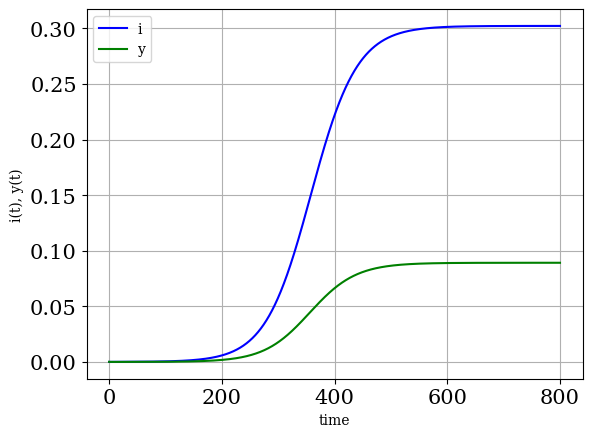

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.plot(timePoints/tscale, solution_ipv[0 , :]*I0, 'b', label='i')
plt.plot(timePoints/tscale, solution_ipv[1 , :]*Y0, 'g', label='y')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('i(t), y(t)')
plt.grid()
plt.savefig('simulation.png')
plt.show()

In [ ]:
"""

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#x = np.linspace(1., 8., 30)
ax.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax.legend(loc='best', prop={'size':30},frameon=False, fontsize=30 )
ax.set_xlabel(r'$E$', fontsize=30)
x.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax.legend(loc='best', prop={'size':30},frameon=False, fontsize=30 )
ax.set_xlabel(r'$E$', fontsize=30)
"""

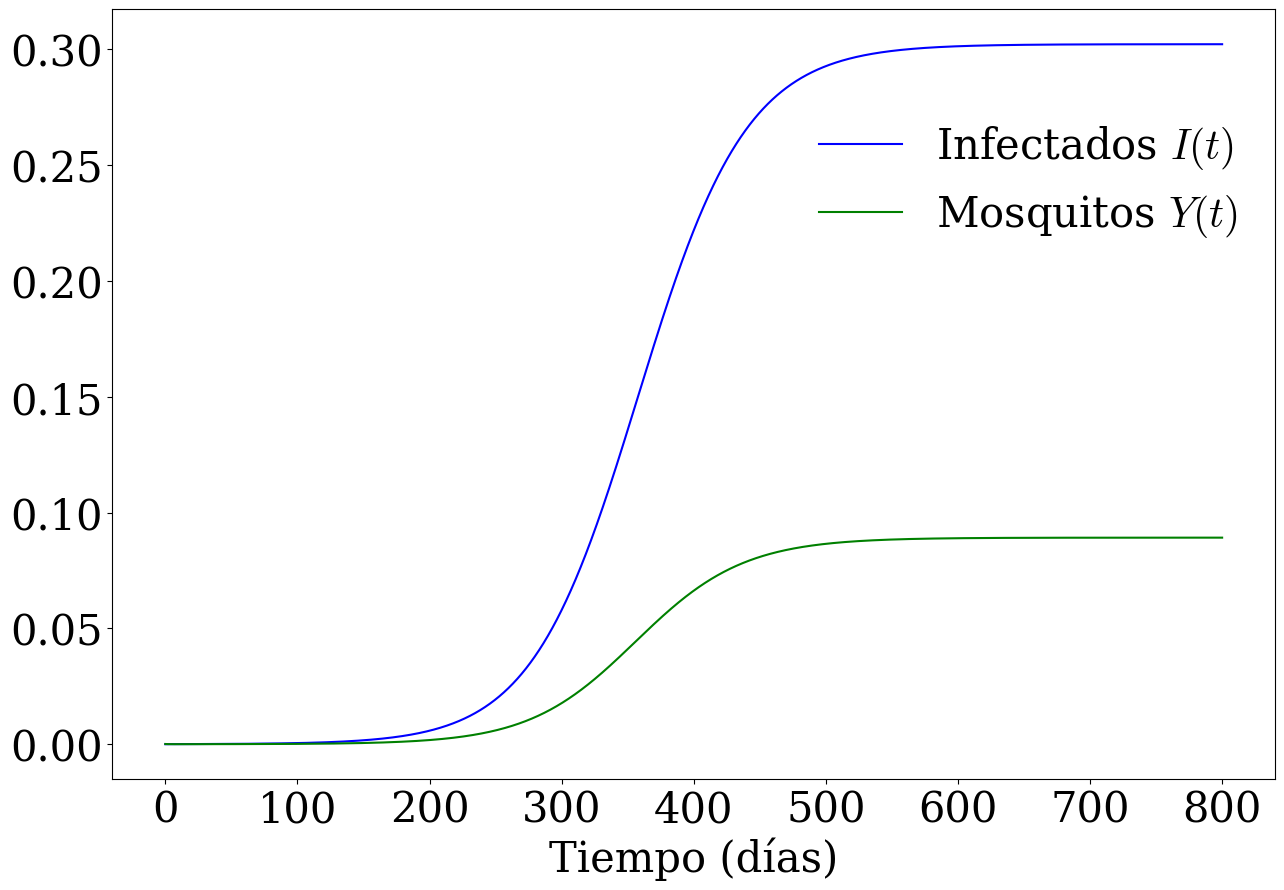

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(timePoints/tscale, solution_ipv[0 , :]*I0, color='b', label=r'Infectados $I(t)$')
ax.plot(timePoints/tscale, solution_ipv[1 , :]*Y0, color='g', label=r'Mosquitos $Y(t)$')

ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9),prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Proporción de infectados', fontsize=30)

fig.savefig(r'I_Y_vs_t_ModRoss.png')

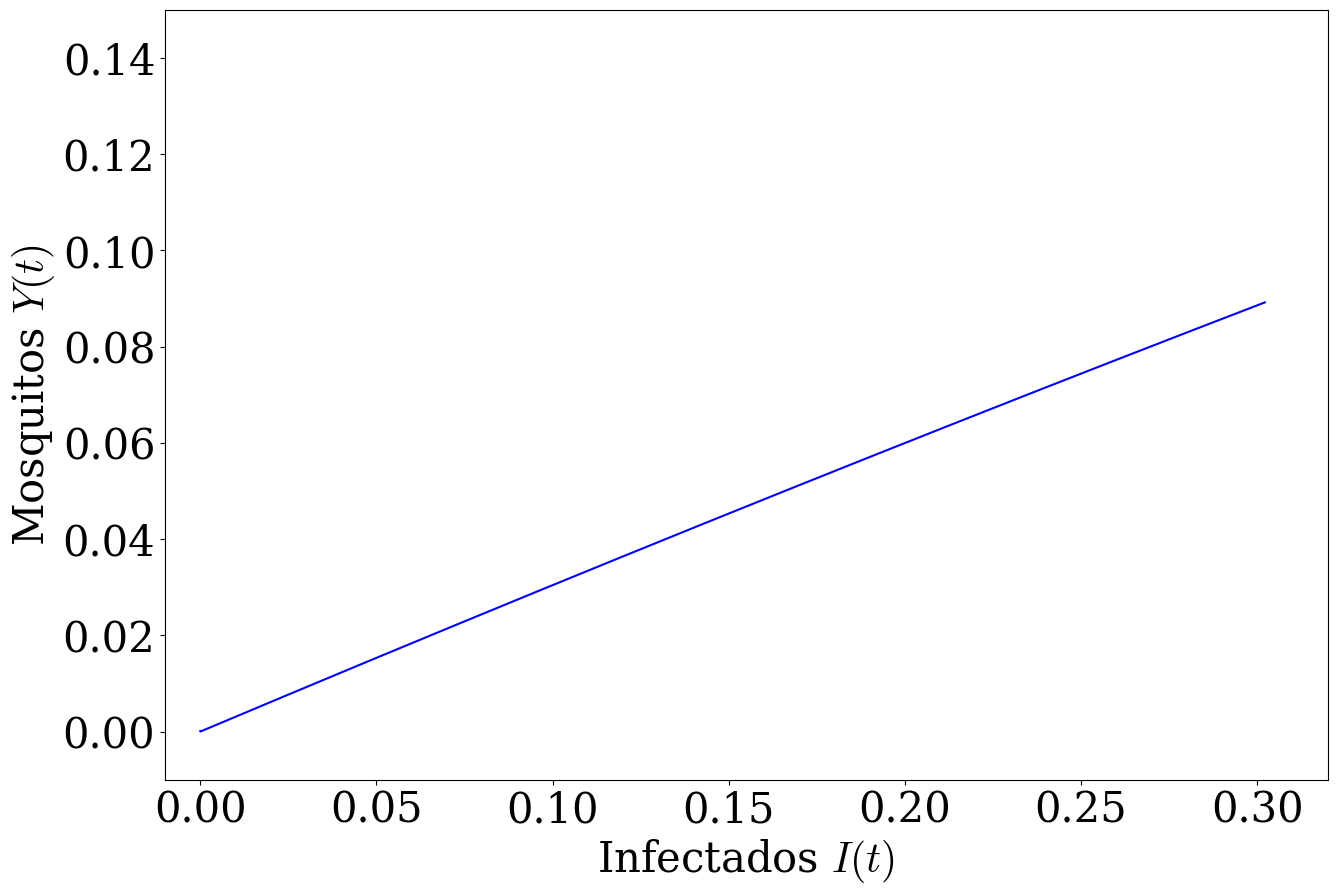

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(solution_ipv[0 , :]*I0, solution_ipv[1 , :]*Y0,  color='b')
ax.set_xlim(-0.01, 0.32)
ax.set_ylim(-0.01, 0.15)
ax.set_xlabel(r'Infectados $I(t)$', fontsize=30)
ax.set_ylabel(r'Mosquitos $Y(t)$', fontsize=30)

fig.savefig(r'I_vs_Y_ModRoss.png')

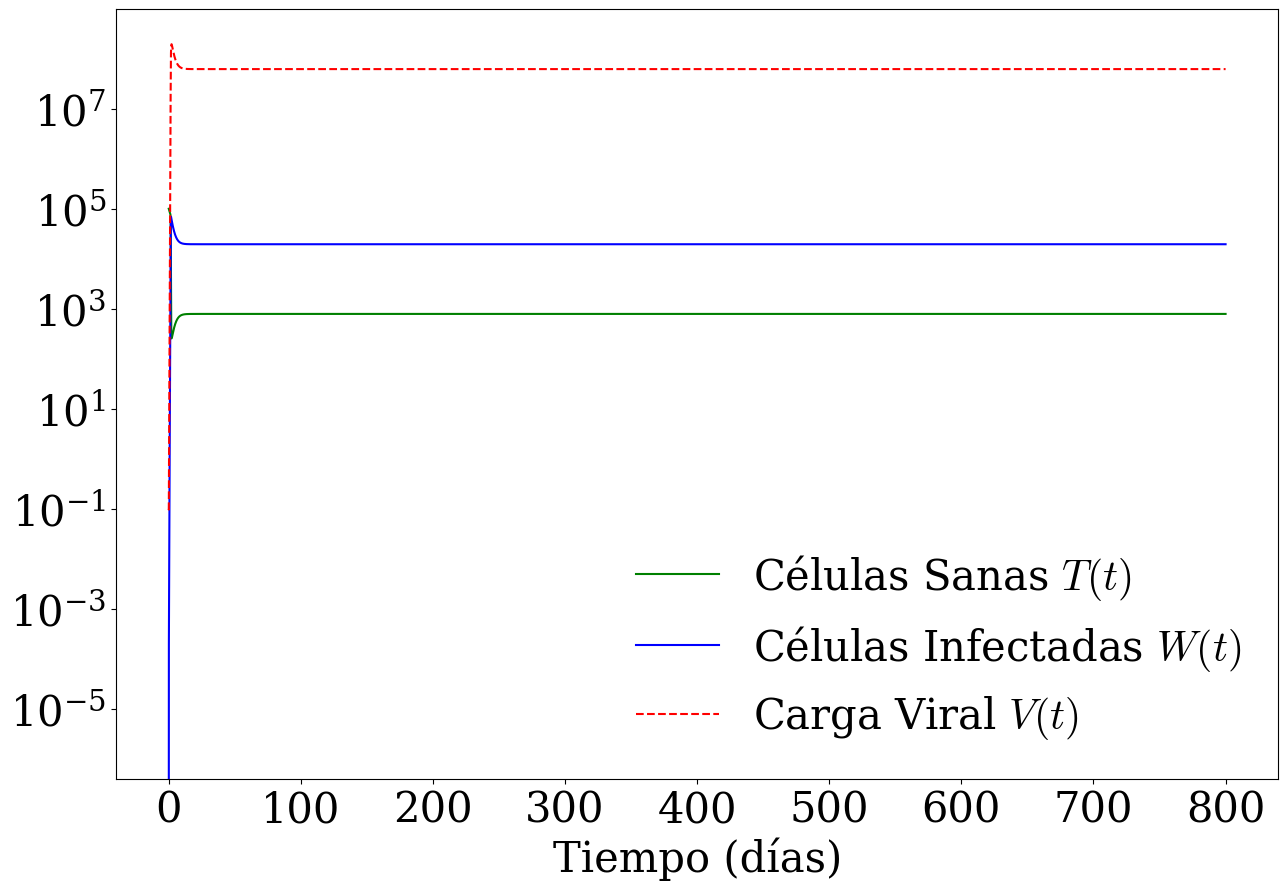

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.plot(timePoints/tscale, solution_ipv[2 , :]*T_0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'TWV_mod5ec.png')

In [ ]:
(solution_ipv[2 , :]*T_0)[int(800000/2)-100000 : int(800000/2) ]

array([791.13924005, 791.13924005, 791.13924005, ..., 791.13923881,
       791.13923881, 791.13923881])

In [ ]:
(solution_ipv[2 , :]*T_0)[-10000 : ]

array([791.13923822, 791.13923822, 791.13923822, ..., 791.13923822,
       791.13923822, 791.13923822])

In [ ]:
(solution_ipv[3 , :]*T_0)[int(800000/2)-100000 : int(800000/2) ]

array([19525.31645597, 19525.31645597, 19525.31645597, ...,
       19525.31645672, 19525.31645672, 19525.31645672])

In [ ]:
(solution_ipv[4 , :]*T_0)[int(800000/2)-100000 : int(800000/2) ]

array([6170000.00361858, 6170000.00361866, 6170000.00361873, ...,
       6170000.013564  , 6170000.01356408, 6170000.01356417])

In [ ]:
(timePoints/tscale)[int(800000/2)-100000]

300.00037500046875

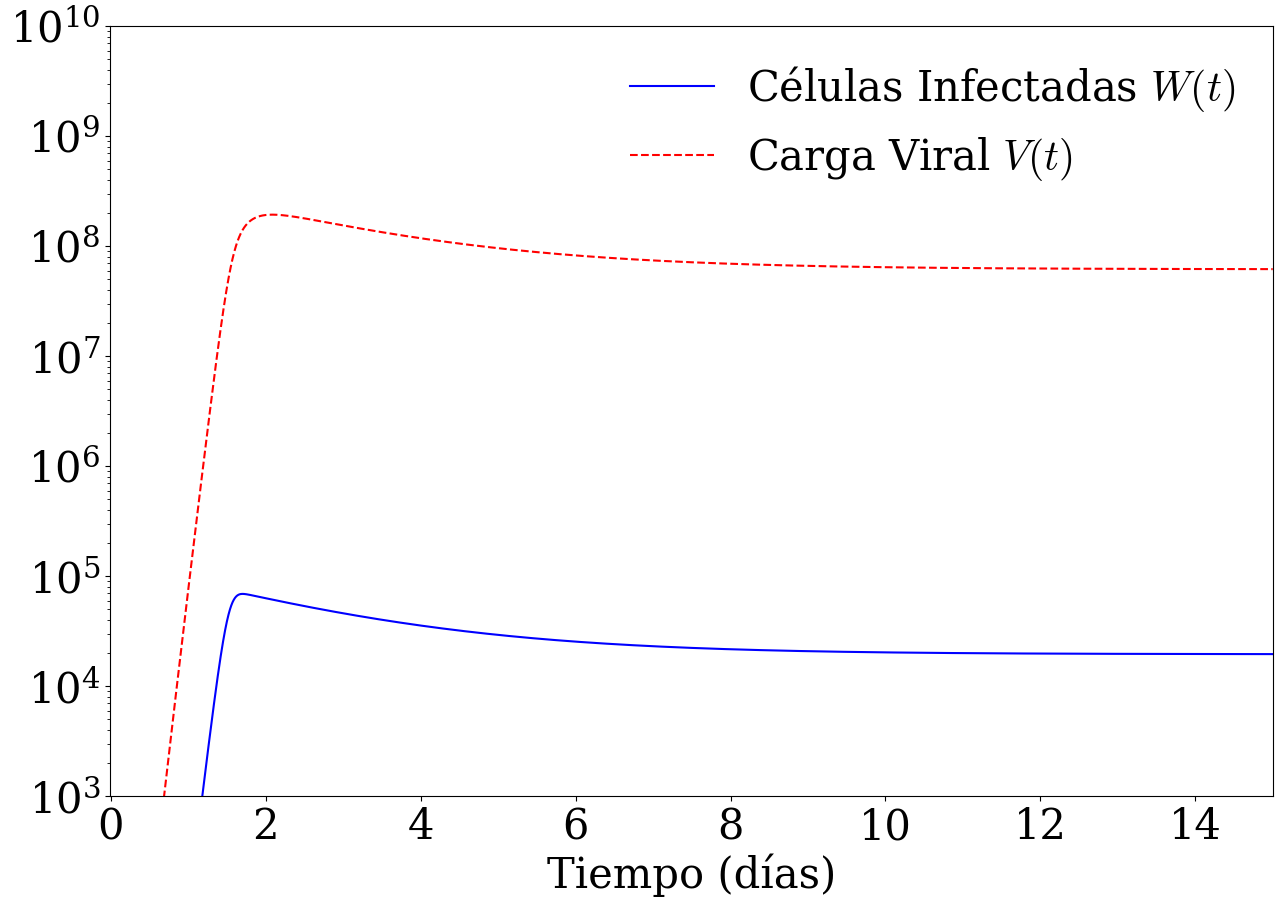

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
ax.set_ylim(1000, 1e10)
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'WV_10dias_mod5ec.png')

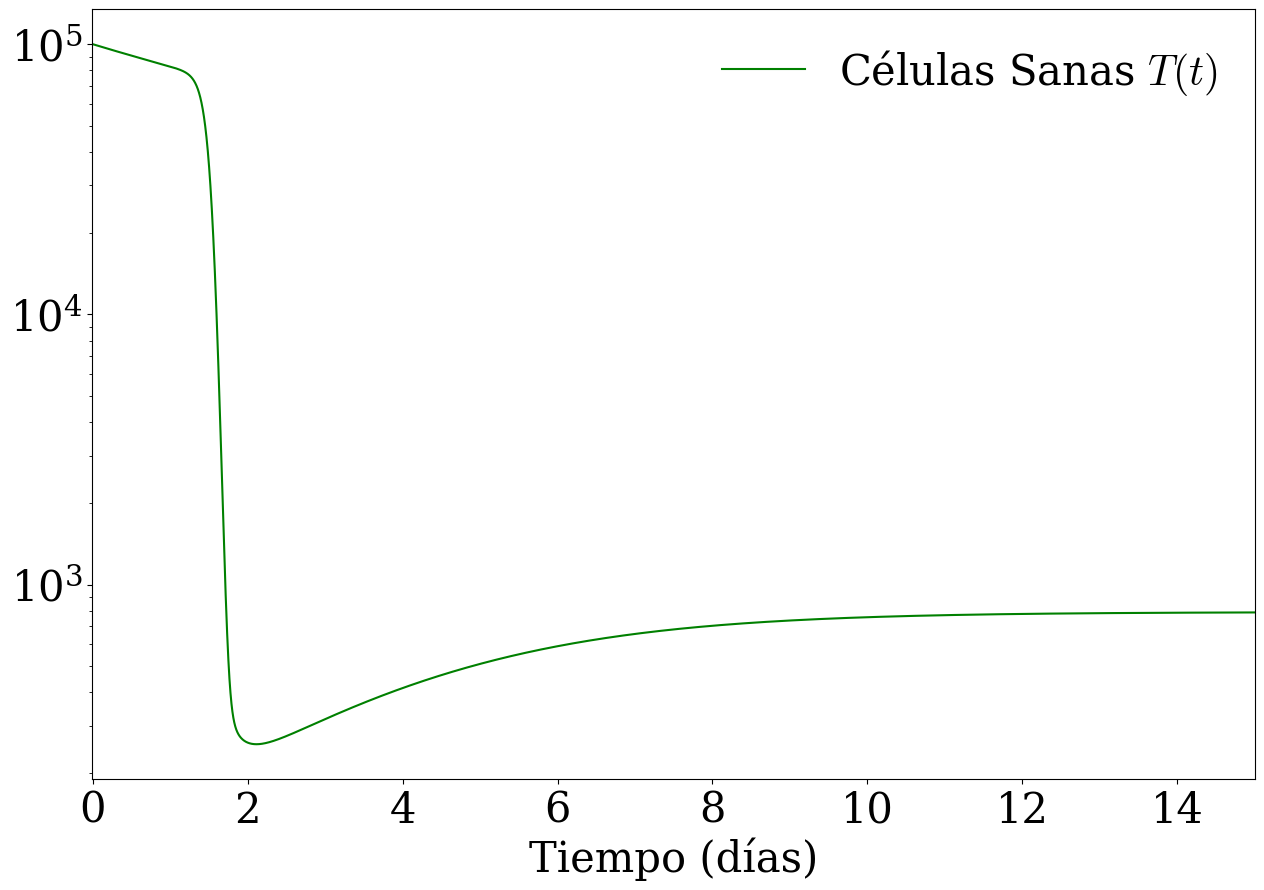

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
ax.plot(timePoints/tscale, solution_ipv[2 , :]*w0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'T_10dias_mod5ec.png')

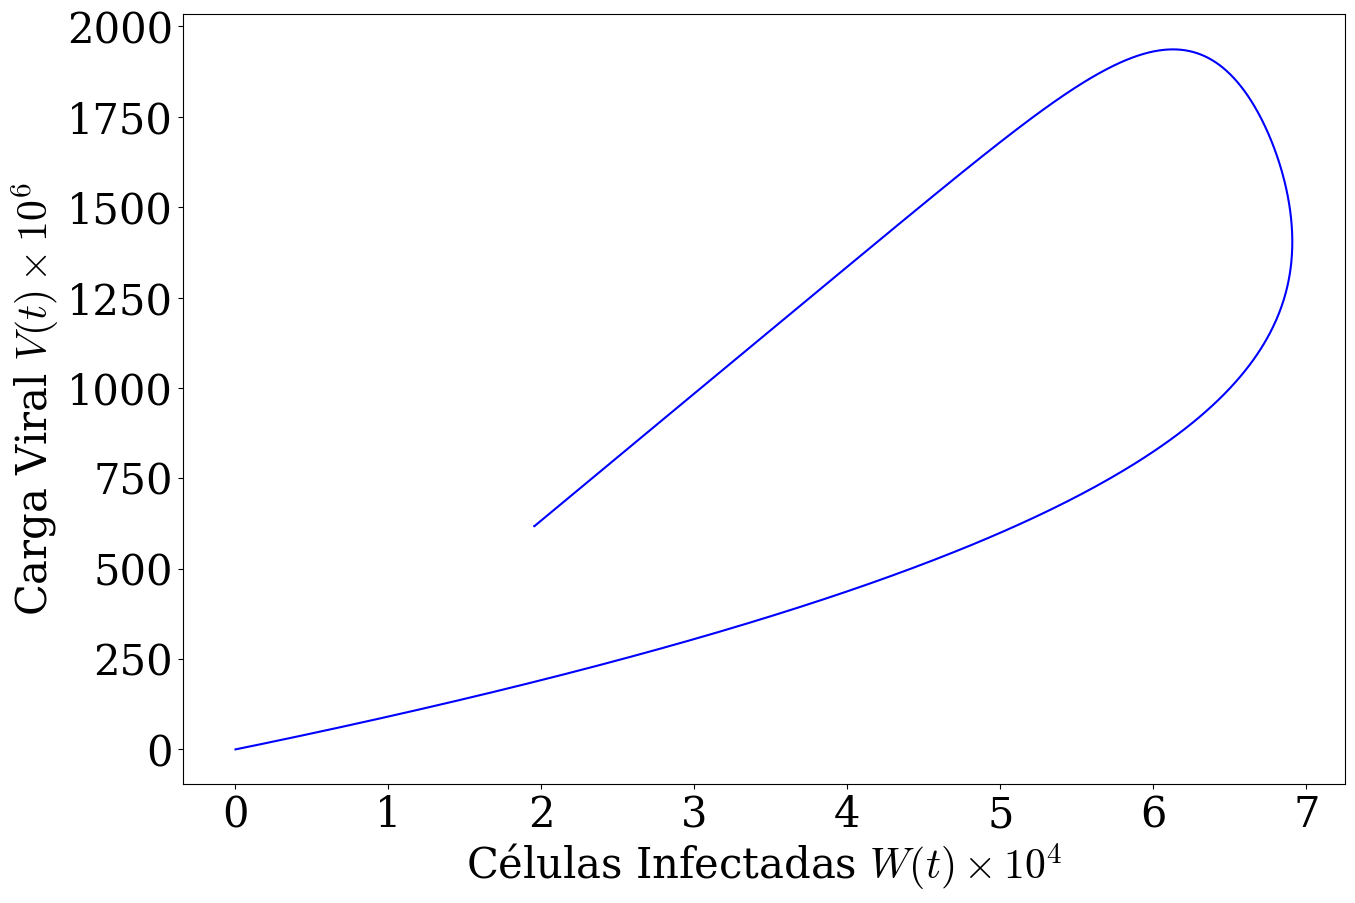

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#ax.set_yscale("log")
#ax.set_xscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
#ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
#ax.plot(solution_ipv[3 , :]*w0 , solution_ipv[4 , :]*v0, color='b', ls='solid')
ax.plot(solution_ipv[3 , :], solution_ipv[4 , :], color='b', ls='solid')

ax.legend(loc='best',prop={'size':30},frameon=False)

ax.set_xlabel(r'Células Infectadas $W(t)\times 10^4$', fontsize=30)
ax.set_ylabel(r'Carga Viral $V(t)\times 10^6$', fontsize=30)

fig.savefig(r'W_vs_V_mod5ec.png')


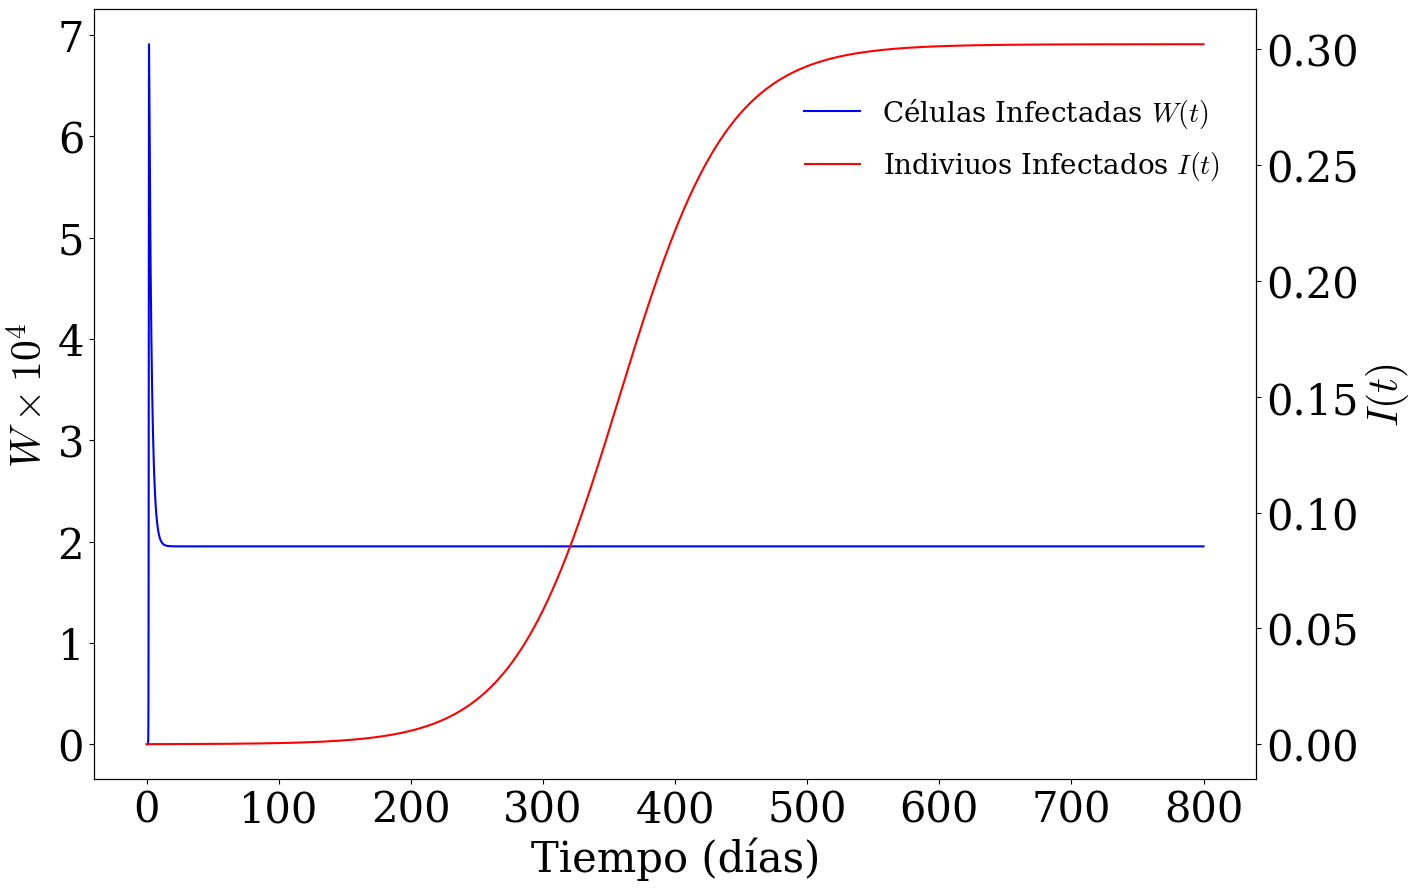

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel(r'Tiempo (días)',fontsize=30)
ax1.set_ylabel(r'$W(t) \times 10^4$',fontsize=30)
#ax1.set_ylim(0, 8)
ax1.plot(timePoints/tscale, solution_ipv[3,:], color='b', ls='solid', label=r'Células Infectadas $W(t)$') #*w0 * 1e-4
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$I(t)$',fontsize=30)
#ax2.set_ylim(0, 4)
ax2.plot(timePoints/tscale, solution_ipv[0,:]*I0, color='r', ls='solid', label=r'Indiviuos Infectados $I(t)$')
ax2.tick_params(axis='y')

ax1.legend(loc='upper right', prop={'size':20} , bbox_to_anchor=(0.98, 0.92),frameon=False )
ax2.legend(loc='upper right', prop={'size':20}, bbox_to_anchor=(0.99, 0.85),frameon=False)

fig.savefig(r'W_I_vs_t_mod5ec.png')

## Gráficas con $r=10^3$

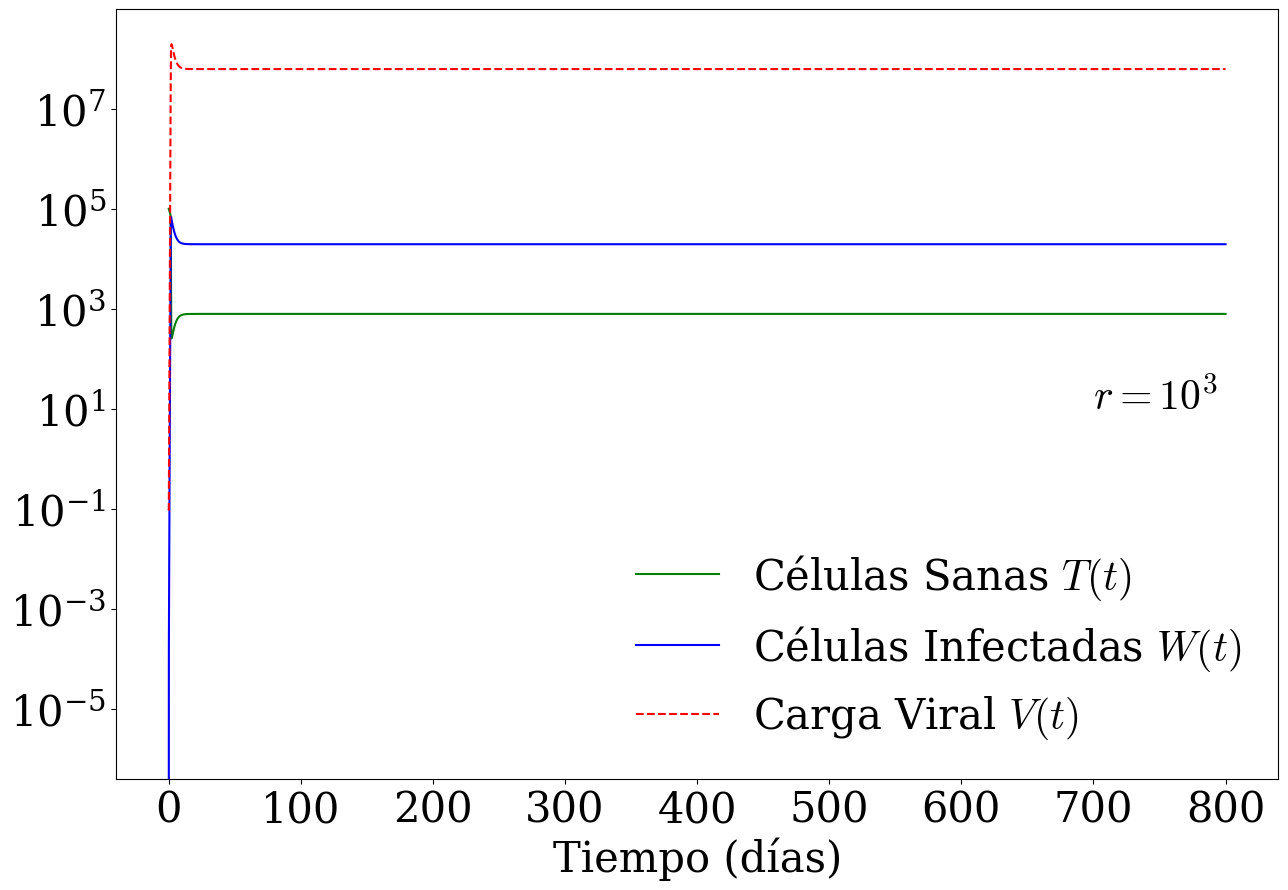

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale

#ax1.text(0.85, 2.75, r'$r=10^3$' , fontsize=30)
ax.text(700, 10 ,r'$r=10^3$' , fontsize=30 )

ax.plot(timePoints/tscale, solution_ipv[2 , :]*T_0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'TWV_r1e3_mod5ec.png')

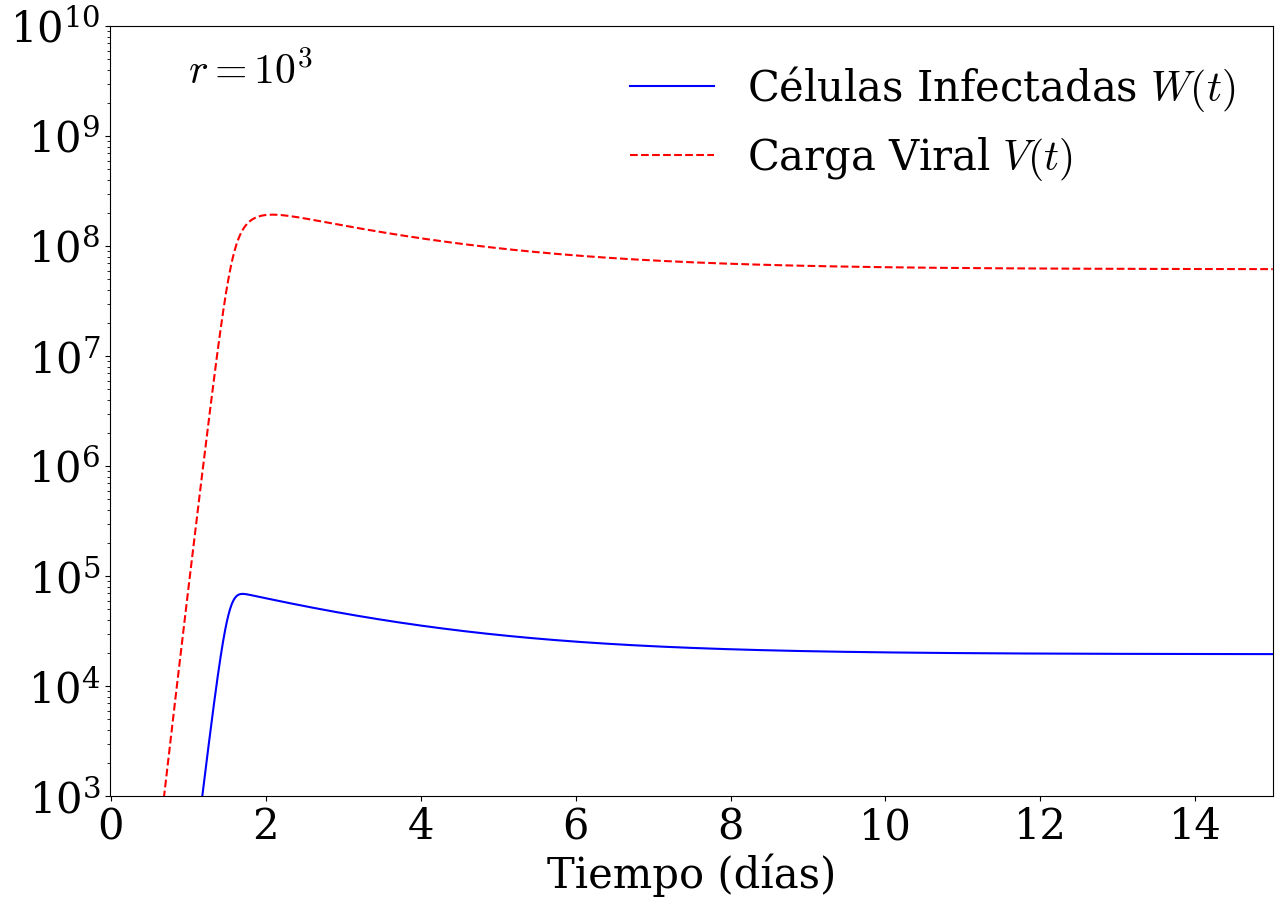

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
ax.set_ylim(1000, 1e10)

ax.text(1, 3e9 ,r'$r=10^3$' , fontsize=30 )

ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'WV_10dias_r1e3_mod5ec.png')

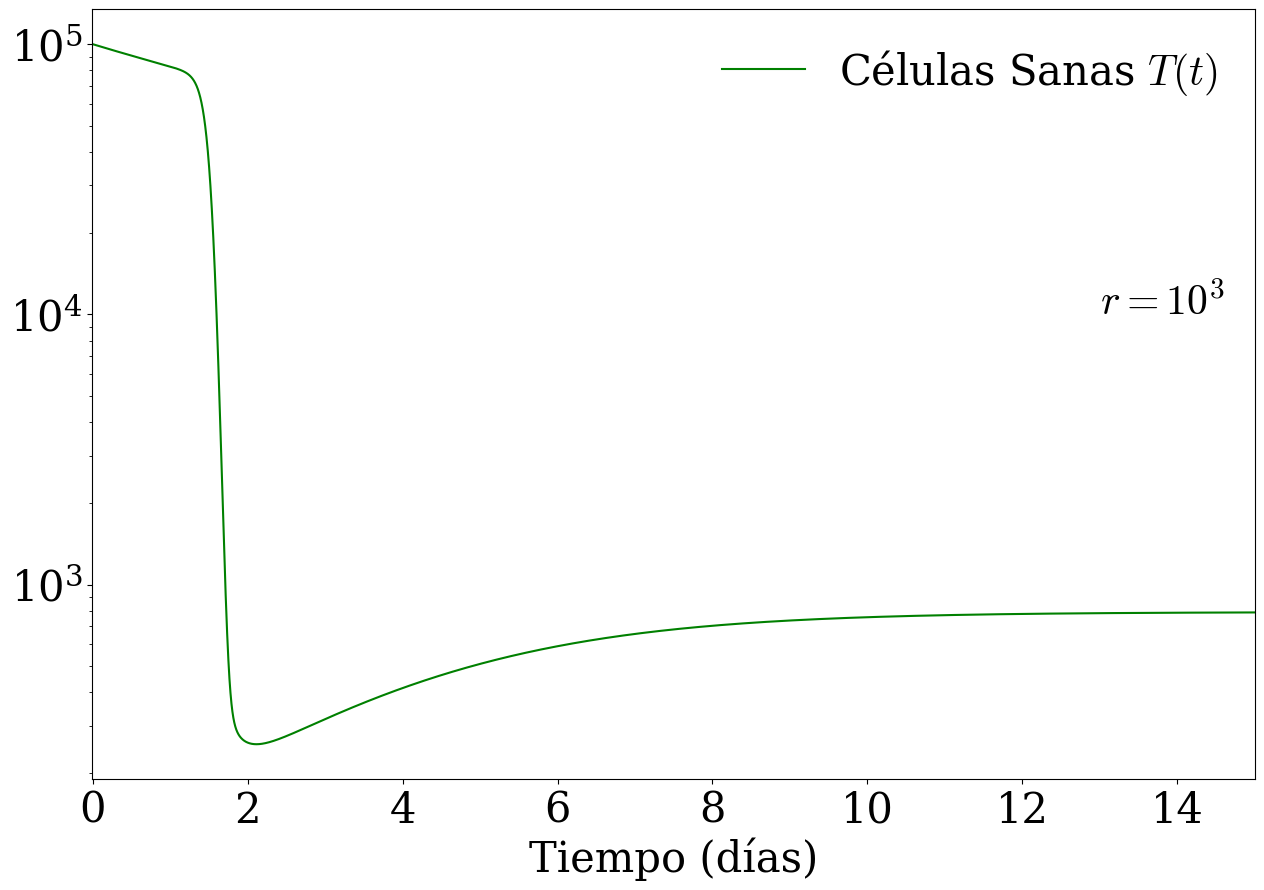

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
ax.text(13, 1e4 ,r'$r=10^3$' , fontsize=30 )
ax.plot(timePoints/tscale, solution_ipv[2 , :]*w0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'T_10dias_r1e3_mod5ec.png')

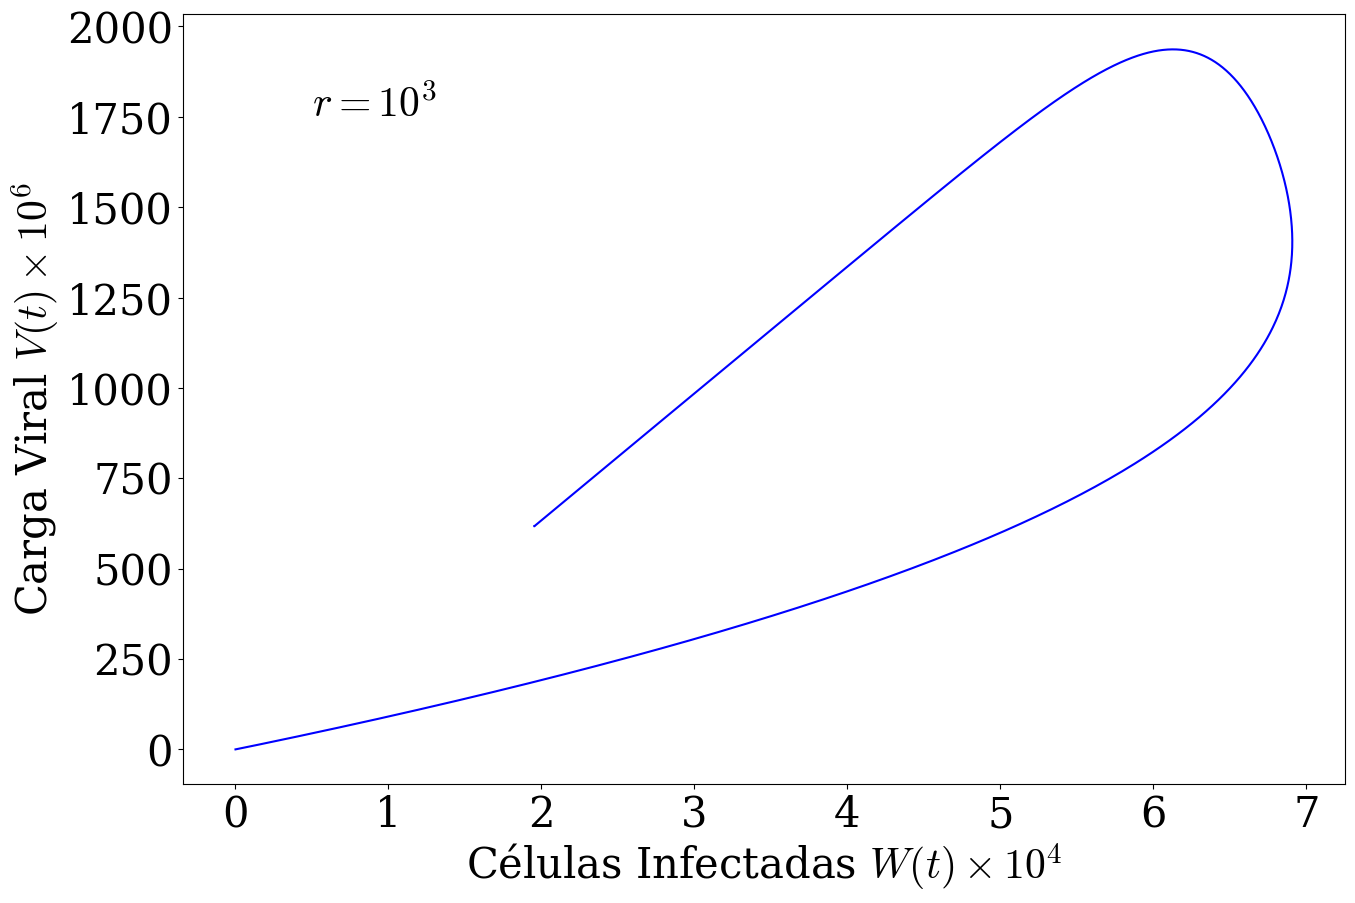

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#ax.set_yscale("log")
#ax.set_xscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
#ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
#ax.plot(solution_ipv[3 , :]*w0 , solution_ipv[4 , :]*v0, color='b', ls='solid')
ax.plot(solution_ipv[3 , :], solution_ipv[4 , :], color='b', ls='solid')
ax.text(0.5, 1750 ,r'$r=10^3$' , fontsize=30 )
ax.legend(loc='best',prop={'size':30},frameon=False)

ax.set_xlabel(r'Células Infectadas $W(t)\times 10^4$', fontsize=30)
ax.set_ylabel(r'Carga Viral $V(t)\times 10^6$', fontsize=30)

fig.savefig(r'W_vs_V_r1e3_mod5ec.png')


## Gráficas con $r=10^5$

In [ ]:
# set the initial conditions
i_ini = 0
y_ini = 0.0001
T_ini = 100000
W_ini = 0
V_ini = 0.1
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]


i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]


# define the discretization points
#tend = 200
tend=400
tstep = 0.0005
tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)
#timePoints=np.linspace(0,100,150)

##############
## esclado de parametros

Y0=100
I0 = 100
w0 = 1e4 #0.01
T_0=w0
v0=1e5
tscale = 0.5
# g tal que g/tscale = 0.1. "gamma en el modelo"
print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e5,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale)

param={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c}

print("Parametros ecalados: ")
for name,p_i in param.items():
  print("{} : {}".format(name,p_i))


#########




800000
 t scale 0.5
t .. 0.5
Parametros ecalados: 
miu : 7.82e-05
q : 1.5
a : 32.4
b : 32.4
g : 0.1
r : 2.0
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0


In [ ]:
solve_ipv=spi.solve_ivp(Host2_0,[0,tend],x0_scale, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0), max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3

solution_ipv = solve_ipv.sol(timePoints)

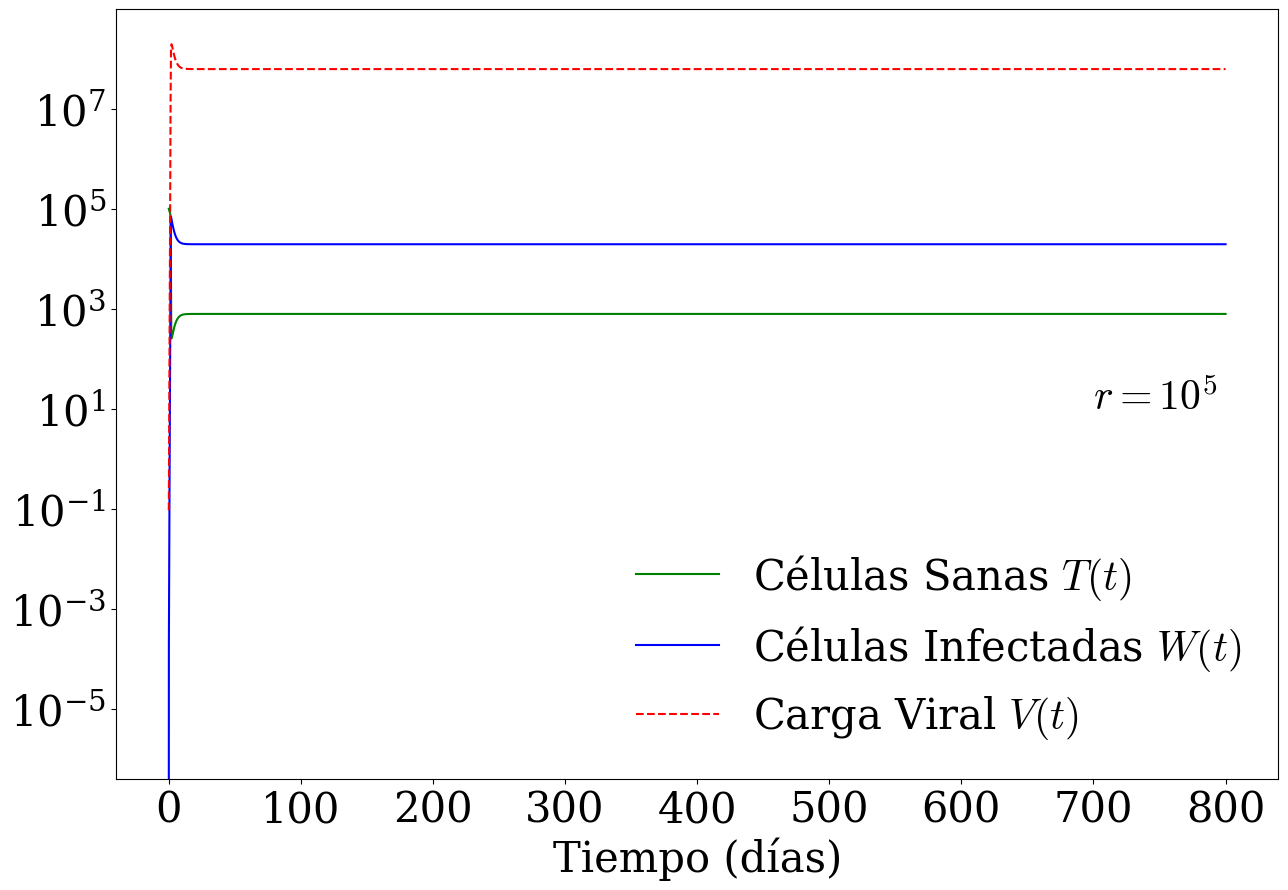

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale

#ax1.text(0.85, 2.75, r'$r=10^3$' , fontsize=30)
ax.text(700, 10 ,r'$r=10^5$' , fontsize=30 )

ax.plot(timePoints/tscale, solution_ipv[2 , :]*T_0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'TWV_r1e5_mod5ec.png')

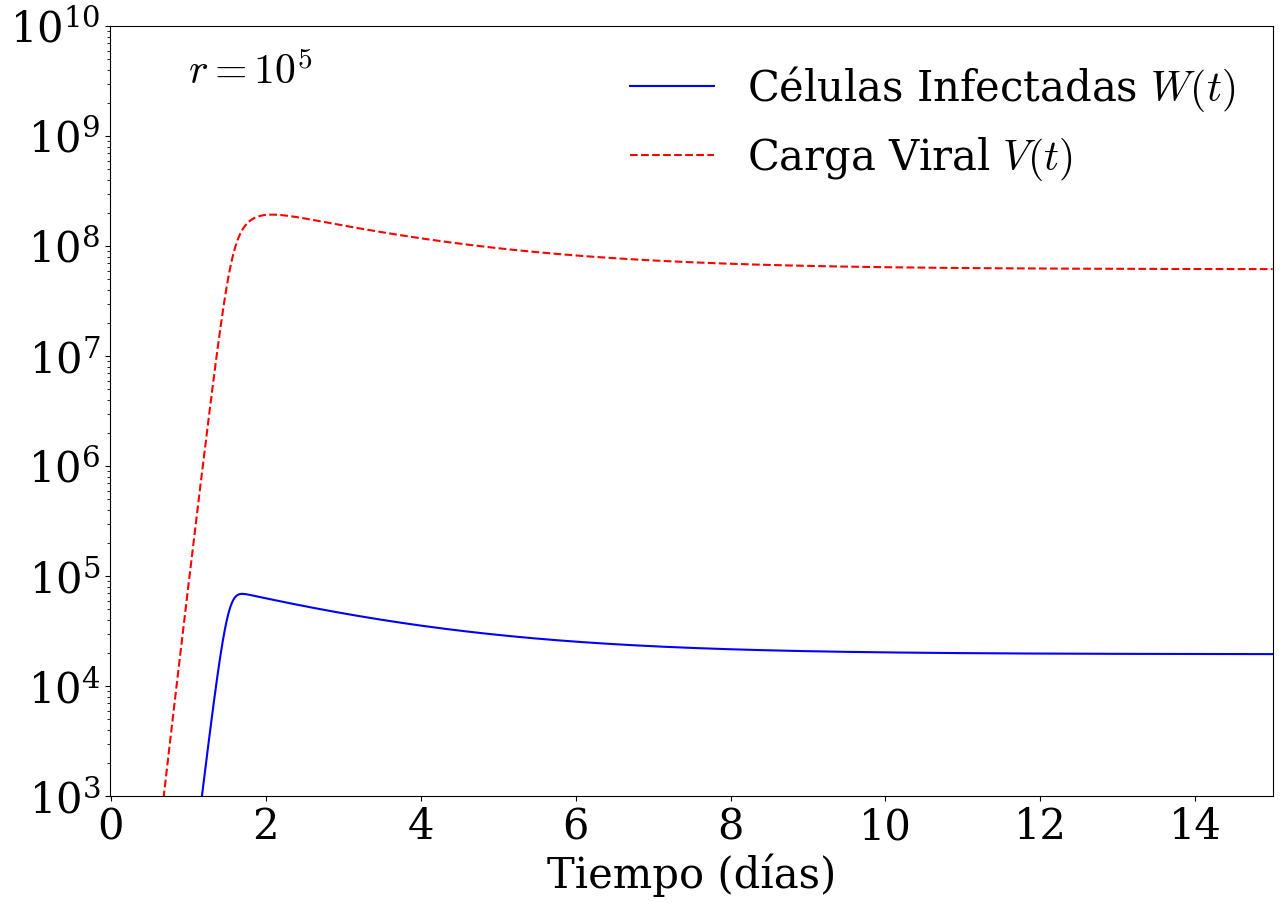

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
ax.set_ylim(1000, 1e10)

ax.text(1, 3e9 ,r'$r=10^5$' , fontsize=30 )

ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'WV_10dias_r1e5_mod5ec.png')

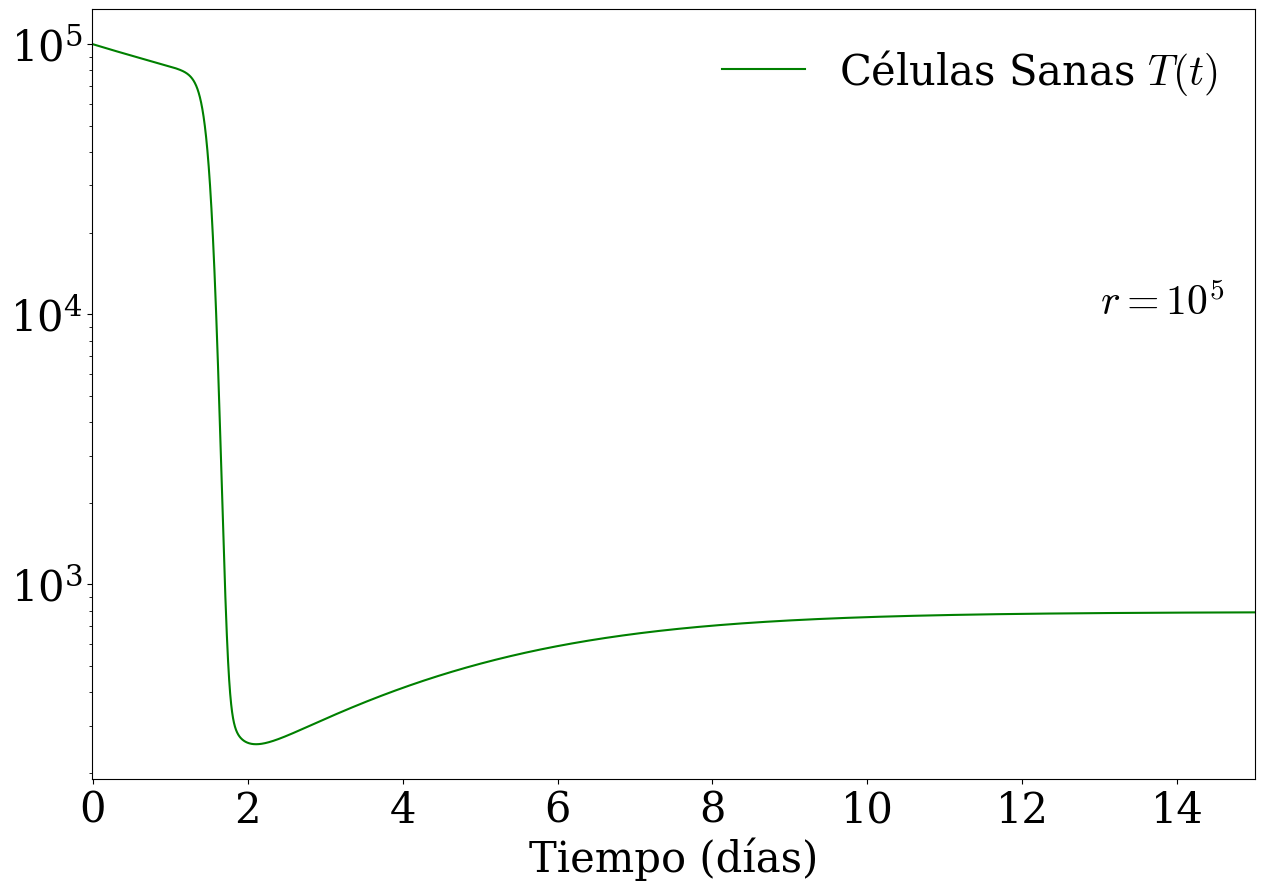

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
ax.text(13, 1e4 ,r'$r=10^5$' , fontsize=30 )
ax.plot(timePoints/tscale, solution_ipv[2 , :]*w0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'T_10dias_r1e5_mod5ec.png')

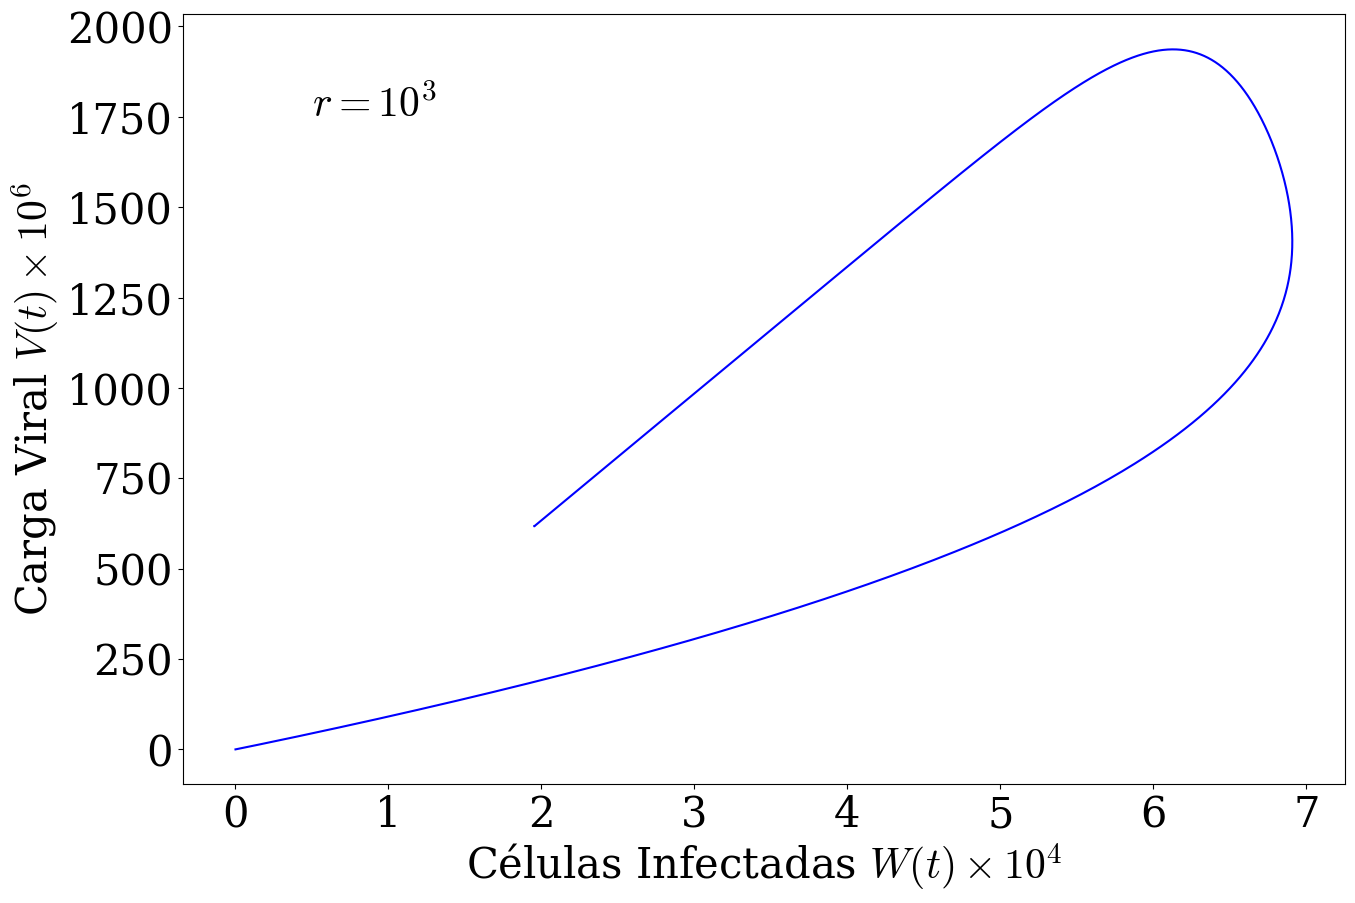

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#ax.set_yscale("log")
#ax.set_xscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
#ax.set_xlim(-0.01, 15)
#ax.set_ylim(1000, 1e10)
#ax.plot(solution_ipv[3 , :]*w0 , solution_ipv[4 , :]*v0, color='b', ls='solid')
ax.plot(solution_ipv[3 , :], solution_ipv[4 , :], color='b', ls='solid')
ax.text(0.5, 1750 ,r'$r=10^3$' , fontsize=30 )
ax.legend(loc='best',prop={'size':30},frameon=False)

ax.set_xlabel(r'Células Infectadas $W(t)\times 10^4$', fontsize=30)
ax.set_ylabel(r'Carga Viral $V(t)\times 10^6$', fontsize=30)

fig.savefig(r'W_vs_V_r1e3_mod5ec.png')


## Pulso

In [ ]:
Y0=100
I0 = 100
w0 = 1e4 #0.01
T_0=w0
v0=1e6#1e5

In [ ]:
def Host_pulso_0(t,x,a,q,g,miu,d,l,k,m,r,c,p,i0, y0):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g+miu)*I\
          ,a*I*(1/y0-Y)-d*Y\
          ,l-k*V*T-m*T\
          ,k*V*T-d*W\
          ,p*W-c*V]
    return dxdt


def mod_pulso(t,x,a,q,g,miu,d,l,k,m,r,c,p,i0, y0,pulso):
    I,Y,T,W,V = x
    dxdt=[a*q*Y*(1/i0-I)-(g+miu)*I\
          ,a*I*(1/y0-Y)-d*Y\
          ,l-k*V*T-m*T\
          ,k*V*T-d*W\
          ,p*W-c*V +r*Y*pulso]
    return dxdt

pulso = 1e11


###

# set the initial conditions
i_ini = 0
y_ini = 0.0001
T_ini = 100000
W_ini = 0
V_ini = 0.1
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]


i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]


# define the discretization points
#tend = 200
tend=400
tstep = 0.0005
tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)
#timePoints=np.linspace(0,100,150)

##############
## esclado de parametros

Y0=100
I0 = 100
w0 = 1e4 #0.01
T_0=w0
v0=1e4#1e5
tscale = 0.5
# g tal que g/tscale = 0.1. "gamma en el modelo"
print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale) #m = 0.3,d = 0.5

param={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c}

print("Parametros ecalados: ")
for name,p_i in param.items():
  print("{} : {}".format(name,p_i))

#################################################
#################################################
#################################################
#################################################

mod_ = Host_pulso_0
args_ = (a,q,g,miu,d,l,k,m,r,c,p,I0, Y0)
args_p = (a,q,g,miu,d,l,k,m,r,c,p,I0, Y0,pulso)


tend=50
tstep = 0.005 #0.0005

tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)

print(timePoints)


solve_ipv=spi.solve_ivp(mod_,[0,tend],x0_scale, args=args_, max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3
solution_ipv = solve_ipv.sol(timePoints)


n_pulsos = 20
t_start_pulso = tend
step_pulso = 10
tend_pulso= t_start_pulso + step_pulso
tobs_pulso=int(step_pulso/tstep)
print(tobs_pulso)
timePoints_pulso=np.linspace(t_start_pulso,tend_pulso,tobs_pulso)
timePoints_pulso_solve=np.linspace(0,step_pulso,tobs_pulso)




INPUT_step=solution_ipv.transpose()[-1]
RES = solution_ipv.transpose()[0:-1]


tiempo_list = timePoints[0:-1]

for pulso_i in range(n_pulsos):
  print(pulso_i)
  ### pulso el ec. 5 -> termino g(y)= r * Y
  print("step",INPUT_step[4])
  print("mosquitos",INPUT_step[1])
  print("pulso", r*INPUT_step[1]*pulso)
  #INPUT_step[4]=INPUT_step[4] + r*INPUT_step[1]*pulso
  ###
  timePoints_step = (timePoints_pulso + (step_pulso * pulso_i))[1:]
  #print(timePoints_step)
  #solve_ipv=spi.solve_ivp(mod_,[0,step_pulso], INPUT_step , args=args_, max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3
  if pulso_i%2==0:
    solve_ipv=spi.solve_ivp(mod_pulso,[0,step_pulso], INPUT_step , args=args_p, max_step = 1, method = "BDF" , rtol=1e-10 , atol=1e-10,  dense_output=True ) # max_step = 1e-3, rtol=1e-12 , atol=1e-14
  else:
    solve_ipv=spi.solve_ivp(mod_,[0,step_pulso], INPUT_step , args=args_, max_step = 1, method = "BDF" , rtol=1e-10 , atol=1e-10,  dense_output=True ) # max_step = 1e-3, rtol=1e-12 , atol=1e-14
  solution_ipv = solve_ipv.sol(timePoints_pulso_solve).transpose()
  INPUT_step = solution_ipv[-1]
  RES= np.vstack((RES, solution_ipv[0:-1]))
  tiempo_list= np.hstack((tiempo_list, timePoints_step))



800000
 t scale 0.5
t .. 0.5
Parametros ecalados: 
miu : 7.82e-05
q : 1.5
a : 32.4
b : 32.4
g : 0.1
r : 0.2
l : 2.0
m : 0.6
d : 1.0
k_T : 0.004
k_W : 0.004
k : 0.004
p : 31600.0
c : 10.0
10000
[0.00000000e+00 5.00050005e-03 1.00010001e-02 ... 4.99899990e+01
 4.99949995e+01 5.00000000e+01]
2000
0
step 6169.999999999996
mosquitos 1.5128219553908518e-06
pulso 30256.439107817037
1
step 11190.659616815861
mosquitos 2.4889547589822213e-06
pulso 49779.09517964443
2
step 6169.997730065399
mosquitos 4.09194658710733e-06
pulso 81838.93174214661
3
step 19645.411726880284
mosquitos 6.719301771173891e-06
pulso 134386.03542347782
4
step 6169.9963521841
mosquitos 1.1012084340603746e-05
pulso 220241.6868120749
5
step 42103.19774758469
mosquitos 1.799003279990229e-05
pulso 359800.6559980458
6
step 6169.995145136377
mosquitos 2.923860213751271e-05
pulso 584772.0427502543
7
step 100128.57792696262
mosquitos 4.713030839127979e-05
pulso 942606.1678255958
8
step 6169.994221305838
mosquitos 7.499182616148082

In [ ]:
r

0.02

In [ ]:
INPUT_step

array([5.23940499e-04, 1.60500659e-04, 7.91139134e-02, 1.95253188e+00,
       6.17000082e+02])

In [ ]:
INPUT_step[4]

617.0000815020984

Text(0, 0.5, 'Células')

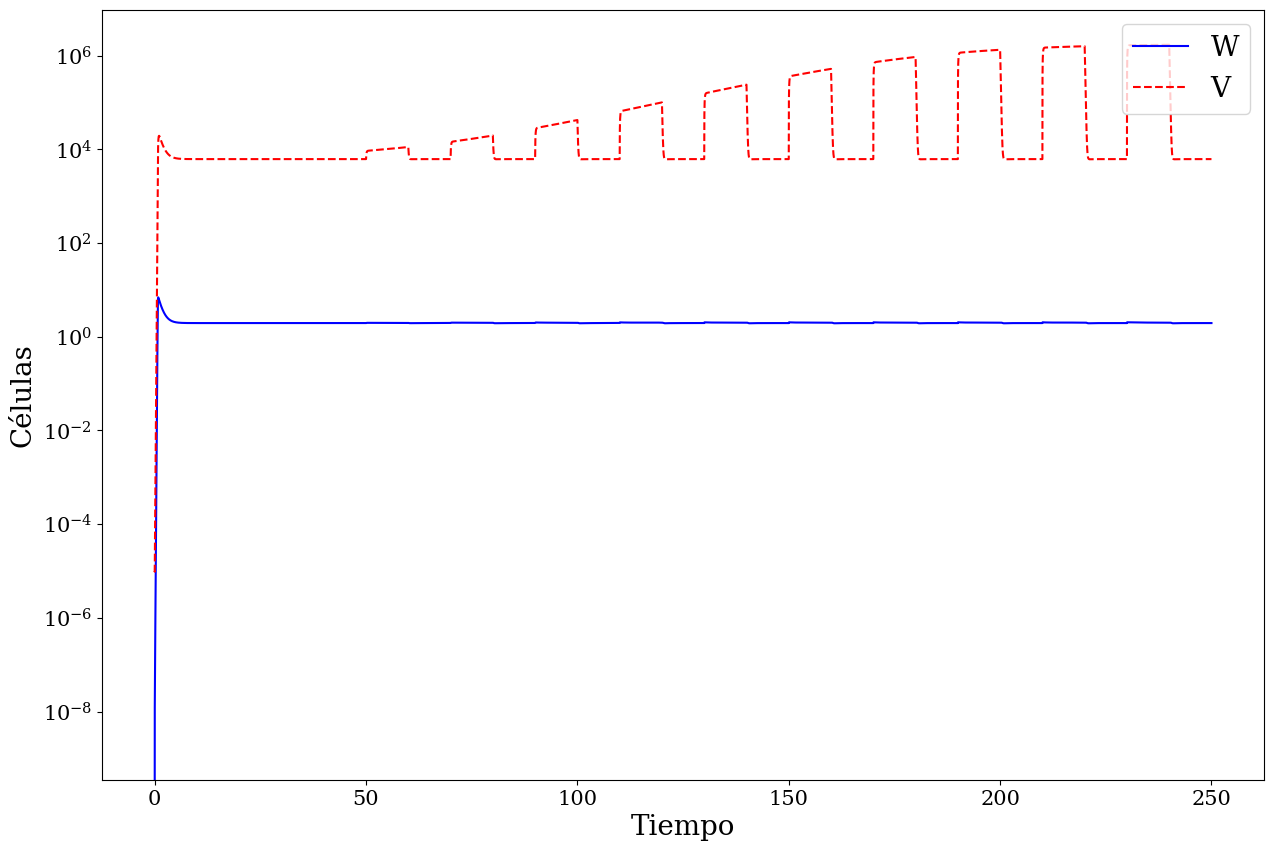

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
"""
ax.plot(tiempo_list, RES[:,2]*T_0, color='g', ls='solid', label='T')
ax.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
ax.plot(tiempo_list, RES[:,4]*v0, color='r', ls='dashed',label='V')
"""
ax.plot(tiempo_list, RES[:,3], color='b', ls='solid', label='W')
ax.plot(tiempo_list, RES[:,4], color='r', ls='dashed',label='V')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)
ax.set_ylabel('Células', fontsize=20)


Text(0.5, 0, 'Tiempo')

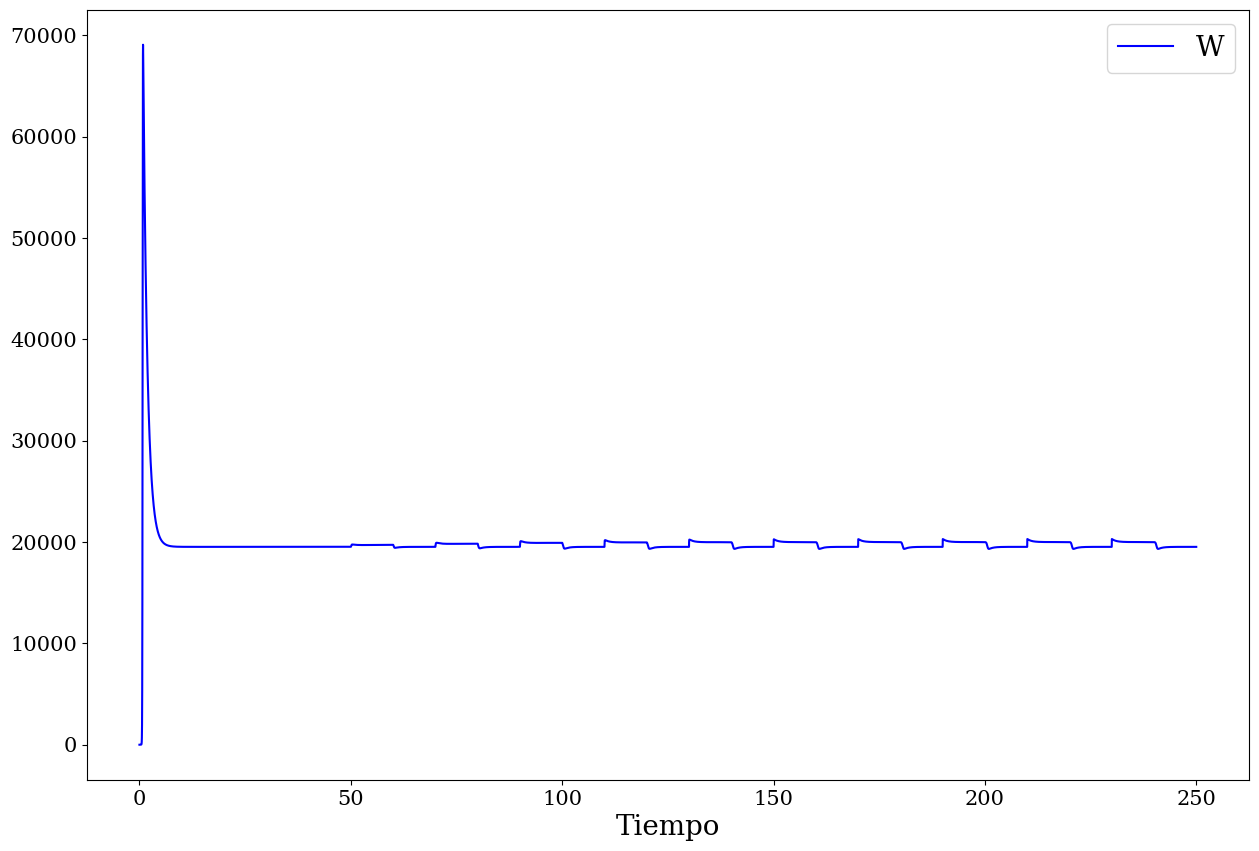

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
"""
ax.plot(tiempo_list, RES[:,2]*T_0, color='g', ls='solid', label='T')
ax.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
ax.plot(tiempo_list, RES[:,4]*v0, color='r', ls='dashed',label='V')
"""
ax.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
#ax.set_ylim(10, 100)
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)

In [ ]:
print(RES[:,3]*w0)

[    0.          3223.32947304 19550.79736443 ... 19525.29975924
 19525.29976775 19525.29977625]


Text(0.5, 0, 'Tiempo')

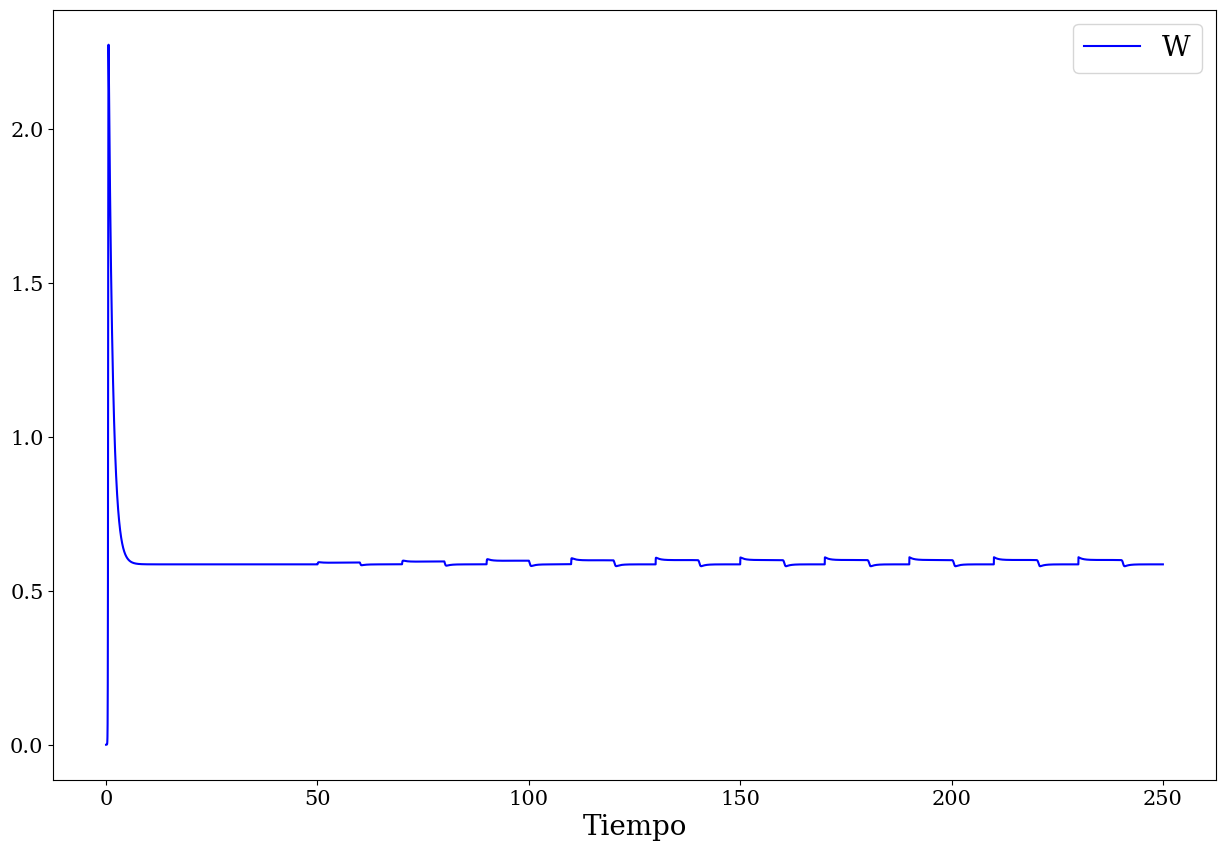

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

Teq= l/m
#ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
"""
ax.plot(tiempo_list, RES[:,2]*T_0, color='g', ls='solid', label='T')
ax.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
ax.plot(tiempo_list, RES[:,4]*v0, color='r', ls='dashed',label='V')
"""
ax.plot(tiempo_list, RES[:,3]*w0 / (Teq*T_0), color='b', ls='solid', label='W')
#ax.plot(tiempo_list, RES[:,4], color='r', ls='dashed',label='V')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)

In [ ]:
r

0.02

Text(0, 0.5, 'Células')

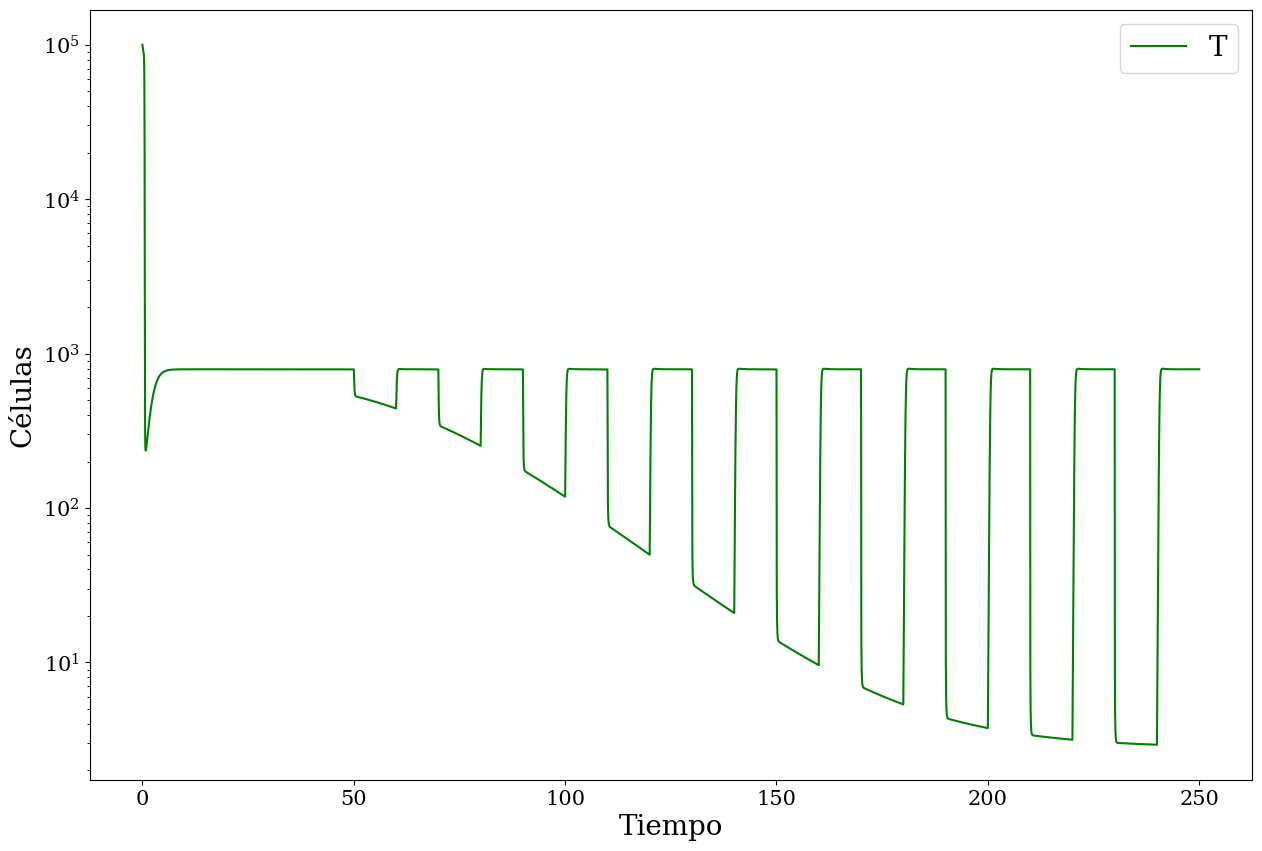

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
"""
ax.plot(tiempo_list, RES[:,2]*T_0, color='g', ls='solid', label='T')
ax.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
ax.plot(tiempo_list, RES[:,4]*v0, color='r', ls='dashed',label='V')
"""
ax.plot(tiempo_list, RES[:,2]*T_0, color='g', ls='solid', label='T')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)
ax.set_ylabel('Células', fontsize=20)

Text(0, 0.5, 'Células')

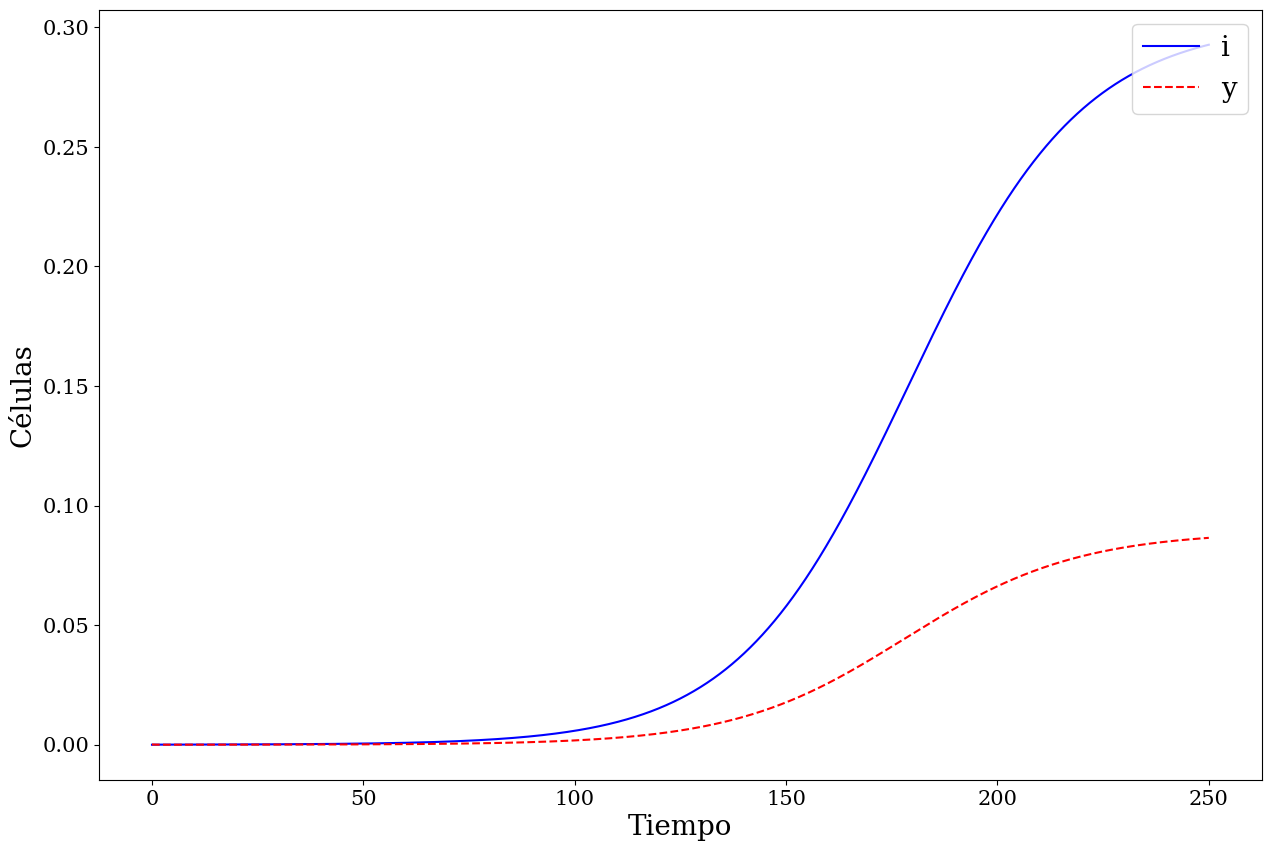

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


#x = np.linspace(1., 8., 30)
#timePoints/tscale

ax.plot(tiempo_list, RES[:,0]*I0, color='b', ls='solid', label='i')
ax.plot(tiempo_list, RES[:,1]*Y0, color='r', ls='dashed',label='y')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)
ax.set_ylabel('Células', fontsize=20)

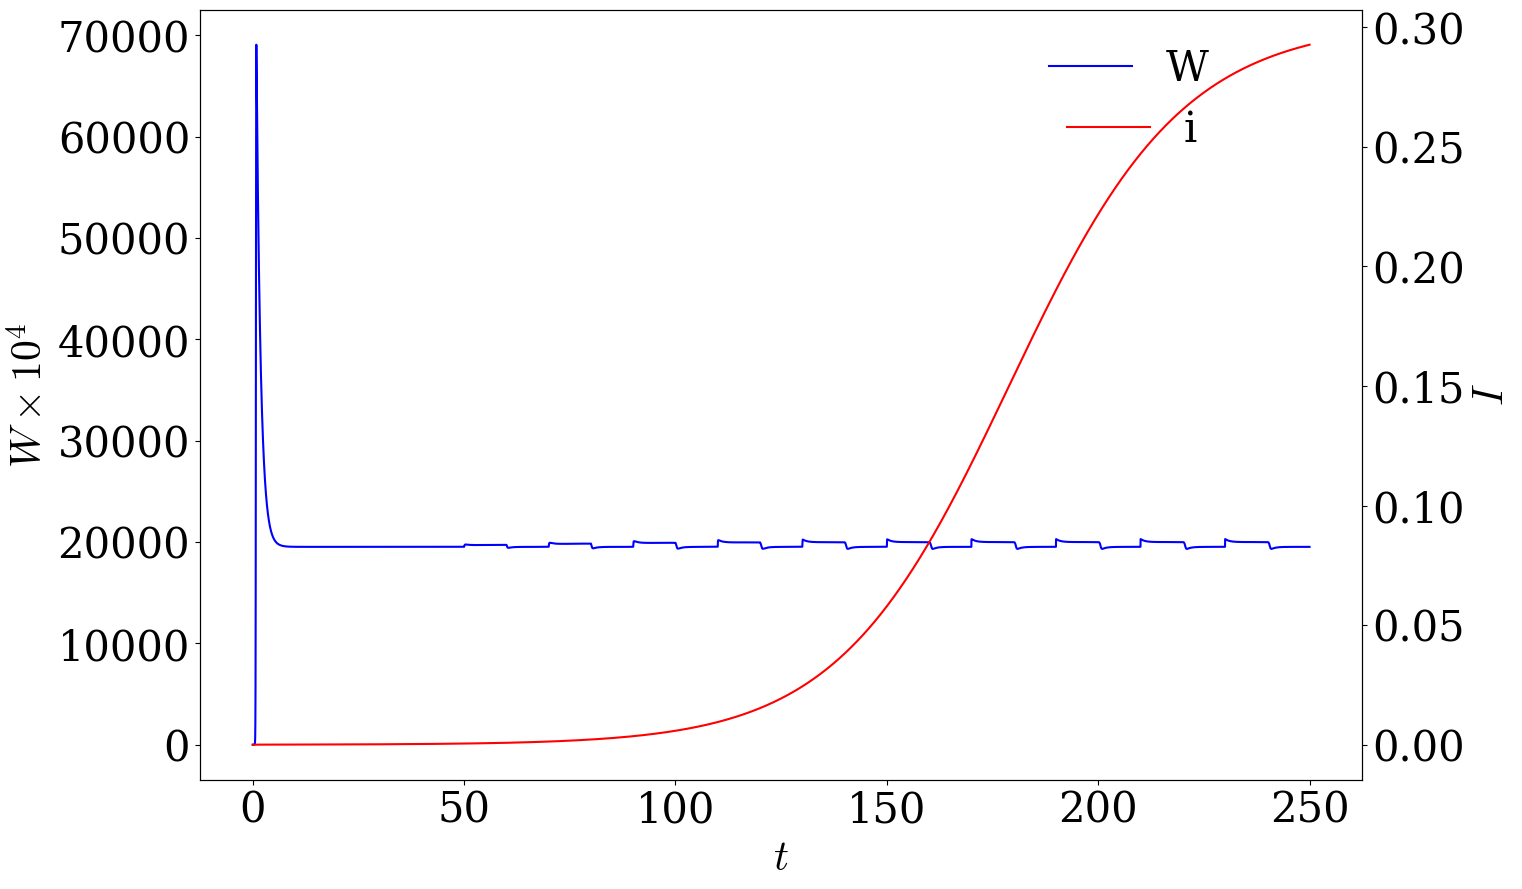

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel(r'$t$',fontsize=30)
ax1.set_ylabel(r'$W \times 10^4$',fontsize=30)
#ax1.set_ylim(0, 8)
ax1.plot(tiempo_list, RES[:,3]*w0, color='b', ls='solid', label='W')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$I$',fontsize=30)
#ax2.set_ylim(0, 4)
ax2.plot(tiempo_list, RES[:,0]*I0, color='r', ls='solid', label='i')
ax2.tick_params(axis='y')

ax1.legend(loc='upper right', prop={'size':30} , bbox_to_anchor=(0.9, 1),frameon=False )
ax2.legend(loc='upper right', prop={'size':30}, bbox_to_anchor=(0.89, 0.92),frameon=False)

## Tau leaping

In [ ]:
def deng_stock(INPUT ,tau = 0.005,ND = 400,seed_=182, ruleta = False, **kargs):
    #INPUT = I,Y,T,W,V
    Change=np.zeros((13,5))

    Change[0,:]=([+1 , 0 , 0 , 0 , 0]);
    Change[1,:]=([-1 , 0 , 0 , 0 , 0]);
    Change[2,:]=([-1 , 0 , 0 , 0 , 0]);
    Change[3,:]=([0 , +1 , 0 , 0 , 0]);
    Change[4,:]=([0 , -1 , 0 , 0 , 0]);
    Change[5,:]=([0 , -1 , 0 , 0 , 0]);
    Change[6,:]=([0 , 0 , +1 , 0 , 0]);
    Change[7,:]=([0 , 0 , -1 , +1 , 0]);
    Change[8,:]=([0 , 0 , -1 , 0 , 0]);
    Change[9,:]=([0 , 0 , 0 , -1 , 0]);
    Change[10,:]=([0 , 0 , 0 , 0 , +1]);
    Change[11,:]=([0 , 0 , 0 , 0 , -1]);
    Change[12,:]=([0 , 0 , 0 , 0 , +1]);

    def stoc_eqs(INP , Change = Change):
      V = INP
      Rate=np.zeros((13))

      #reacciones de I
      Propensity=np.array([[a*q*V[1]*(1/i0)
      ,a*q*V[1]*V[0]
      ,(g+miu)*V[0]
      ,a*V[0]*(1/y0)
      ,a*V[0]*V[1]
      ,d*V[1]
      ,l
      ,k*V[4]*V[2]
      ,m*V[2]
      ,d*V[3]
      ,p*V[3]
      ,c*V[4]
      ,r*V[1]]])

      normal = np.abs(Propensity)*tau

      tau_step = np.random.poisson(normal).transpose()
      #print("tau step",tau_step)
      if ruleta :
        activate_reaction = np.array([np.random.randint(2, size=len(tau_step))]).transpose()
        sum_change = np.sum(tau_step * Change * activate_reaction , axis=0)
      else:
        sum_change = np.sum(tau_step * Change , axis=0)

      #print("cambio",sum_change)
      #print("V",V)
      V=V+sum_change
      V[V< 0 ] = 0

      return V

    def Stoch_Iteration(INPUT):
        lop=0
        T=[0]
        W=[0]
        V=[0]

        I=[0]
        Y=[0]
        print(seed_)
        np.random.seed(seed_)
        random.seed(seed_)
        for lop in Time:
            res = stoc_eqs(INPUT)
            I.append(INPUT[0])
            Y.append(INPUT[1])

            T.append(INPUT[2])
            W.append(INPUT[3])
            V.append(INPUT[4])
            INPUT=res
        return [I,Y,T,W,V]

    Time=np.arange(0.0, ND, tau)
    [IA,YA,TA,WA,VA]=Stoch_Iteration(INPUT)

    tTime=np.array(Time)
    tTA=np.array(TA)[1:,]
    tWA=np.array(WA)[1:,]
    tVA=np.array(VA)[1:,]

    tIA=np.array(IA)[1:,]
    tYA=np.array(YA)[1:,]

    return tTime, tIA , tYA , tTA , tWA , tVA

In [ ]:
lambda_may/m

1666.6666666666667

In [ ]:
"""r=1e3
lambda_may = 1e3 #1e4
m = 0.3
d = 0.5
k = 5e-6
p = 200
c = 5

#param ross
gamma = 0.1
q=1.5
z_=0.5
alpha = 0.162"""

def escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
              ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=1e6 ,I0 = 5e4, T0 = 1e5, W0 = 1e4, V0 = 1e5 , t=1):

  miu = miu/t
  g = g/t
  a = (a * Y0) / t

  b = (b * I0) / t
  #N = N/I0
  r = r/(V0 * t)
  l = l/(T0 * t)
  m = m/t
  d = d/t
  k_T = (k * V0)/t
  k_W = (V0 * T0 *k)/(W0 * t)
  k=k_T
  p = (p*W0)/(V0*t)
  c = c/t
  i0 = I0
  y0 = Y0
  print("t ..",t)


  return miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c,i0,y0

In [ ]:
"""
#scale dterministico
Y0=100
I0 = 100
w0 = 1e4 #0.01
T_0=w0
v0=1e5
tscale = 0.5
"""


#scale estocasticp
Y0=0.01
I0 = 0.01
w0 = 1e2 #0.01
T_0=w0
v0=1e2
tscale = 0.5


print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c ,i0, y0  =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale)

param_scale={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c,"i0":i0,"y0":y0 }

for name,p_i in param_scale.items():
  print("{} : {}".format(name,p_i))


def Host_0(x,t,a,b,q,g,miu,d,l,k,m,r,c,p):
    dxdt=[a*q*x[1]*(1-x[0])-(g+miu)*x[0]\
          ,b*x[0]*(1-x[1])-d*x[1]\
          ,l-k*x[4]*x[2]-m*x[2]\
          ,k*x[4]*x[2]-d*x[3]\
          ,p*x[3]+r*x[1]-c*x[4]]
    return dxdt

def Host_0_scale(x,t,a,b,q,g,miu,d,l,k,m,r,c,p , i0, y0):
    dxdt=[a*q*x[1]*((1/i0)-x[0])-(g+miu)*x[0]\
          ,b*x[0]*((1/y0)-x[1])-d*x[1]\
          ,l-k*x[4]*x[2]-m*x[2]\
          ,k*x[4]*x[2]-d*x[3]\
          ,p*x[3]+r*x[1]-c*x[4]]
    return dxdt



##
#Prueba para ver que tan largo es el paso inicial
#[2.43e-05, -5e-05, -0.0020000000004074536, 0.002, -0.4]
#print(Host_0(x = x0 ,t = 1 ,a = a , b=b,q = q ,g = g ,miu = miu ,d = d ,l = l ,k = k ,m = m ,r = r ,c = c ,p = p))
#print(Host_0_scale(x = x0 ,t = 1 ,a = a , b=b,q = q ,g = g ,miu = miu ,d = d ,l = l ,k = k ,m = m ,r = r ,c = c ,p = p , i0=I0, y0=Y0))


 t scale 0.5
t .. 0.5
miu : 7.82e-05
q : 1.5
a : 0.0032400000000000003
b : 0.0032400000000000003
g : 0.1
r : 20.0
l : 200.0
m : 0.6
d : 1.0
k_T : 3.9999999999999996e-05
k_W : 4e-05
k : 3.9999999999999996e-05
p : 31600.0
c : 10.0
i0 : 0.01
y0 : 0.01


In [ ]:
# set the initial conditions
"""
i_ini = 0
y_ini = 0.0001
T_ini = 100000
W_ini = 0
V_ini = 0.1
"""


# buena
i_ini = 0.1
y_ini = 0.1
T_ini = 100000
W_ini = 10
V_ini = 10



"""
i_ini = 0.01
y_ini = 0.01
T_ini = 100000
W_ini = 10
V_ini = 10
"""


"""
i_ini = 0.1
y_ini = 0.1
T_ini = 100000
W_ini = 100
V_ini = 100
"""

x0=[i_ini,y_ini,T_ini,W_ini,V_ini]
print("x0 real ",x0)

i_scale = i_ini / I0
y_scale = y_ini / Y0
#T_scale = T_ini / T_0
T_scale = l/m
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = np.array([i_scale,y_scale,T_scale,W_scale,V_scale])
print("xo escalado",x0_scale)



x0 real  [0.1, 0.1, 100000, 10, 10]
xo escalado [1.00000000e+01 1.00000000e+01 3.33333333e+02 1.00000000e-01
 1.00000000e-01]


In [ ]:
I0


100

In [ ]:
np.indices(tIA)

ValueError: maximum supported dimension for an ndarray is 32, found 800001

In [ ]:

indices_=list(range(1,len(tIA)+1 , 2))
indeces_par = indices_[indices_ % 2 ==0]
print(len(indeces_par))

800000


TypeError: unsupported operand type(s) for %: 'list' and 'int'

In [ ]:
tIA_p = tIA[indices_]
print(len(tIA_p))
print(len(tIA))

400000
800000


In [ ]:
%%time
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))

tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = INPUT ,ND=400, tau=0.0005 ,seed_=182, **param_scale) #, seed_= 182 #277

182
CPU times: user 40.1 s, sys: 880 ms, total: 41 s
Wall time: 43.4 s


<Figure size 1000x600 with 0 Axes>

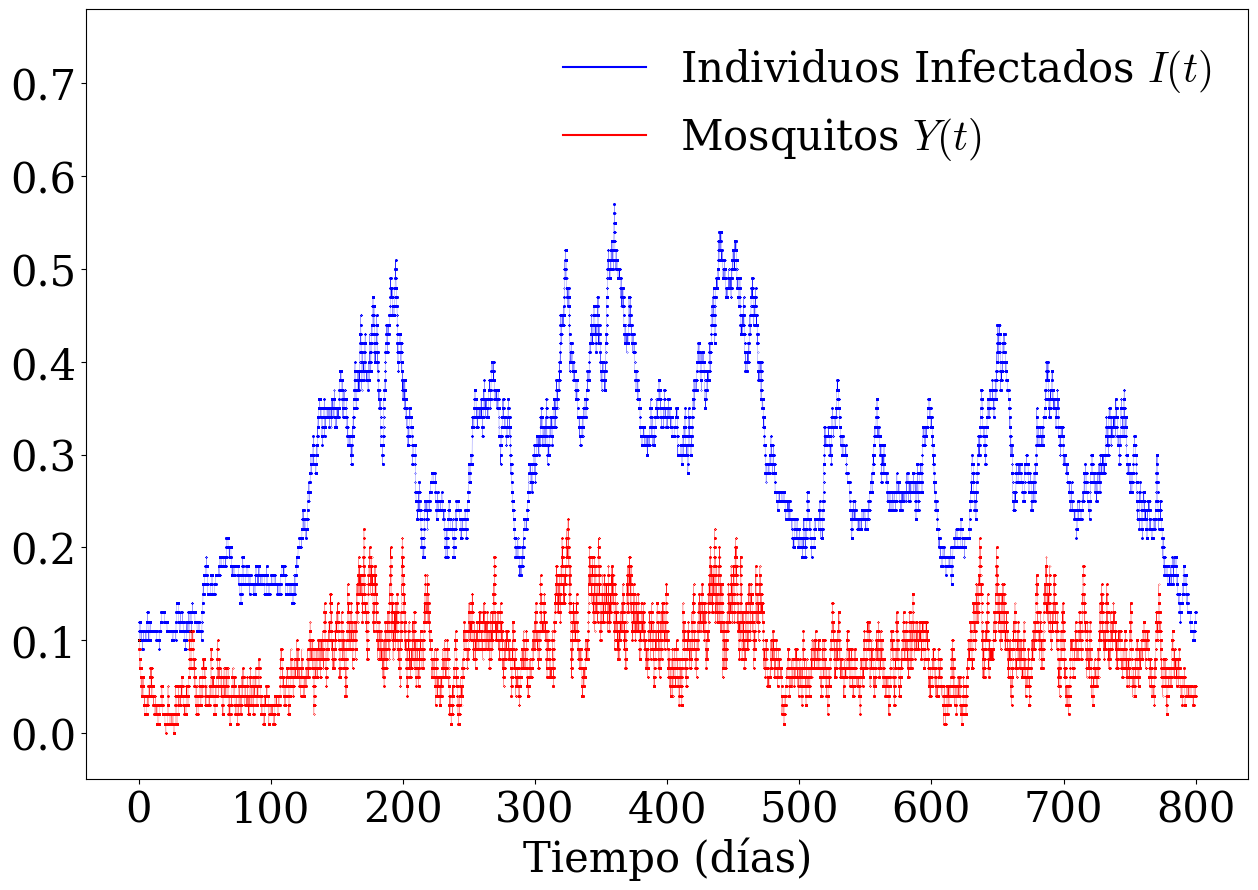

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.78)

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tIA*i0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(tTime/tscale, tYA*y0, ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(tTime/tscale, tIA*0 -1, ls = "solid",color='b' , label=r'Individuos Infectados $I(t)$')#ls='-.'
ax.plot(tTime/tscale, tYA*0 -1, ls = "solid",color='r',label=r'Mosquitos $Y(t)$')

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_Y_vs_t_tauleap_mod5ec.png')

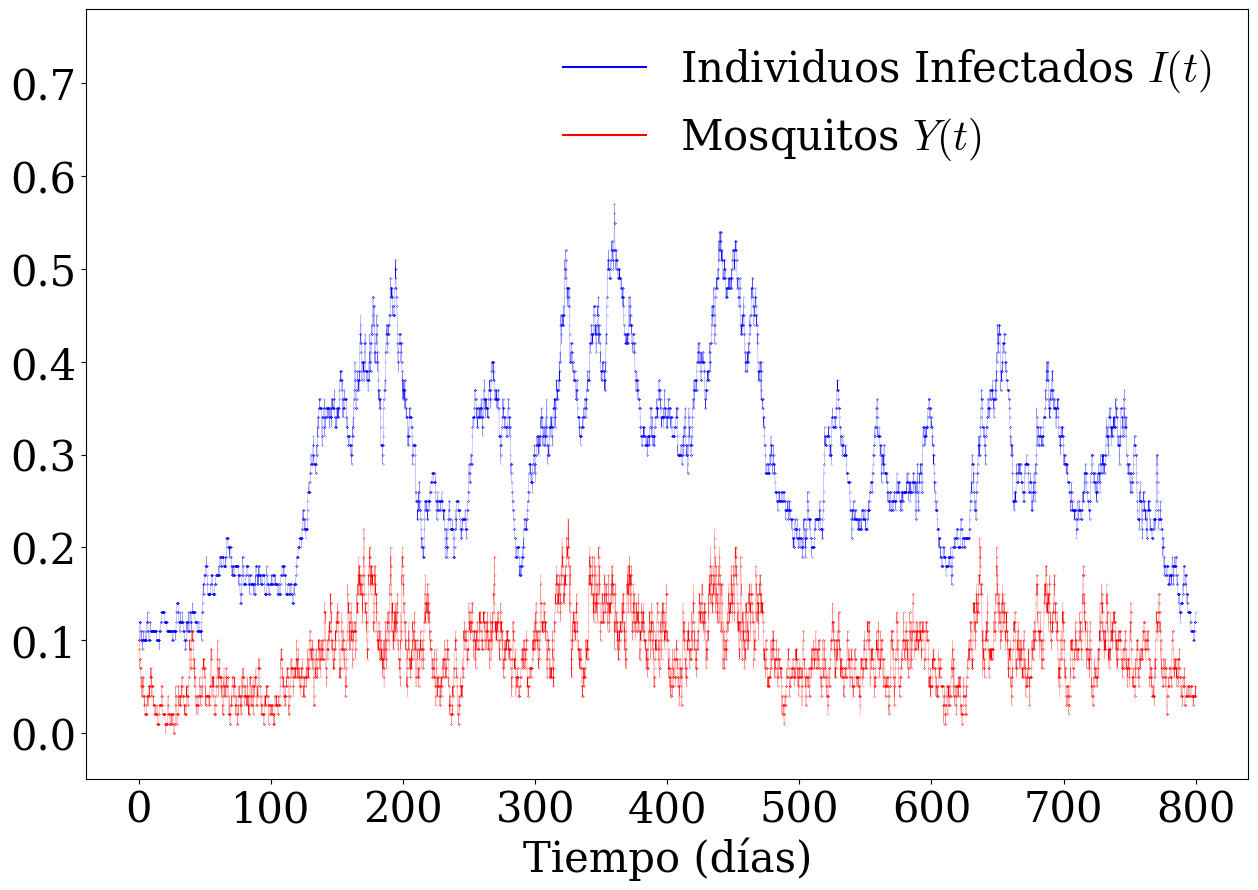

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.78)
indices_=list(range(1,len(tIA)+1 , 50))

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime[indices_]/tscale, tIA[indices_]*i0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(tTime[indices_]/tscale, tYA[indices_]*y0, ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(tTime[indices_]/tscale, tIA[indices_]*0 -1, ls = "solid",color='b' , label=r'Individuos Infectados $I(t)$')#ls='-.'
ax.plot(tTime[indices_]/tscale, tYA[indices_]*0 -1, ls = "solid",color='r',label=r'Mosquitos $Y(t)$')

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_Y_vs_t_tauleap_graf_c50_mod5ec.png')

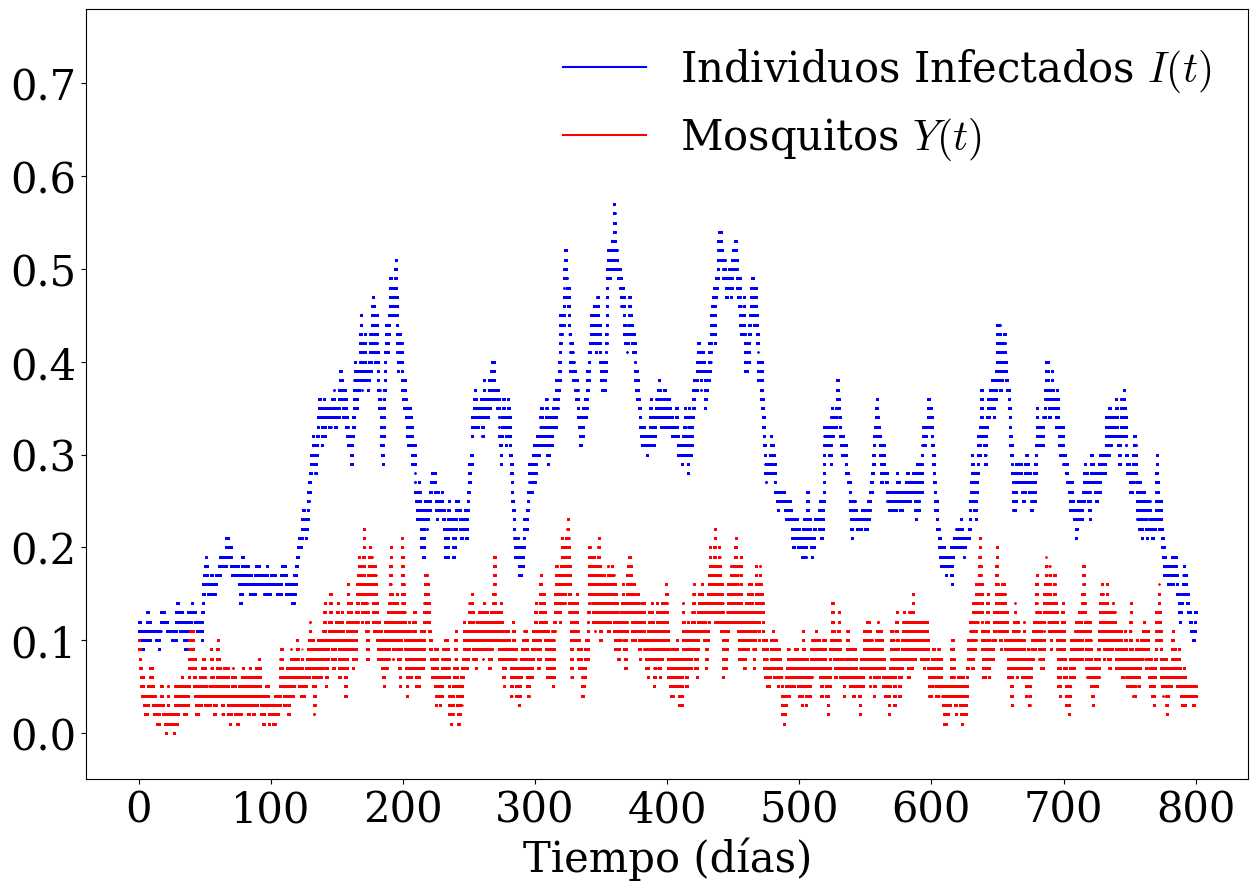

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.78)

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tIA*i0, "o",color='b',ms = 0.5 )#ls='-.'
ax.plot(tTime/tscale, tYA*y0, "o",color='r',ms = 0.5 )

ax.plot(tTime/tscale, tIA*0 -1, ls = "solid",color='b' , label=r'Individuos Infectados $I(t)$')#ls='-.'
ax.plot(tTime/tscale, tYA*0 -1, ls = "solid",color='r',label=r'Mosquitos $Y(t)$')

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_Y_vs_t_tauleap_mod5ec_marker.png')

In [ ]:

#scale dterministico
Y0=100
I0 = 100
w0 = 1e4 #0.01
T_0=w0
v0=1e5
tscale = 0.5

"""
#scale estocasticp
Y0=0.01
I0 = 0.01
w0 = 1e2 #0.01
T_0=w0
v0=1e2
tscale = 0.5
"""


print(" t scale", tscale)
miu ,q ,a, b ,g,r,l,m,d,k_T,k_W,k,p,c ,i0, y0  =escalado_den(miu = 0.0000391, q=1.5,a = 0.162, b = 0.162,g = 0.05\
             ,r = 1e3,l = 1e4\
             ,m = 0.3,d = 0.5,k = 0.0000002,p = 15800.0,c = 5\
             ,Y0=Y0 ,I0 = I0, T0 = T_0, W0 = w0, V0 = v0 , t=tscale)

param_scale={"miu":miu , "q" : q ,"a":a , "b" : b ,"g":g,"r":r,"l":l,"m":m,"d":d,"k_T":k_T,"k_W":k_W,"k":k,"p":p,"c":c,"i0":i0,"y0":y0 }

for name,p_i in param_scale.items():
  print("{} : {}".format(name,p_i))



i_scale = i_ini / I0
y_scale = y_ini / Y0
#T_scale = T_ini / T_0
T_scale = l/m
W_scale = W_ini / w0
V_scale = V_ini / v0



 t scale 0.5
t .. 0.5
miu : 7.82e-05
q : 1.5
a : 32.4
b : 32.4
g : 0.1
r : 0.02
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0
i0 : 100
y0 : 100
x0 real  [0.1, 0.1, 100000, 10, 10]
xo escalado [1.00000000e-03 1.00000000e-03 3.33333333e+00 1.00000000e-03
 1.00000000e-04]


In [ ]:
x0_scale = np.array([i_scale,y_scale,T_scale,W_scale,V_scale])
print("x0 real ",x0)
print("xo escalado",x0_scale)

solve_ipv_tau=spi.solve_ivp(Host2_0,[0,tend],x0_scale, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0), max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3

solution_ipv_tau = solve_ipv_tau.sol(timePoints)


x0 real  [0.1, 0.1, 100000, 10, 10]
xo escalado [1.00000000e+01 1.00000000e+01 3.33333333e+02 1.00000000e-01
 1.00000000e-01]


In [ ]:
len(tIA)

80000

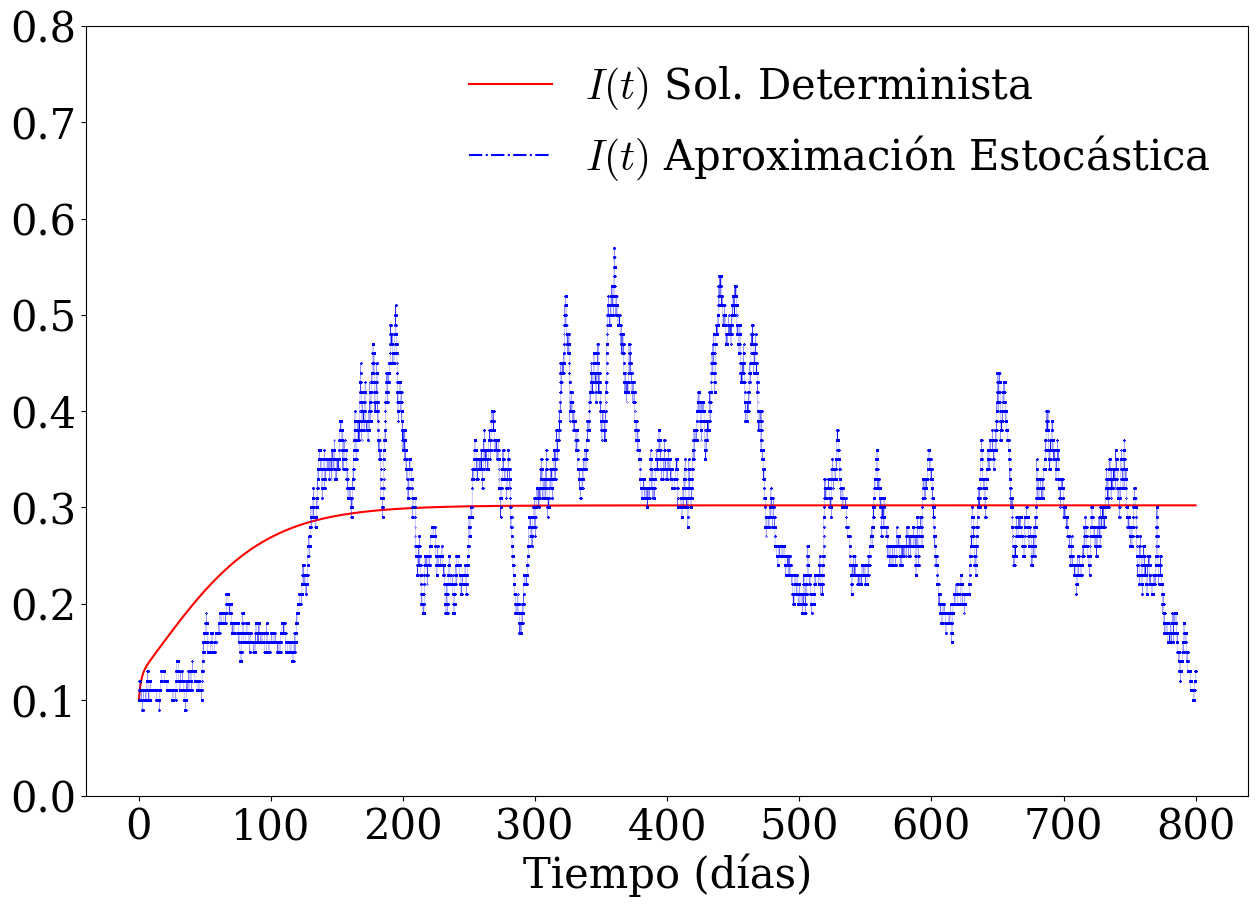

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


#ax.plot(tTime/tscale, solution_ipv_tau[0,0:len(tIA)]*i0, ls = "solid",color='b', label=r'Individuos Infectados Det $T(t)$')#ls='-.'
ax.plot(timePoints/tscale, solution_ipv_tau[0,:]*i0, ls = "solid",color='r', label=r'$I(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(0, 0.8)


#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tIA*i0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime/tscale, tTime*0 -1, ls = "-.",color='b' , label=r'$I(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_vs_t_tauleap_vs_det_mod5ec.png')

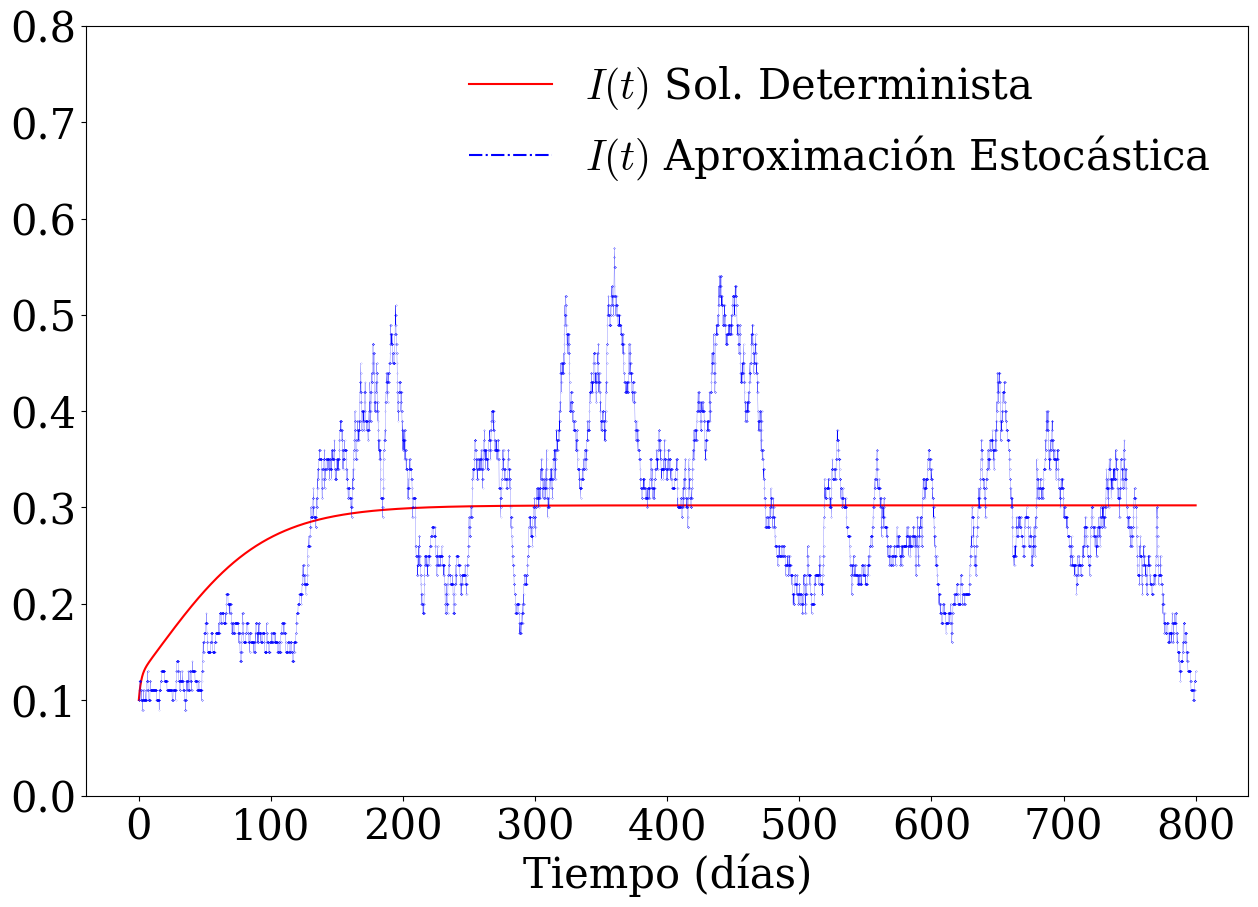

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


#ax.plot(tTime/tscale, solution_ipv_tau[0,0:len(tIA)]*i0, ls = "solid",color='b', label=r'Individuos Infectados Det $T(t)$')#ls='-.'
ax.plot(timePoints[indices_]/tscale, solution_ipv_tau[0,indices_]*i0, ls = "solid",color='r', label=r'$I(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(0, 0.8)

indices_=list(range(1,len(tIA)+1 , 50))


#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime[indices_]/tscale, tIA[indices_]*i0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime[indices_]/tscale, tTime[indices_]*0 -1, ls = "-.",color='b' , label=r'$I(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_vs_t_tauleap_vs_det_graf_c50_mod5ec.png')

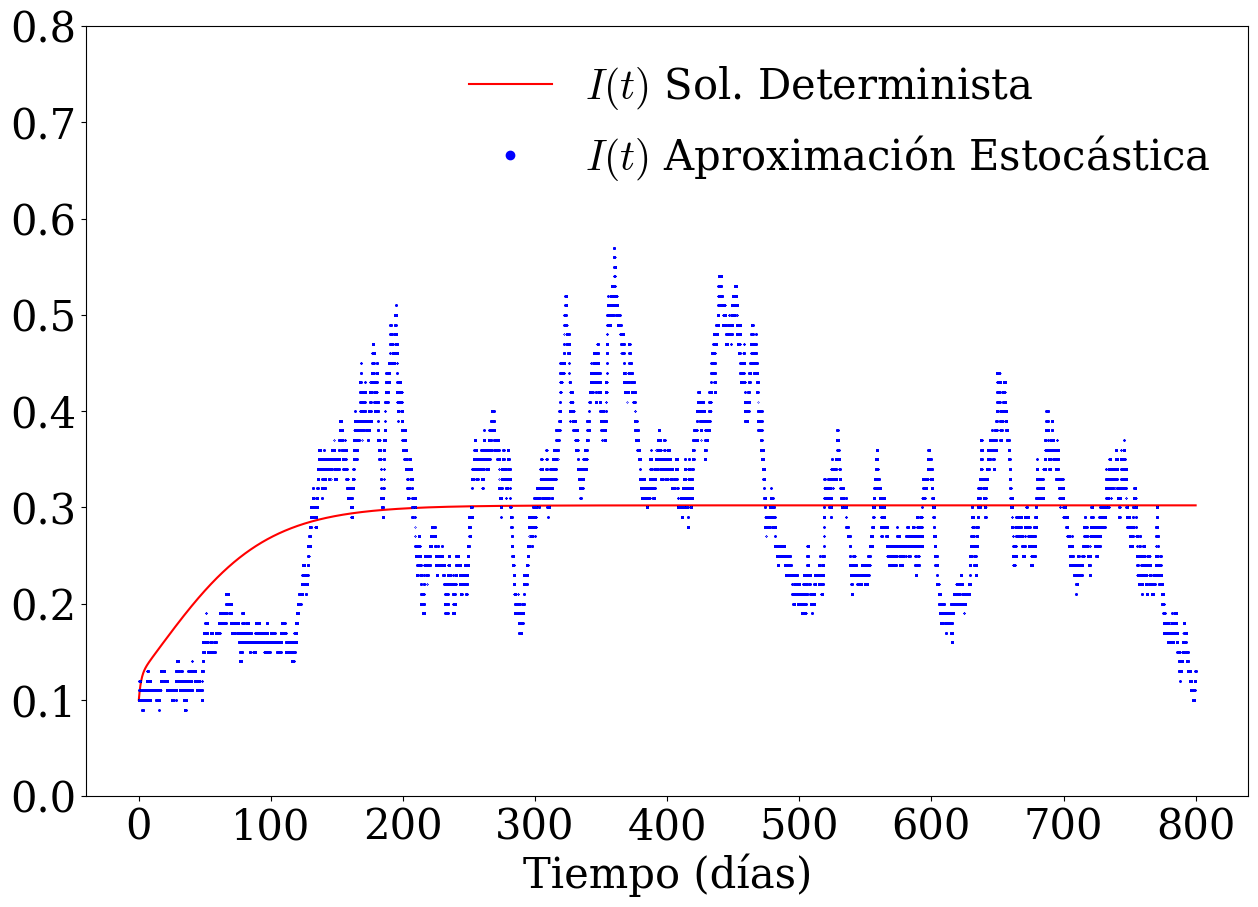

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


#ax.plot(tTime/tscale, solution_ipv_tau[0,0:len(tIA)]*i0, ls = "solid",color='b', label=r'Individuos Infectados Det $T(t)$')#ls='-.'
ax.plot(timePoints/tscale, solution_ipv_tau[0,:]*i0, ls = "solid",color='r', label=r'$I(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(0, 0.8)


#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tIA*i0, "o",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime/tscale, tTime*0 -1, "o",color='b' , label=r'$I(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'I_vs_t_tauleap_vs_det_mod5ec_marker.png')

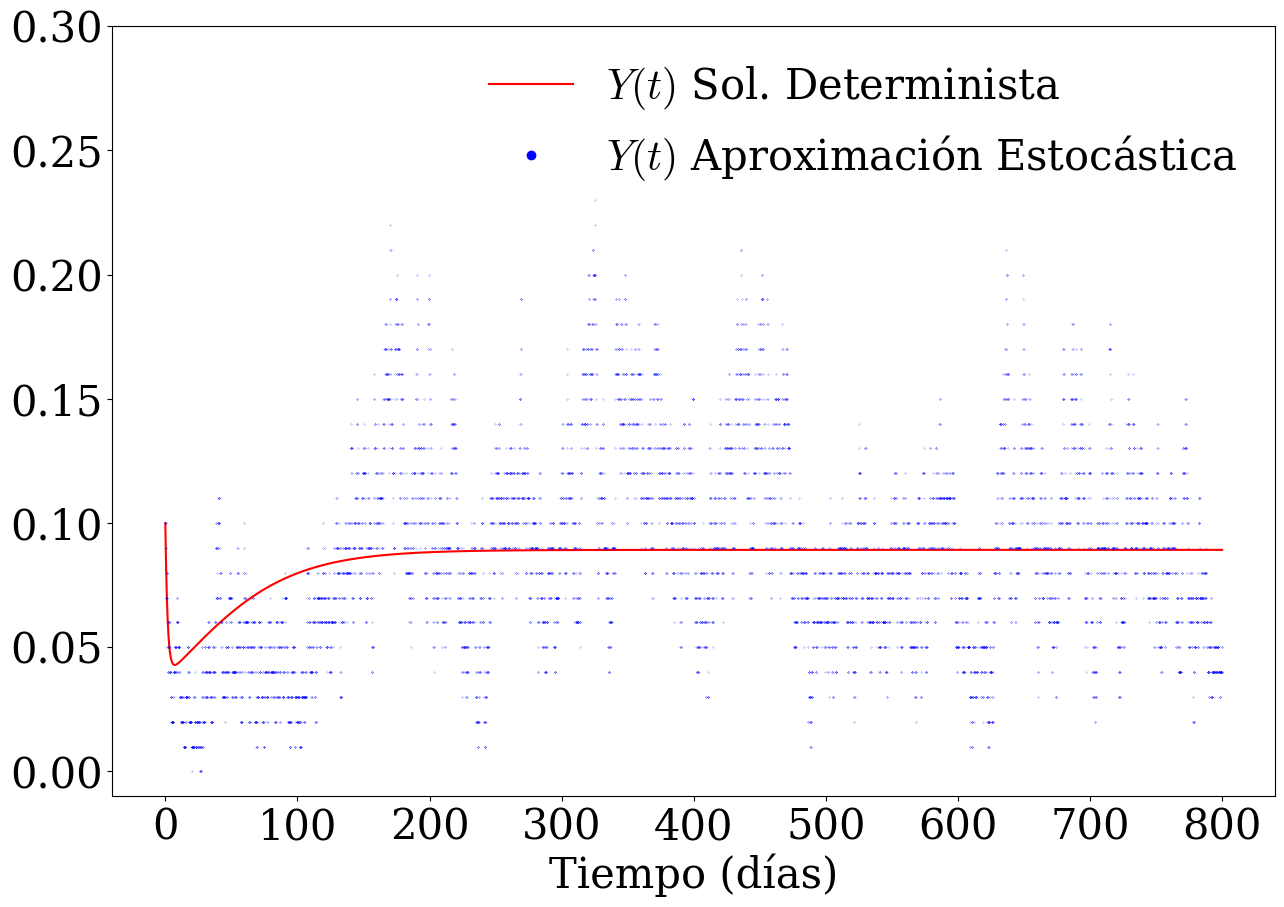

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
indices_=list(range(1,len(tIA)+1 , 100))



ax.plot(timePoints[indices_]/tscale, solution_ipv_tau[1,indices_]*y0, ls = "solid",color='r', label=r'$Y(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(-0.01, 0.3)

ax.plot(tTime[indices_]/tscale, tYA[indices_]*y0, "o",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime[indices_]/tscale, tTime[indices_]*0 -1, "o",color='b' , label=r'$Y(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'Y_vs_t_tauleap_vs_det_graf_c50_mod5ec_marker.png')

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


ax.plot(timePoints/tscale, solution_ipv_tau[1,:]*y0, ls = "solid",color='r', label=r'$Y(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(-0.01, 0.3)

ax.plot(tTime/tscale, tYA*y0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime/tscale, tTime*0 -1, ls = "solid",color='b' , label=r'$Y(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'Y_vs_t_tauleap_vs_det_mod5ec.png')

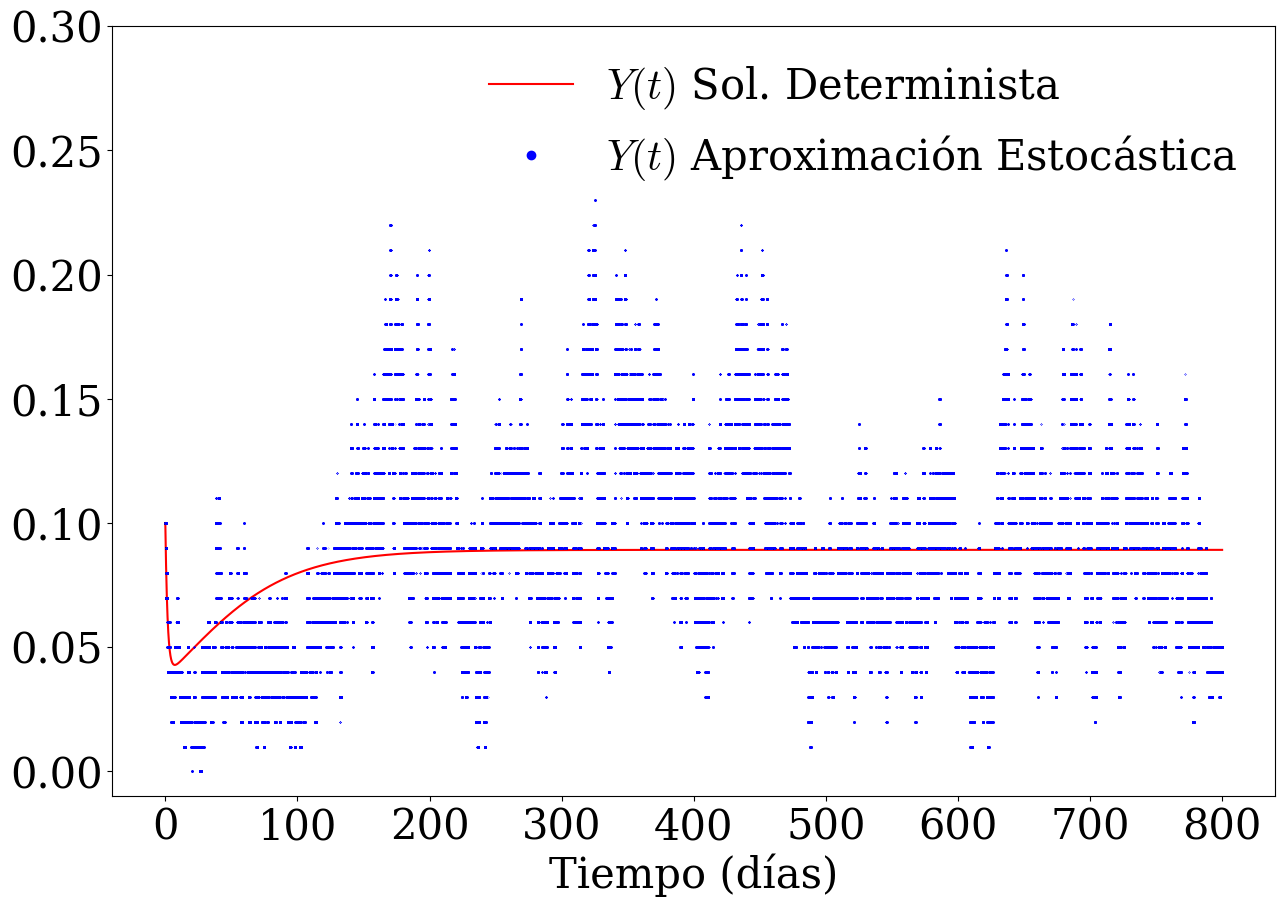

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


ax.plot(timePoints/tscale, solution_ipv_tau[1,:]*y0, ls = "solid",color='r', label=r'$Y(t)$ Sol. Determinista')#ls='-.'
ax.set_ylim(-0.01, 0.3)

ax.plot(tTime/tscale, tYA*y0, "o",color='b',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime/tscale, tTime*0 -1,"o",color='b' , label=r'$Y(t)$ Aproximación Estocástica')#ls='-.'

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'Y_vs_t_tauleap_vs_det_mod5ec_marker.png')

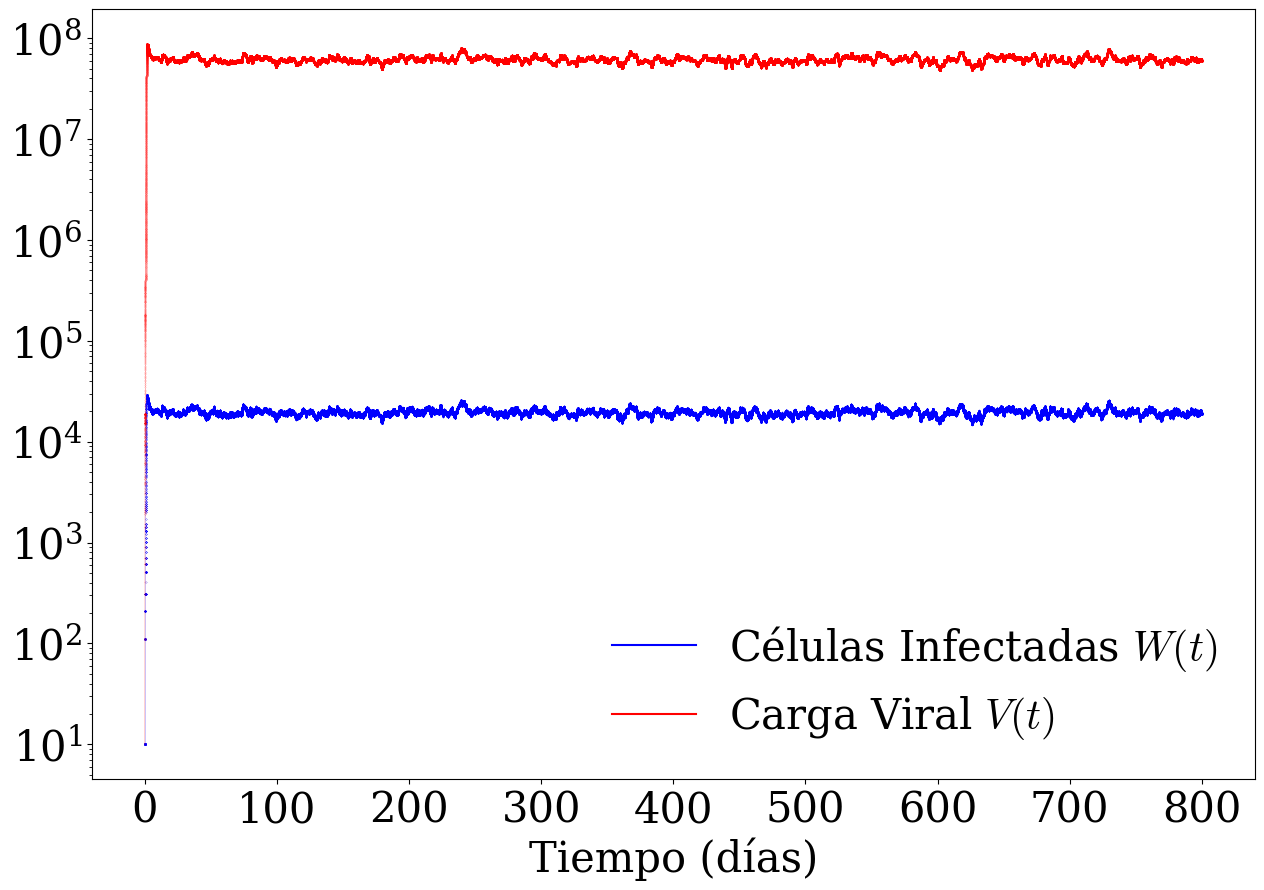

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tWA*w0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(tTime/tscale, tVA*v0, ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(tTime/tscale, tWA*0 -1, ls = "solid",color='b' , label=r'Células Infectadas $W(t)$')#ls='-.'
ax.plot(tTime/tscale, tVA*0 -1, ls = "solid",color='r',label=r'Carga Viral $V(t)$')

#ax.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'W_V_vs_t_tauleap_mod5ec.png')

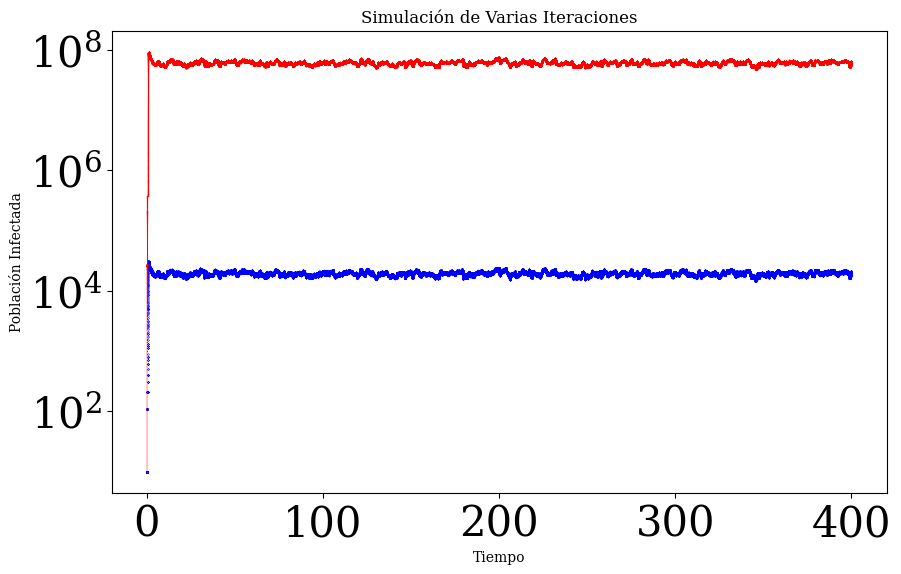

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tTime,tWA*w0,'b.-',tTime,tVA*v0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
plt.yscale("log")
plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

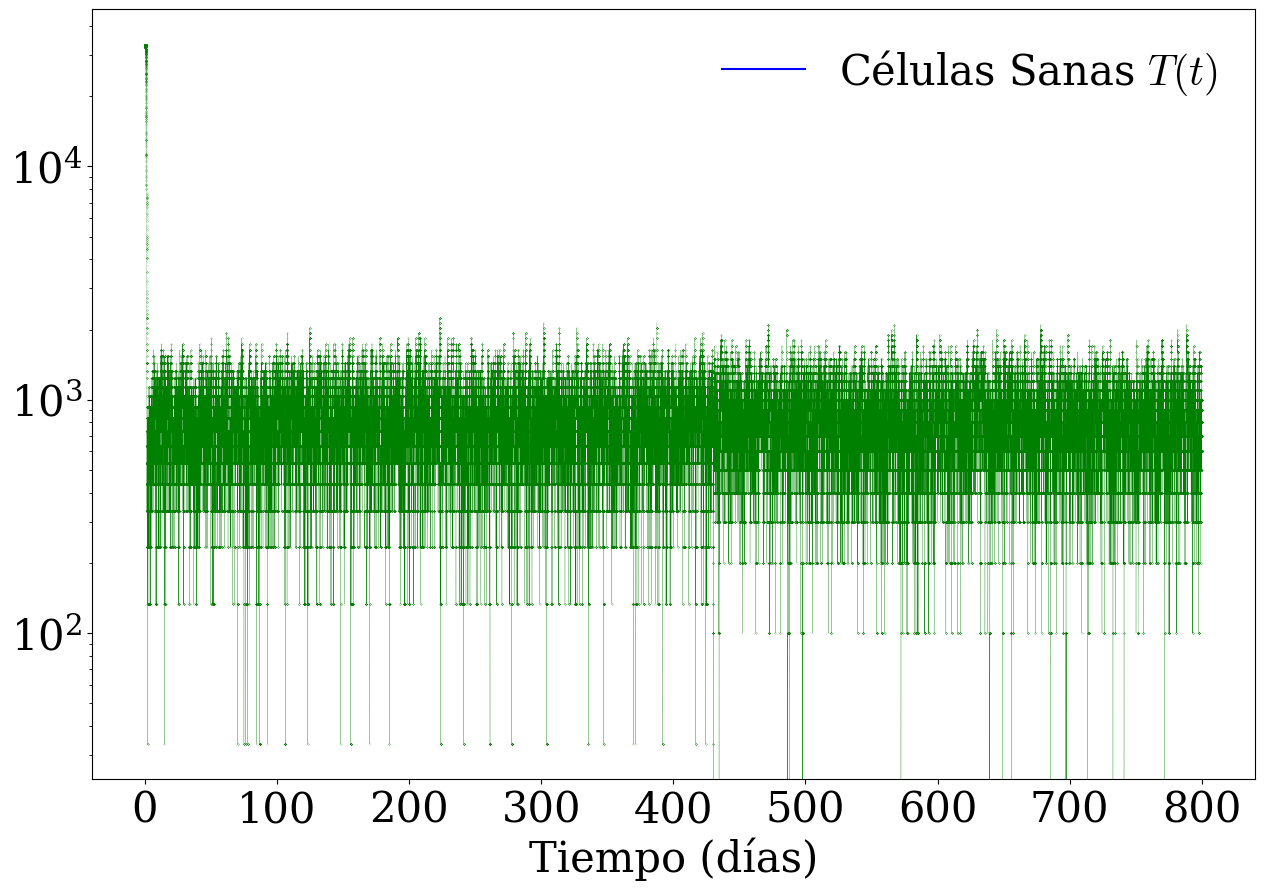

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime/tscale, tTA*T_0, ".-",color='g',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime/tscale, tWA*0 -1, ls = "solid",color='b' , label=r'Células Sanas $T(t)$')#ls='-.'

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'T_vs_t_tauleap_mod5ec.png')

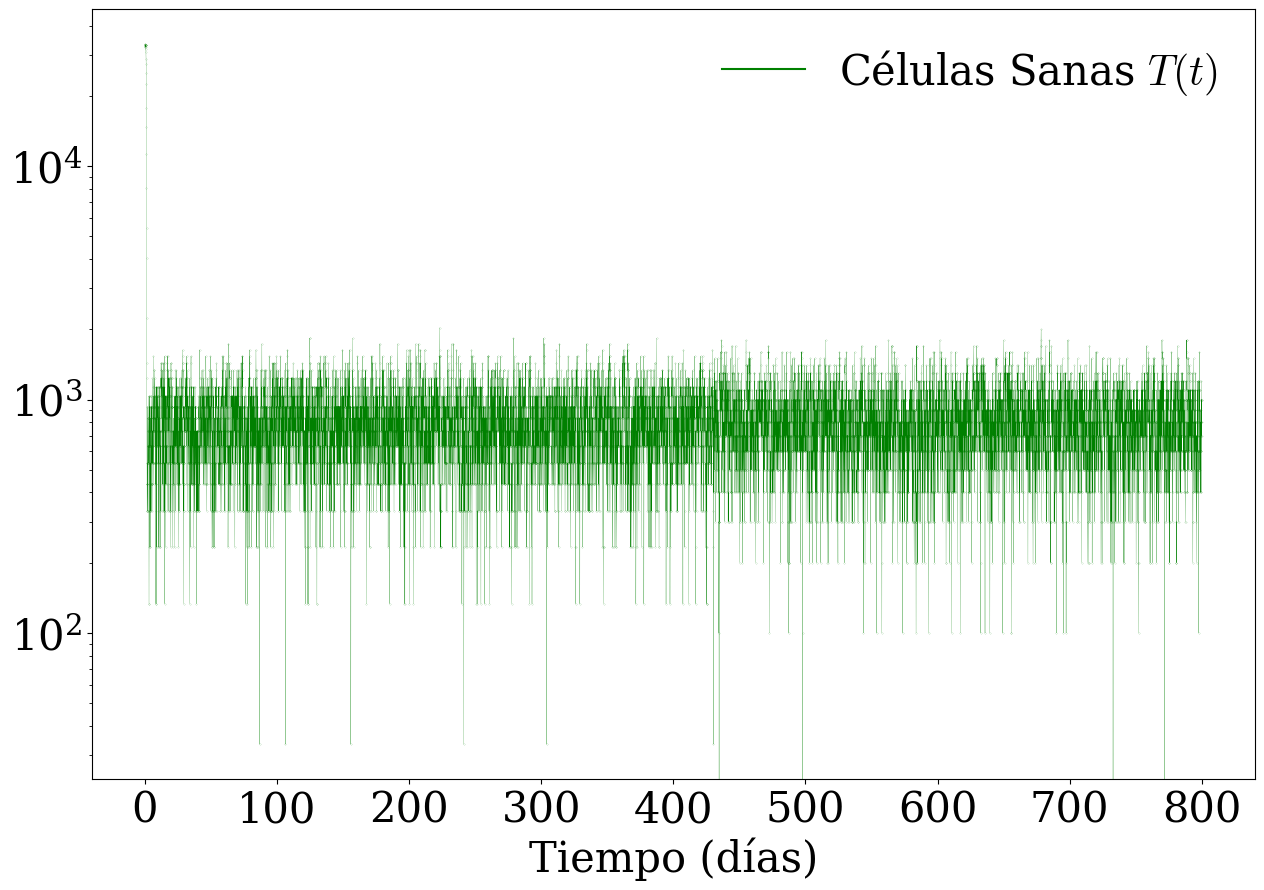

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
indices_=list(range(1,len(tIA)+1 , 50))

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime[indices_]/tscale, tTA[indices_]*T_0, ".-",color='g',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime[indices_]/tscale, tTA[indices_]*0 -1, ls = "solid",color='g' , label=r'Células Sanas $T(t)$')#ls='-.'

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'T_vs_t_tauleap_graf_c50_mod5ec.png')

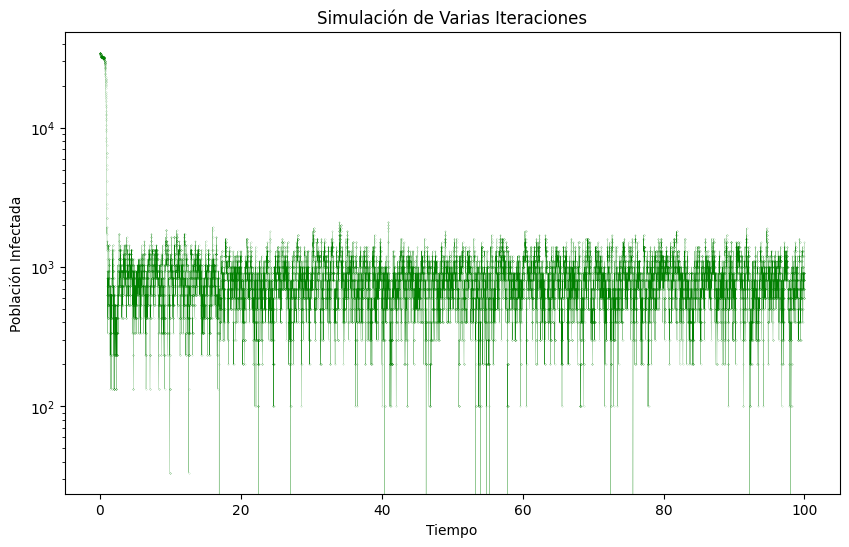

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tTime,tTA*w0,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
plt.yscale("log")
plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

0
10
20
30
40
50
60
70
80
90


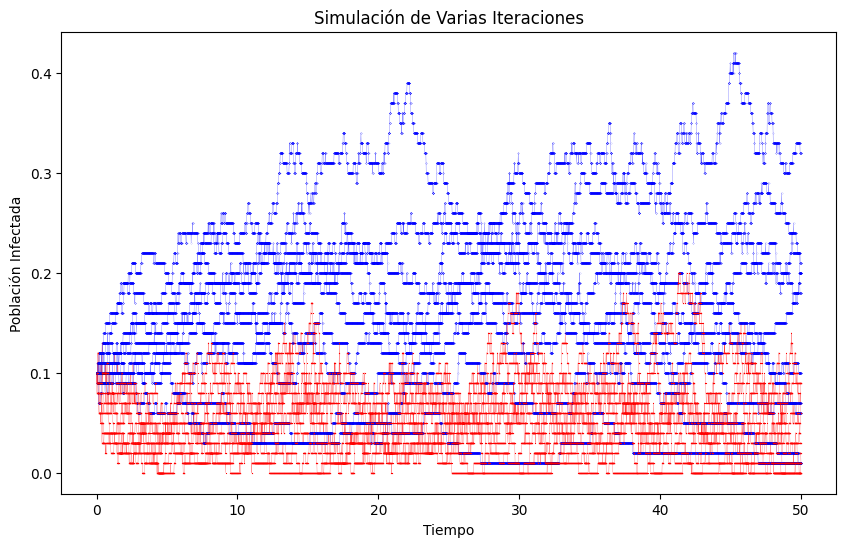

In [ ]:
# Número de iteraciones
num_iteraciones = 10
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for iter_ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , seed_ = 10 * iter_, **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

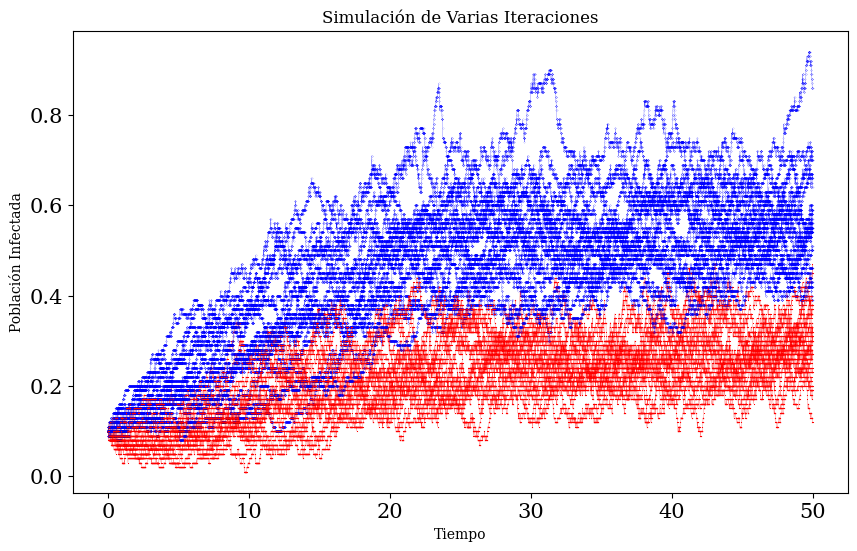

In [ ]:
# Número de iteraciones
num_iteraciones = 20
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

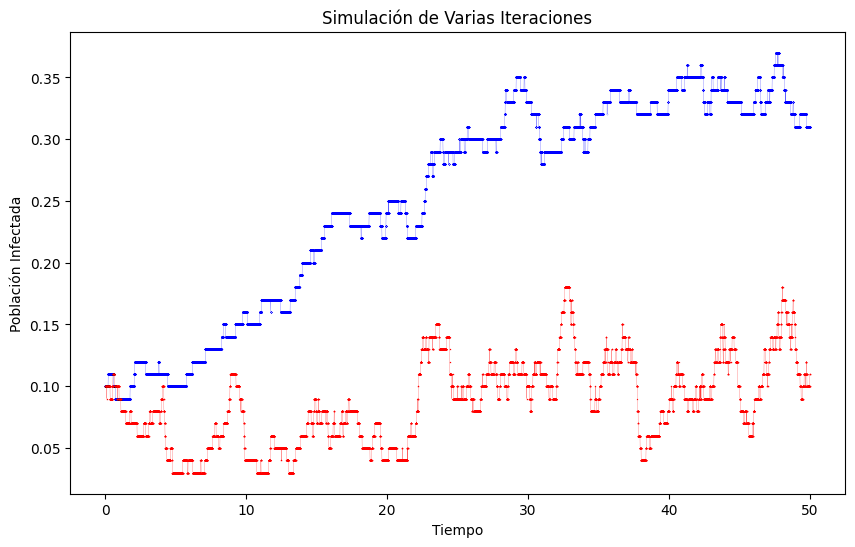

In [ ]:
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.0005, ruleta=True , **param_scale)
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    #plt.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

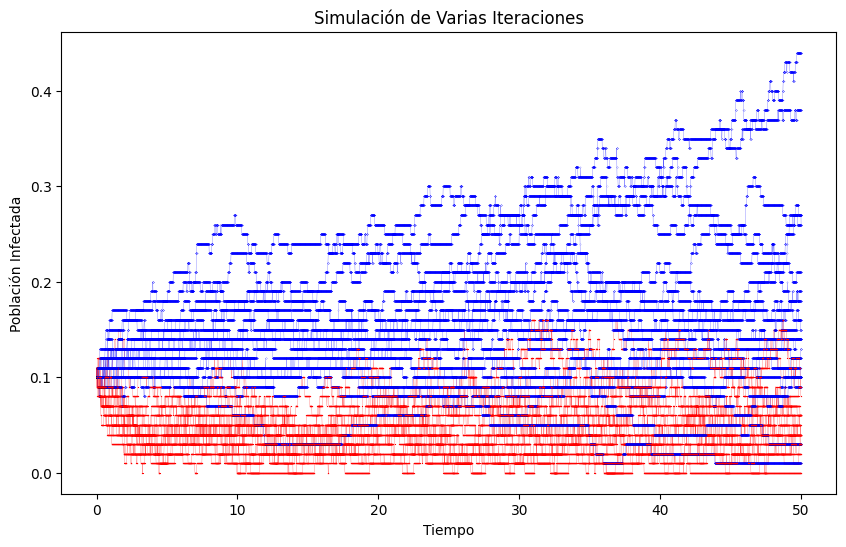

In [ ]:
num_iteraciones = 20
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , ruleta=True, **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

In [ ]:
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , **param_scale)
    #plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.yscale("log")
    plt.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

NameError: name 'x0_scale' is not defined

## Buenas $\tau$ leaping


In [ ]:
# set the initial conditions
"""
i_ini = 0
y_ini = 0.0001
T_ini = 100000
W_ini = 0
V_ini = 0.1
"""
i_ini = 0.1
y_ini = 0.1
T_ini = 100000
W_ini = 10
V_ini = 10
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]


i_scale = i_ini / I0
y_scale = y_ini / Y0
#T_scale = T_ini / T_0
T_scale = l/m
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]
x0_scale

[10.0, 10.0, 333.33333333333337, 0.1, 0.1]

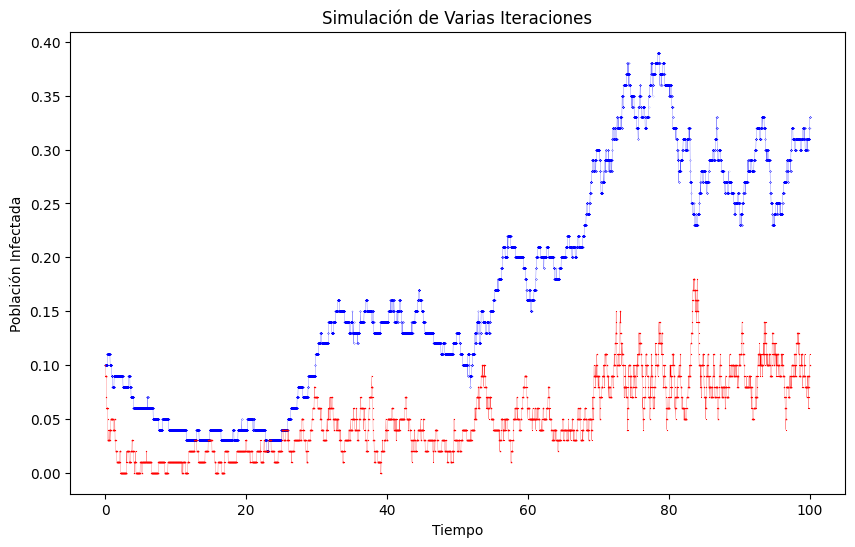

In [ ]:
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))

for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)

    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=100, tau=0.005 ,seed_=277, **param_scale) #, seed_= 182
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    #plt.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

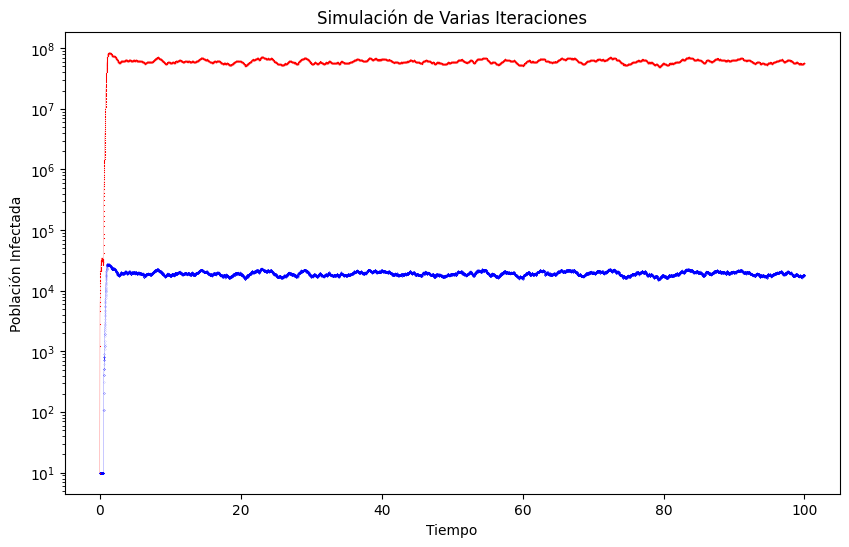

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tTime,tWA*w0,'b.-',tTime,tVA*v0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
plt.yscale("log")
plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

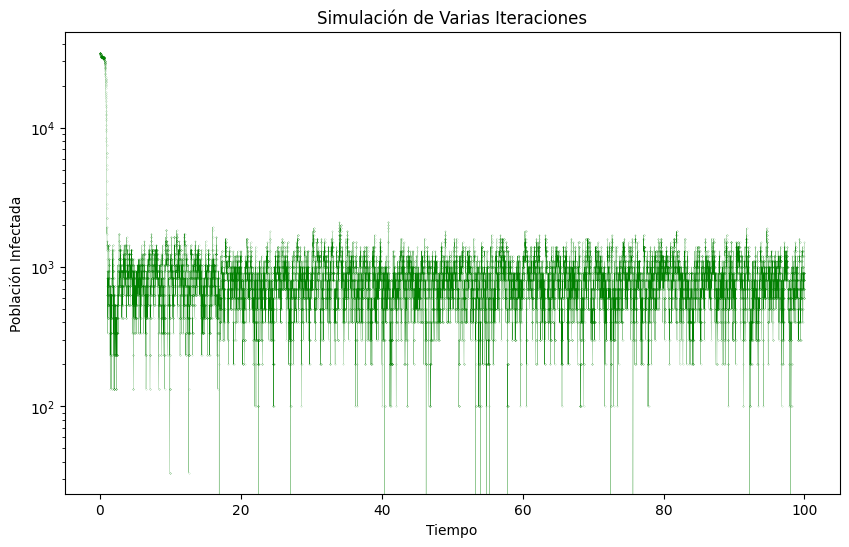

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tTime,tTA*w0,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
plt.yscale("log")
plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

0
10
20
30
40
50
60
70
80
90


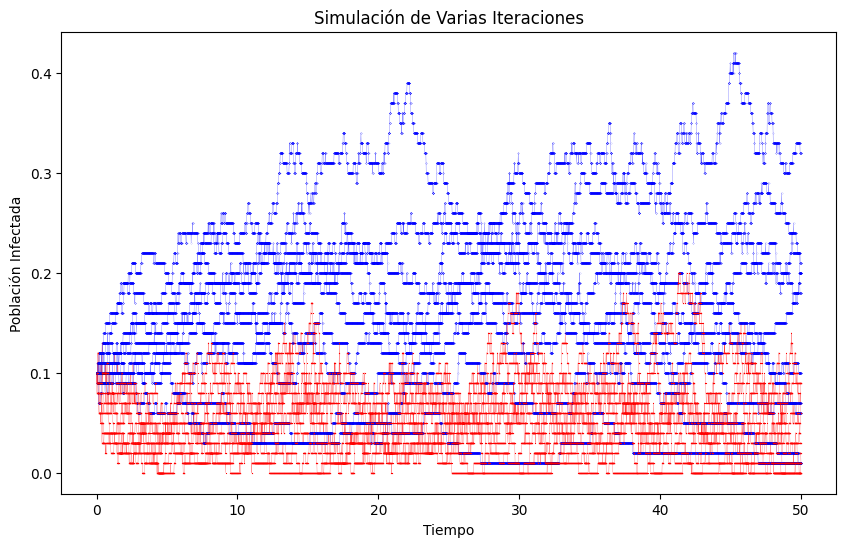

In [ ]:
# Número de iteraciones
num_iteraciones = 10
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for iter_ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , seed_ = 10 * iter_, **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

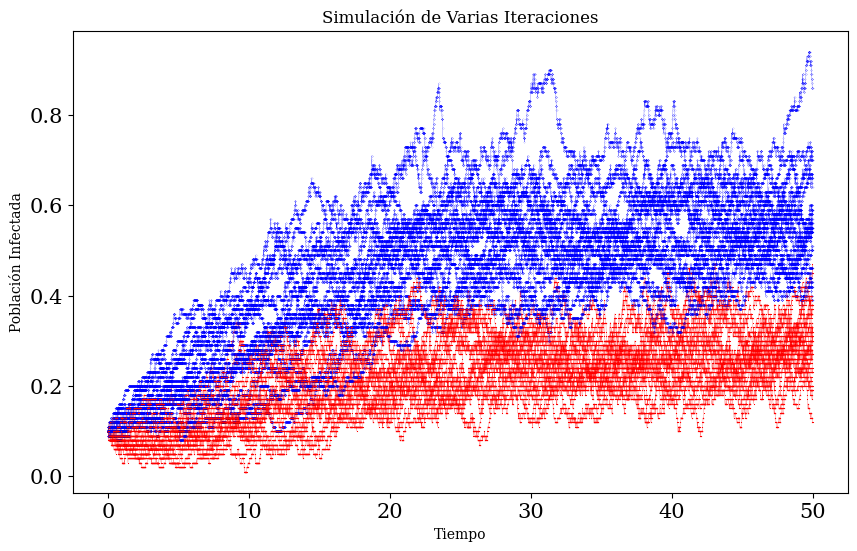

In [ ]:
# Número de iteraciones
num_iteraciones = 20
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

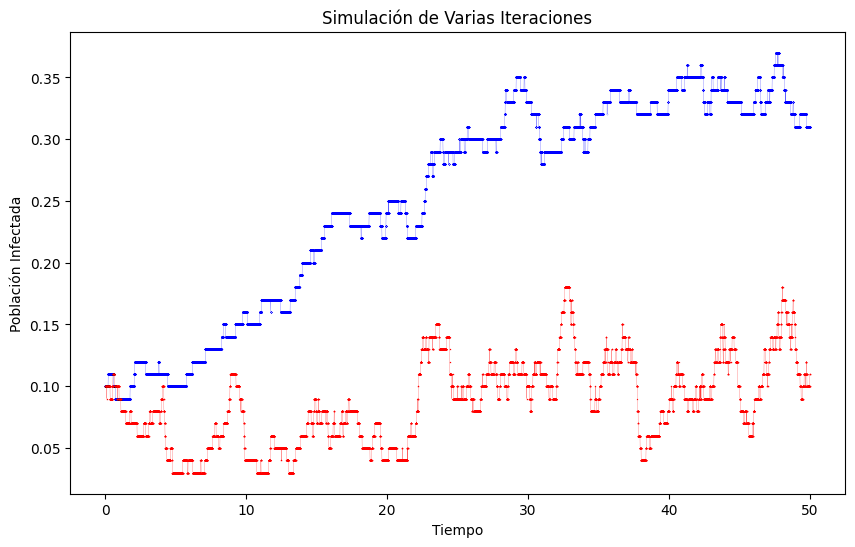

In [ ]:
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.0005, ruleta=True , **param_scale)
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    #plt.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

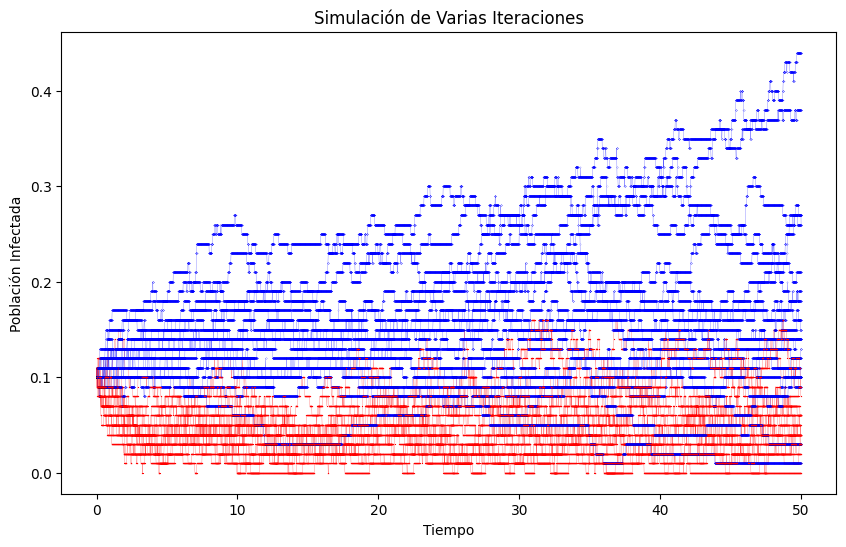

In [ ]:
num_iteraciones = 20
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , ruleta=True, **param_scale)
    #plt.plot(tTime,tTA,'b.-',tTime,tIA,'r*-',tTime,tVA,'g.-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

In [ ]:
# Número de iteraciones
num_iteraciones = 1
INPUT = x0_scale
plt.figure(figsize=(10, 6))
for _ in range(num_iteraciones):
    #tTime, tTA, tIA, tVA = VIHS(x=3.929*np.random.uniform(0,100),y=2.46e-05*np.random.uniform(0,100),z=2.01*np.random.uniform(0,100),ND=250.0, tau=0.05)
    tTime, tIA , tYA ,tTA, tWA, tVA = deng_stock(INPUT = np.array(INPUT) ,ND=50, tau=0.005 , **param_scale)
    #plt.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
    plt.yscale("log")
    plt.plot(tTime,tWA,'b.-',tTime,tVA,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',

plt.xlabel('Tiempo')
plt.ylabel('Población Infectada')
plt.title('Simulación de Varias Iteraciones')
plt.show()

NameError: name 'x0_scale' is not defined

# graficas Toxoplasma

In [ ]:

def T_tilde( a1, a2):
    # Calculate the discriminant
    #discriminant = math.sqrt(a1**2 - 4 * a2)
    #discriminant = cmath.sqrt(a1**2 - 4 * a2)
    discriminant = np.sqrt((a1**2) - (4 * a2))
    # Calculate the two solutions for T_plus and T_minus
    T_plus = (a1 + discriminant) / 2
    T_minus = (a1 - discriminant) / 2

    return T_plus, T_minus

def T_tilde_minus( a1, a2):
    discriminant = np.sqrt((a1**2) - (4 * a2))
    T_minus = (a1 - discriminant) * 0.5

    return T_minus


def calculate_a1_a2(g, m, d, p, T0, Rv0):
    # Calculate a1
    a1 = (g * (m + d) / (p * m)) + T0 * (1 + 1 / Rv0)

    # Calculate a2
    a2 = (T0**2) / Rv0

    return a1,a2

def calculate_a1(g, m, d, p, T0, Rv0):
    # Calculate a1
    a1 = (g * (m + d) / (p * m)) + (T0 * (1 + (1 / Rv0)))
    return a1

def calculate_a2(T0, Rv0):

    # Calculate a2
    a2 = (T0**2) / Rv0

    return  a2

def gE(a,E):
  return a*E

def T0_(lambda_may,m):
  return lambda_may/m

def Rv0(T0,k,p,c,m,d):
  return (T0*k*p)/(c*(m+d))

def RvE(T0,T_tilde_minus):
  return T0/T_tilde_minus

def RvE_2(T0, alpha1, alpha2):
    numerator = 2 * T0
    denominator = alpha1 - math.sqrt(alpha1**2 - 4 * alpha2)
    result = numerator / denominator
    return result



def k_(T0,R0,p,c,m,d):
  return (R0*c*(m+d))/(T0*p)



In [ ]:
def dT_dt(T, W, V):
    lambda_may = 0.1  # Example value for lambda_may
    k = 0.2  # Example value for k
    m = 0.3  # Example value for m
    return lambda_may - k * V * T - m * T

def dW_dt(T, W, V):
    k = 0.2  # Example value for k
    m = 0.3  # Example value for m
    d = 0.1  # Example value for d
    return k * V * T - (m + d) * W

def dV_dt(T, W, V):
    g = lambda E: 0.5 * E  # Example function for g(E)
    p = 0.4  # Example value for p
    c = 0.3  # Example value for c
    E = 1.0  # Example value for E
    return g(E) + p * W - c * V


def dS_dt(mu, N, lambd, ES, S):
    return mu*N - lambd*ES - mu*S

def dI_dt(mu, lambd, ES, I):
    return lambd*ES - mu*I

def dE_dt(theta, IV, gamma, E):
    return theta * IV * (1 - E) - gamma * E


def Veq(c, g, p, Lambd, m, d, Rv):
    return 1/c * (g + p * Lambda / (m + d) * (1 - 1/Rv))

def calculate_Rhoo(lambd, theta, N, mu, gamma):
    return (lambd * theta * N) / (mu * gamma)

def calculate_Rh(p , T0, c, m, d, Rvo, Rhoo):
    return (p*m * T0) / (c * (m + d)) * (1 - 1/Rvo)



def calculate_Rd0(alpha, q, beta, delta, gamma):
    #gamma = gamma + mu
    return (alpha * q * beta) / (delta * (gamma))

In [ ]:
def calculate_Tte(T0, Rv):
    return T0 / Rv

def calculate_Vte(c, g, p, Lambd, m, d, Rv):
    return 1/c * (g + p * Lambd / (m + d) * (1 - 1/Rv))

def calculate_Wte(Lambd, m, d, Rv):
    return Lambd / (m + d) * (1 - 1/Rv)


In [ ]:
def escalado(mu = 0.1,lambd = 0.01,gamma = 0.05\
             ,theta = 2e-10,a = 1e4,lambda_may = 5e3\
             ,m = 0.3,d = 0.1,k = 6e-7,p = 5.8e3,c = 1e2\
             ,N=1e6 ,I0 = 5e4, T0 = 1e5, W0 = 1e4, V0 = 1e5 , t=1):

  mu = mu/t
  lambd =  lambd/t
  gamma = gamma /t
  theta = (I0 * theta) /t
  N = N/I0
  a = a/(V0 * t)
  lambda_may = lambda_may/(T0 * t)
  m = m/t
  d = d/t
  k_T = (k * V0)/t
  k_W = (V0 * T0 *k)/(W0 * t)
  p = (p*W0)/(V0*t)
  c = c/t
  print("t ..",t)
  print("m ..",m)
  print("lambd ..",lambd)

  return mu ,lambd ,gamma,theta,a,lambda_may,m,d,k_T,k_W,p,c

## Mod 5 ec. param paper Feng

In [ ]:
#parametros
mu = 0.1
lambd = 0.01
gamma = 0.05
theta = 2e-10
a=1e4
lambda_may = 5e3
m = 0.3
d = 0.1
k = 6e-7
p = 5.8e3
c = 1e2

In [ ]:
Ym=0.05 #mosquito
N = 1e6
g = gE(a,Ym)

T0_value = T0_(lambda_may = lambda_may,m = m)
Rv0_value = Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)



alpha1 = calculate_a1(g, m, d, p, T0_value, Rv0_value)
alpha2 = calculate_a2(T0_value, Rv0_value)
_,T_tilde_minus_value =  T_tilde(a1 = alpha1, a2 = alpha2)


Teq = T_tilde_minus_value

RvE_value = RvE(T0_value,T_tilde_minus_value)

Weq = calculate_Wte(lambda_may, m, d, RvE_value)
Veq = calculate_Vte(c, g, p, lambda_may, m, d, RvE_value)

Rdo_value = calculate_Rd0(alpha = alpha*pH, q = q, beta = alpha*pM, delta = delta, gamma = gamma)

Ieq = calculate_tilde_I(Rd0 = Rdo_value, gamma = gamma, alpha = alpha*pH, q = q)
Yeq =  calculate_tilde_Y(Rd0 = Rdo_value, delta = delta , beta = alpha*pM)



print("T0 = ", T0_value)
print("R0 = ",Rv0_value)
print("RvE = ",RvE_value)
print("Teq = ", Teq)
print("Weq = ", Weq)
print("Veq = ", Veq)
print("I eq : ", Ieq )
print("Y eq : ", Yeq)
print("Rdo",Rdo_value)


T0 =  16666.666666666668
R0 =  1.45
RvE =  1.4500322206311942
Teq =  11493.997464009264
Weq =  3879.501901993053
Veq =  225016.11031559706
I eq :  0.40578911213995633
Y eq :  0.26132823857921345
Rdo 2.2782841984814386


In [ ]:
def mod_completo_ross(INP,t):
  '''The main set of equations'''
  Y=np.zeros((5))
  V = INP  #(T,W,V)

  # modelo rapido
  Y[0] = lambda_may - k * V[2] * V[0] - m * V[0] #T celulas sanas
  Y[1] = k * V[2] * V[0] - (m + d) * V[1]  #W celulas infectadas
  Y[2] = a * V[4] + p * V[1] - c * V[2] #V carga

  #modelo ross
  Y[3] = alpha * pH * q * (1 - V[3]) * V[4] - gamma * V[3]  #I infectados
  Y[4] = alpha * pM * (1 - V[4]) * V[3] - delta * V[4] #Y mosquitos infectadas


  return Y   # For odeint

In [ ]:
TS=0.05   #paso de tiempo

ND = 500

#INPUT = (T,W,V,I, Y)
INPUT=(1e5, 1e4,1e5,0.05,0.05)

t_start = 0.0
t_end = ND
t_inc = TS

t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(mod_completo_ross,INPUT,t_range)


#time=[i/t for i in range(len(RES)) ]
time= t_range

Text(0, 0.5, 'Células')

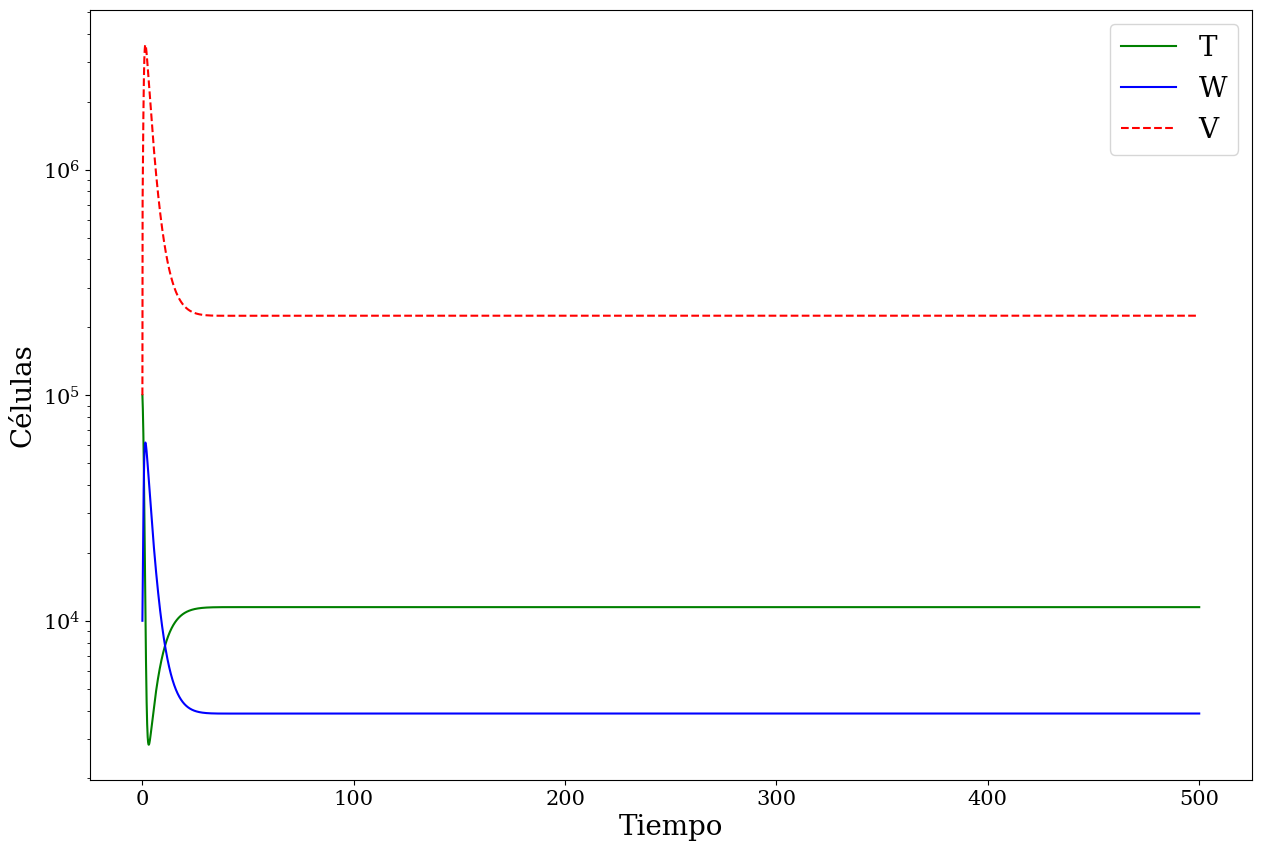

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
ax.plot(time, RES[:,0], color='g', ls='solid', label='T')
ax.plot(time, RES[:,1], color='b', ls='solid', label='W')
ax.plot(time, RES[:,2], color='r', ls='dashed',label='V')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)
ax.set_ylabel('Células', fontsize=20)

Text(0, 0.5, 'Poblacion')

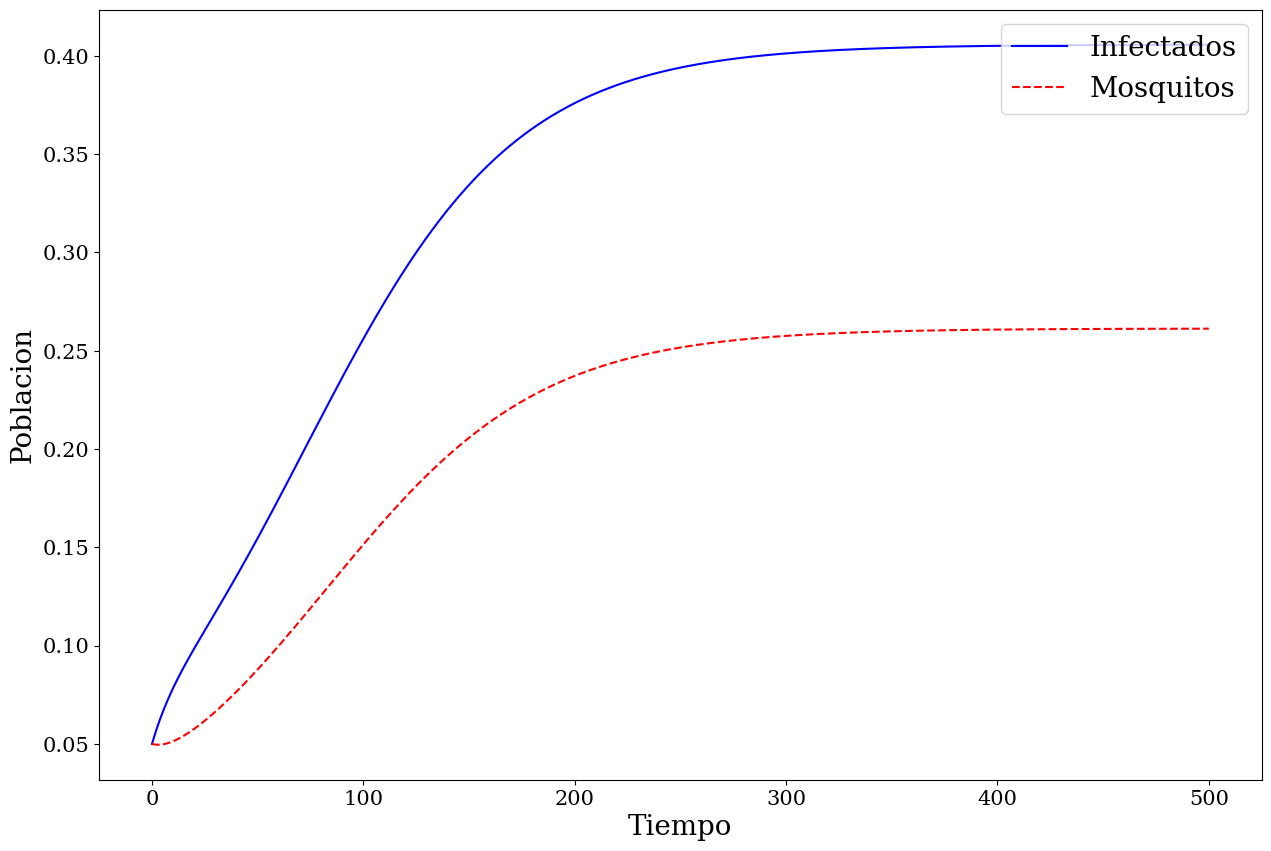

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)


#x = np.linspace(1., 8., 30)
ax.plot(time, RES[:,3], color='b', ls='solid', label='Infectados')
ax.plot(time, RES[:,4], color='r', ls='dashed',label='Mosquitos')
ax.legend(loc='upper right', prop={'size':20})
ax.set_xlabel('Tiempo', fontsize=20)
ax.set_ylabel('Poblacion', fontsize=20)

### R_0 toxoplasma

## Grafica con $R_2=2>1$

In [ ]:
lambda_may = 5000
m = 0.31
d = 0.1
p = 1e4
c = 20
a = 2e7

#T0 = 3.0
#Rv0 = 0.5

In [ ]:
k = 1e-7
E=0
g = gE(a,E)

T0_value = T0_(lambda_may = lambda_may,m = m)
Rv0_value = Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)

alpha1 = calculate_a1(g, m, d, p, T0_value, Rv0_value)

alpha2 = calculate_a2(T0_value, Rv0_value)

_,T_tilde_minus_value =  T_tilde(a1 = alpha1, a2 = alpha2)


RvE_1 = RvE(T0_value,T_tilde_minus_value)
RvE_2_ = RvE_2(T0_value, alpha1, alpha2)


print("Rv0 = {}".format(Rv0_value))
print("T0 = {}".format(T0_value))
print("T menos = {}".format(T_tilde_minus_value))
print("RvE v1 = {}".format(RvE_1))
print("RvE v2 = {}".format(RvE_2_))
print("k tal que R0=2",k_(T0 = T0_value ,R0 = 0.9, p = p ,c = c ,m = m ,d = d))
print("k tal que R0=0.9",k_(T0 = T0_value ,R0 = 2, p = p ,c = c ,m = m ,d = d))

Rv0 = 1.9669551534225016
T0 = 16129.032258064517
T menos = 8200.000000000005
RvE v1 = 1.9669551534225007
RvE v2 = 1.9669551534225007
k tal que R0=2 4.5756e-08
k tal que R0=0.9 1.0168000000000001e-07


In [ ]:
Rv0_value = 2
#Rv0_value = Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)

E_values = np.linspace(0, 1, 100)

a1_values  = calculate_a1( g = gE(a = a, E = E_values)\
                                       , m = m, d = d, p = p\
                                        , T0 = T0_value
                                        , Rv0 = Rv0_value)

a2_values  = calculate_a2( T0 = T0_value, Rv0 = Rv0_value)

T_tilde_plus_values,T_tilde_minus_values =  T_tilde( a1 = a1_values[:,None], a2 = a2_values)


RvE_values = RvE(T0 = T0_value \
                 ,T_tilde_minus = T_tilde_minus_values)


T_tilde_minus__T0 = T_tilde_minus_values/T0_value

In [ ]:
type(a2_values)

float

Text(0.5, 0, '$E$')

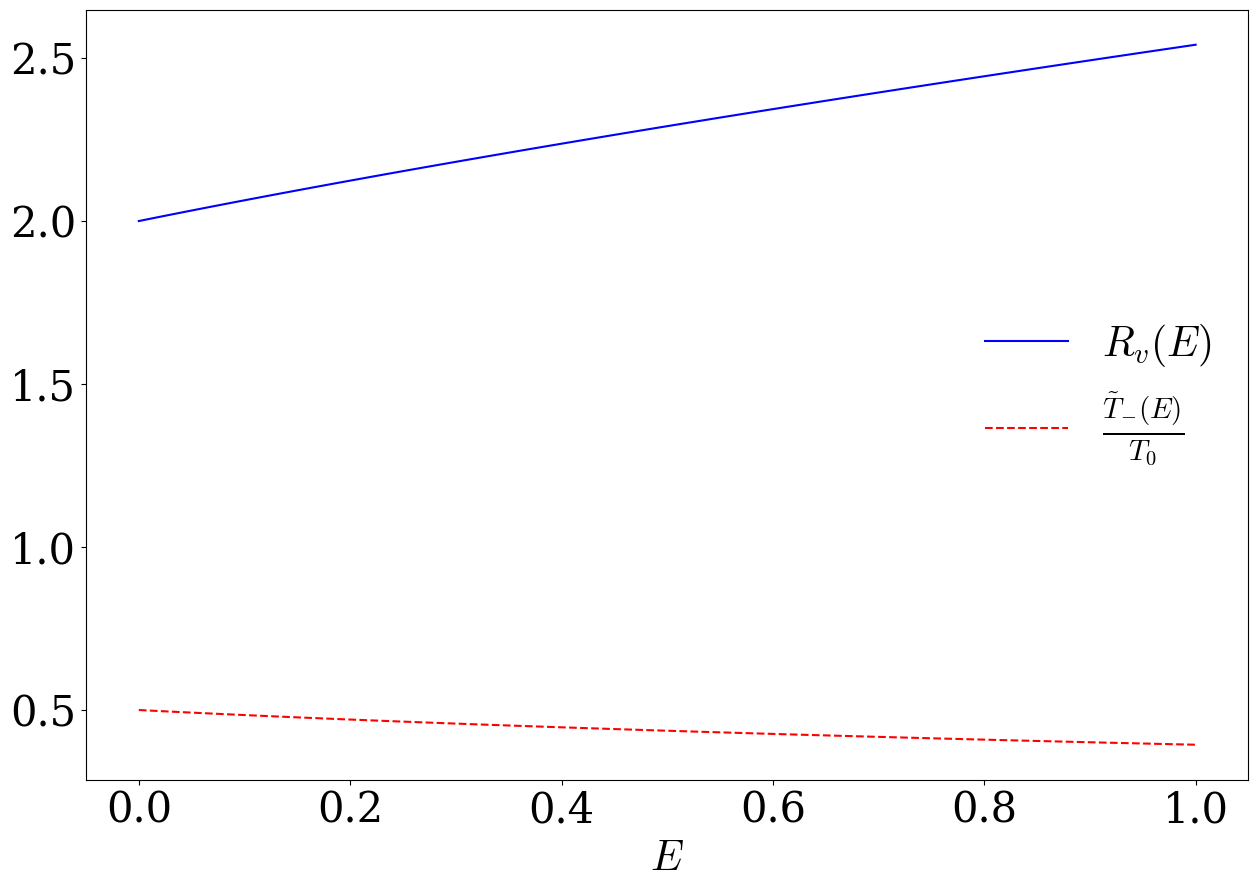

In [ ]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#x = np.linspace(1., 8., 30)
ax.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax.legend(loc='best', prop={'size':30},frameon=False, fontsize=30 )
ax.set_xlabel(r'$E$', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)



In [ ]:
fig.savefig(r'Rve_T_vs_E_R0eq2_v1.png')

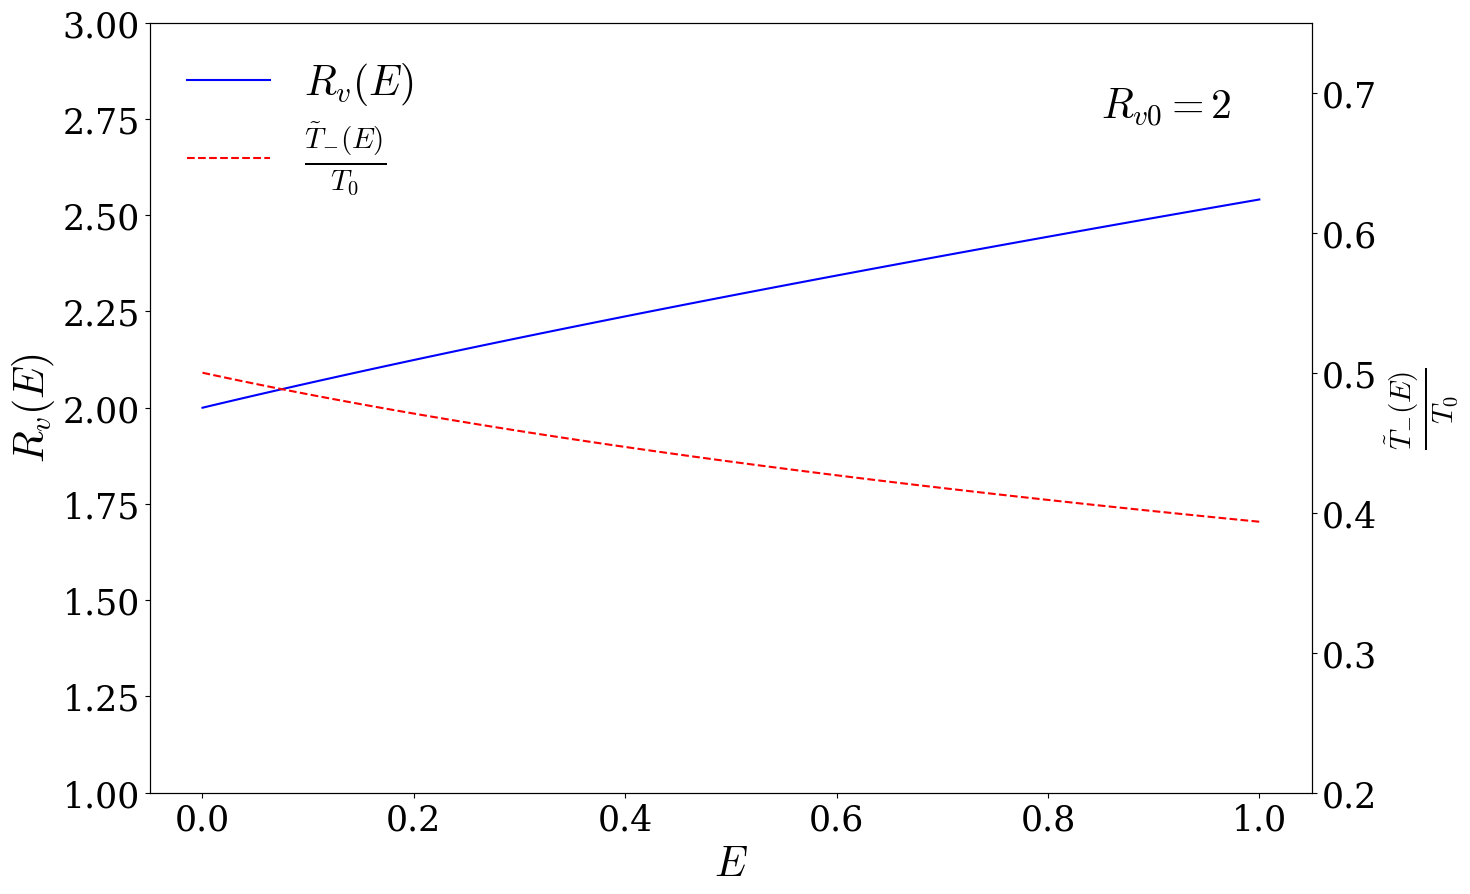

In [ ]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

#fig, ax1 = plt.subplots()
#x = np.linspace(1., 8., 30)
#ax.plot(E_values, E_values, color='b', ls='solid', label=r'$R_v(E)$')

ax1.set_xlabel(r'$E$',fontsize=30)
ax1.set_ylabel(r'$R_v(E)$',fontsize=30)
ax1.set_ylim(1, 3)
ax1.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\frac{\tilde{T}_{-}(E)}{T_0}$',fontsize=30)
ax2.set_ylim(0.2, 0.75)
ax2.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax2.tick_params(axis='y')

ax1.text(0.85, 2.75, r'$R_{v0}=2$' , fontsize=30)

#ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax1.legend(loc='upper left', prop={'size':30} , bbox_to_anchor=(0.0, 1),frameon=False )
ax2.legend(loc='upper left', prop={'size':30}, bbox_to_anchor=(0.0, 0.923),frameon=False)

#ax.set_xlabel(r'$E$', fontsize=20)
#ax.set_ylabel('Células', fontsize=20)

#ax1.margins(0.05)
#ax1.axis('tight')
#ax2.margins(0.05)
#ax2.axis('tight')
#fig.tight_layout()


# Create a single legend for both subplots
#handles, labels = ax1.get_legend_handles_labels()
#ax2.legend(handles, labels, loc='upper right')

In [ ]:
fig.savefig(r'Rve_T_vs_E_R0eq2_2ejes.png')

### Grafica con $R_2=0.9$

In [ ]:
lambda_may = 5000
m = 0.31
d = 0.1
p = 1e4
c = 20
a = 2e7
T0_value = T0_(lambda_may = lambda_may,m = m)
#T0 = 3.0
#Rv0 = 0.5

In [ ]:
print("k tal que R0=2 : ", k_(T0 = T0_value ,R0 = 2, p = p ,c = c ,m = m ,d = d))
print("k tal que R0=0.9 : ",k_(T0 = T0_value ,R0 = 0.9, p = p ,c = c ,m = m ,d = d))

k tal que R0=2 :  1.0168000000000001e-07
k tal que R0=0.9 :  4.5756e-08


In [ ]:
Rv0(T0 = T0_value ,k = 5e-8, p = p ,c = c ,m = m ,d = d)

0.9834775767112508

In [ ]:
k = k_(T0 = T0_value ,R0 = 0.9, p = p ,c = c ,m = m ,d = d)
print("k = ",k)
E=0
g = gE(a,E)

T0_value = T0_(lambda_may = lambda_may,m = m)
#Rv0_value = Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)

Rv0_value = 0.9

alpha1 = calculate_a1(g, m, d, p, T0_value, Rv0_value)

alpha2 = calculate_a2(T0_value, Rv0_value)

_,T_tilde_minus_value =  T_tilde(a1 = alpha1, a2 = alpha2)


RvE_1 = RvE(T0_value,T_tilde_minus_value)
RvE_2_ = RvE_2(T0_value, alpha1, alpha2)


print("Rv0 = {}".format(Rv0_value))
print("T0 = {}".format(T0_value))
print("T menos = {}".format(T_tilde_minus_value))
print("RvE v1 = {}".format(RvE_1))
print("RvE v2 = {}".format(RvE_2_))

k =  4.5756e-08
Rv0 = 0.9
T0 = 16129.032258064517
T menos = 16129.032258064508
RvE v1 = 1.0000000000000007
RvE v2 = 1.0000000000000007


In [ ]:
#Rv0_value = 2
Rv0_value = Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)

E_values = np.linspace(0, 1, 100)

a1_values  = calculate_a1( g = gE(a = a, E = E_values)\
                                       , m = m, d = d, p = p\
                                        , T0 = T0_value
                                        , Rv0 = Rv0_value)

a2_values  = calculate_a2( T0 = T0_value
                                        , Rv0 = Rv0_value)

T_tilde_plus_values,T_tilde_minus_values =  T_tilde( a1 = a1_values[:,None], a2 = a2_values)


RvE_values = RvE(T0 = T0_value \
                 ,T_tilde_minus = T_tilde_minus_values)


T_tilde_minus__T0 = T_tilde_minus_values/T0_value

In [ ]:
type(a2_values)

float

Text(0.5, 0, '$E$')

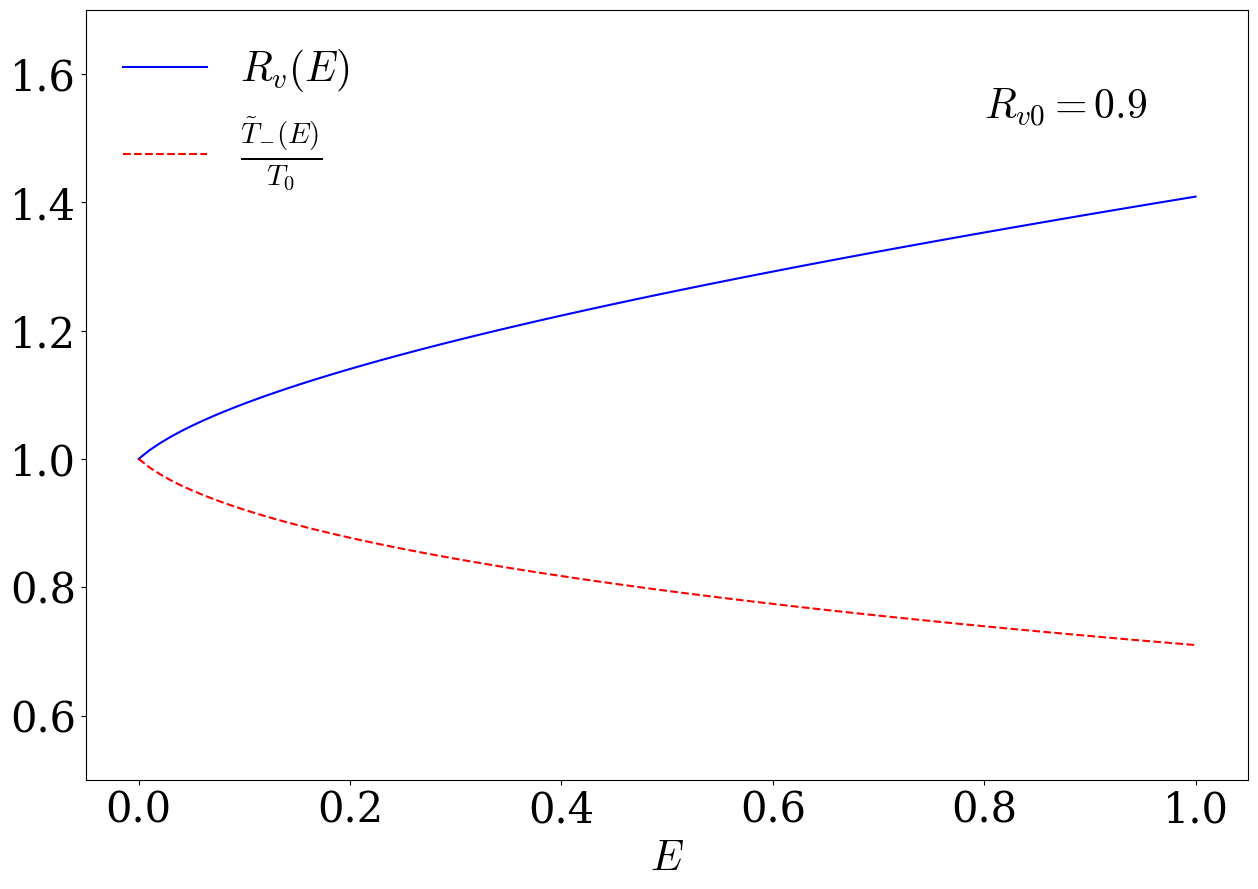

In [ ]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.text(0.8, 1.53, r'$R_{v0}=0.9$' , fontsize=30)
ax.set_ylim(0.5, 1.7)
#x = np.linspace(1., 8., 30)
ax.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax.legend(loc='upper left', prop={'size':30} , frameon=False)
ax.set_xlabel(r'$E$', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)



In [ ]:
fig.savefig(r'Rve_T_vs_E_R0eq09_1ejes.png')

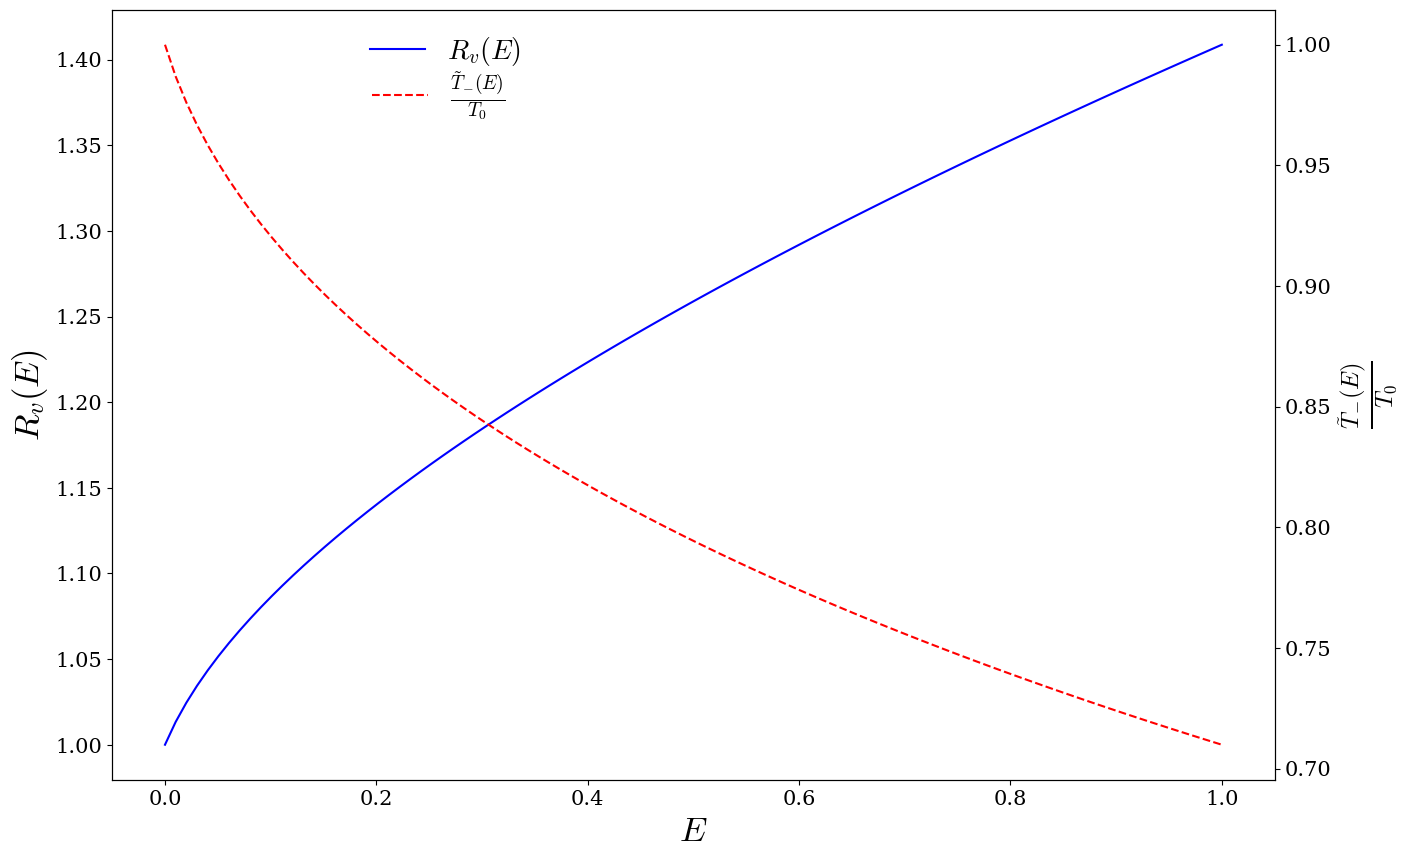

In [ ]:
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

#fig, ax1 = plt.subplots()
#x = np.linspace(1., 8., 30)
#ax.plot(E_values, E_values, color='b', ls='solid', label=r'$R_v(E)$')

ax1.set_xlabel(r'$E$',fontsize=25)
ax1.set_ylabel(r'$R_v(E)$',fontsize=25)
#ax1.set_ylim(0, 5)
ax1.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\frac{\tilde{T}_{-}(E)}{T_0}$',fontsize=25)
#ax2.set_ylim(0, 1)
ax2.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax2.tick_params(axis='y')



#ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax1.legend(loc='upper left', prop={'size':20} , bbox_to_anchor=(0.2, 1),frameon=False )
ax2.legend(loc='upper right', prop={'size':20}, bbox_to_anchor=(0.36, 0.955),frameon=False)
#ax.set_xlabel(r'$E$', fontsize=20)
#ax.set_ylabel('Células', fontsize=20)

# Create a single legend for both subplots
#handles, labels = ax1.get_legend_handles_labels()
#ax2.legend(handles, labels, loc='upper right')

### Figura 3: grafica 3D $T^*$ y $R_{v0}$ vs $E$

In [ ]:
lambda_may = 5000
m = 0.31
d = 0.1
p = 1e4
c = 20
a = 2e7
T0_value = T0_(lambda_may = lambda_may,m = m)
#T0 = 3.0
#Rv0 = 0.5

In [ ]:
def T_til_r0_E(Rv0, E , a  = a, m = m, d = d, p = p, T0 = T0_value):
  '''
  (a , m, d, p, T0, Rv0)
  T0, alpha1, alpha2

  '''

  alpha1 = (a * E * (m + d) / (p * m)) + (T0 * (1 + (1 / Rv0)))
  alpha2 = (T0**2) / Rv0
  result = 0.5 * (alpha1 - np.sqrt(alpha1**2 - 4 * alpha2))


  return result



In [ ]:
def W_r0_E(Rv0, E , Lambd = lambda_may , a  = a, m = m, d = d, p = p, T0 = T0_value):
    alpha1 = (a * E * (m + d) / (p * m)) + (T0 * (1 + 1 / Rv0))
    alpha2 = (T0**2) / Rv0
    T_til = 0.5 * (alpha1 - np.sqrt(alpha1**2 - 4 * alpha2))
    RVE = T0/T_til
    return (Lambd / (m + d)) * (1 - (1/RVE))


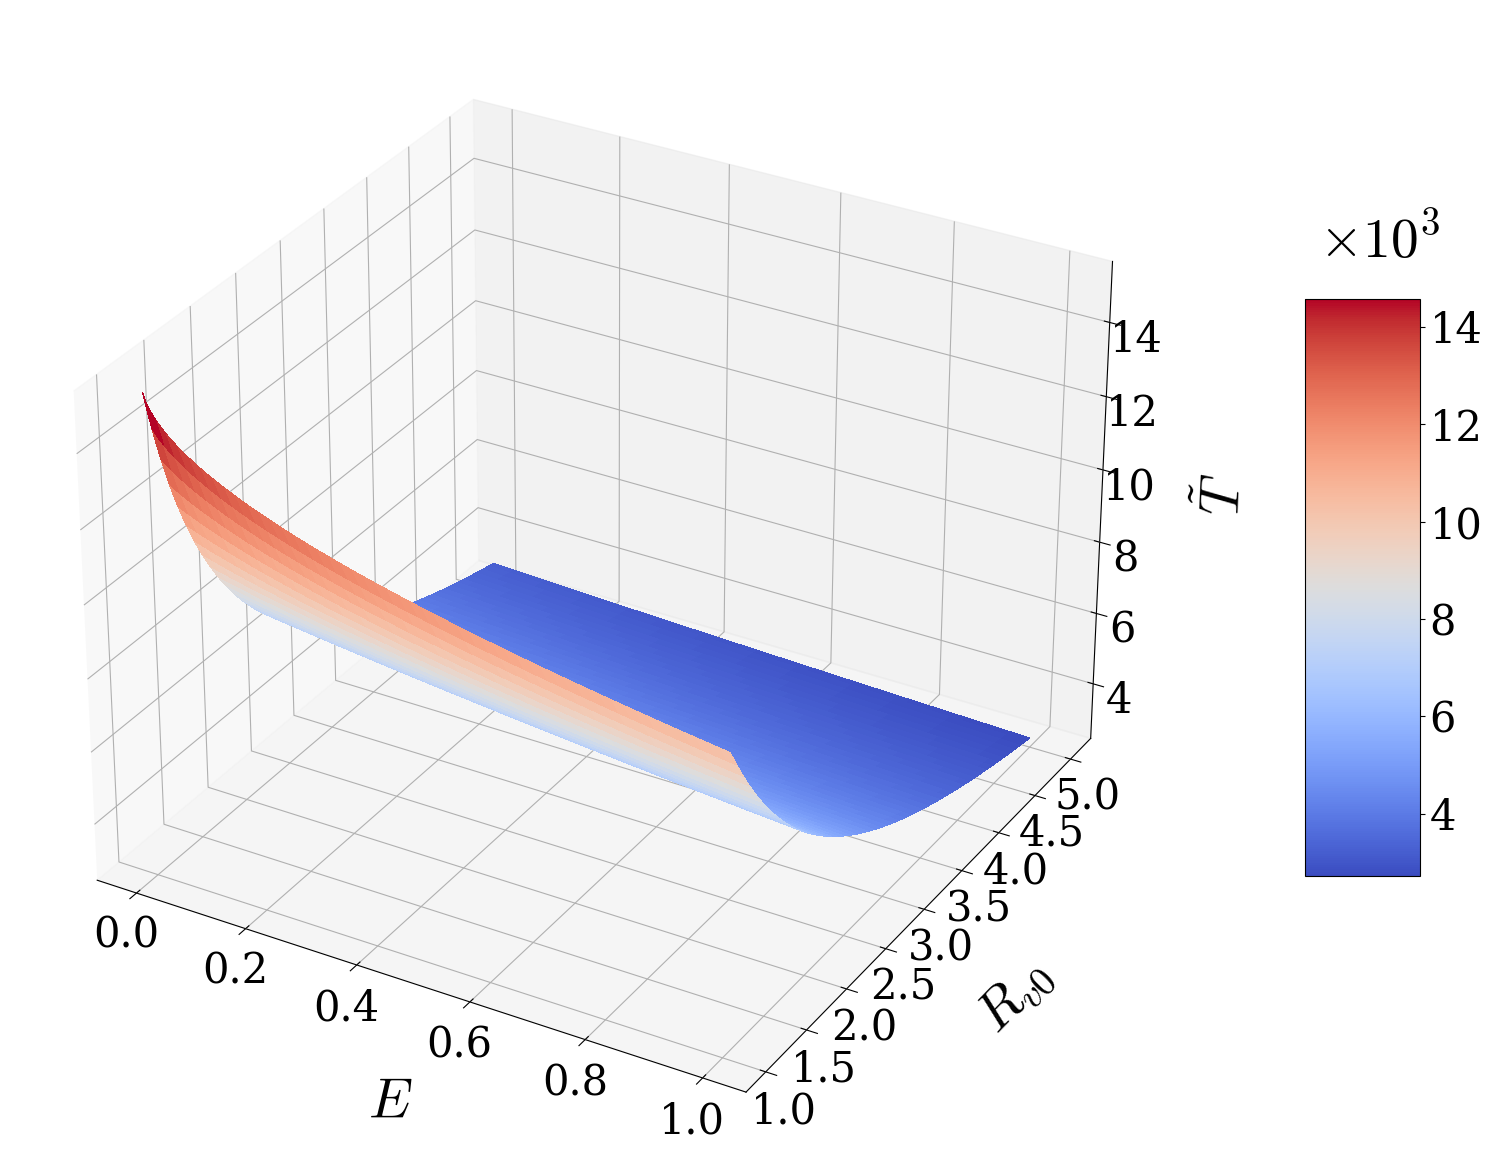

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = T_til_r0_E(Rv0 = R0_values, E  = E_values)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.plot_surface( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.00f}')

# Set labels and title
ax.set_xlabel("\n" + r'$E$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{T}$', fontsize=40,labelpad=20)
#ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'fig_3d_T_vs_E_vs_R0.png')


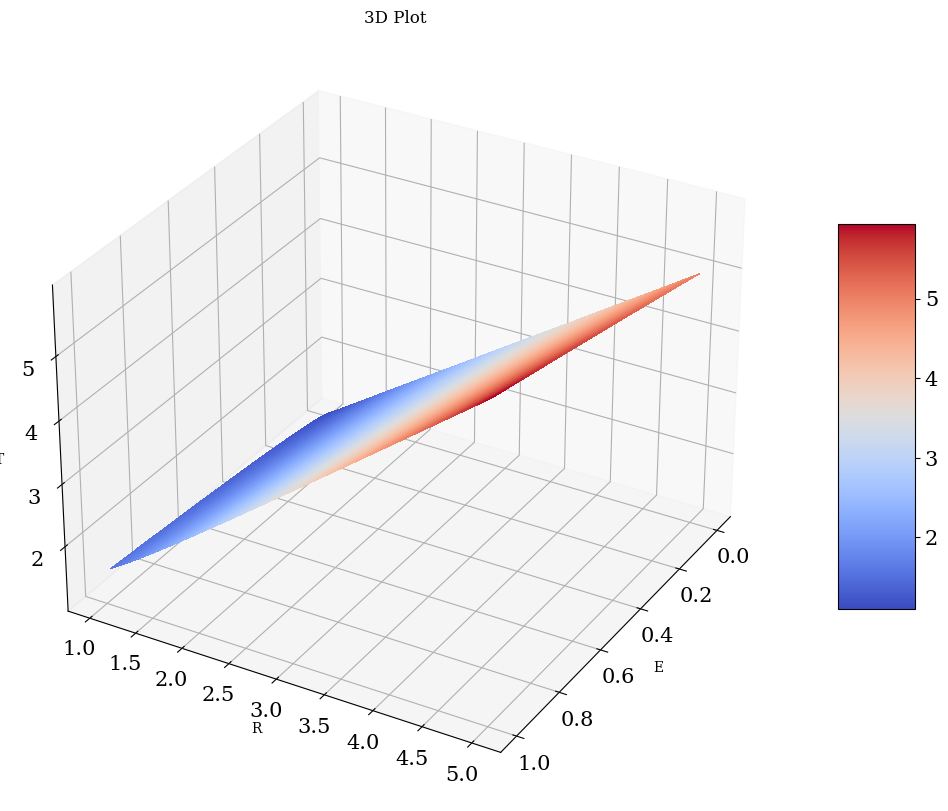

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = T_til_r0_E(Rv0 = R0_values, E  = E_values)

# Create a figure and 3D axis
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.plot_surface( E_values , R0_values, T_tilde_minus_values_, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel('E')
ax.set_ylabel('R')
ax.set_zlabel('T')
ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#rotar
ax.view_init(30, 30)

# Show the plot
plt.show()

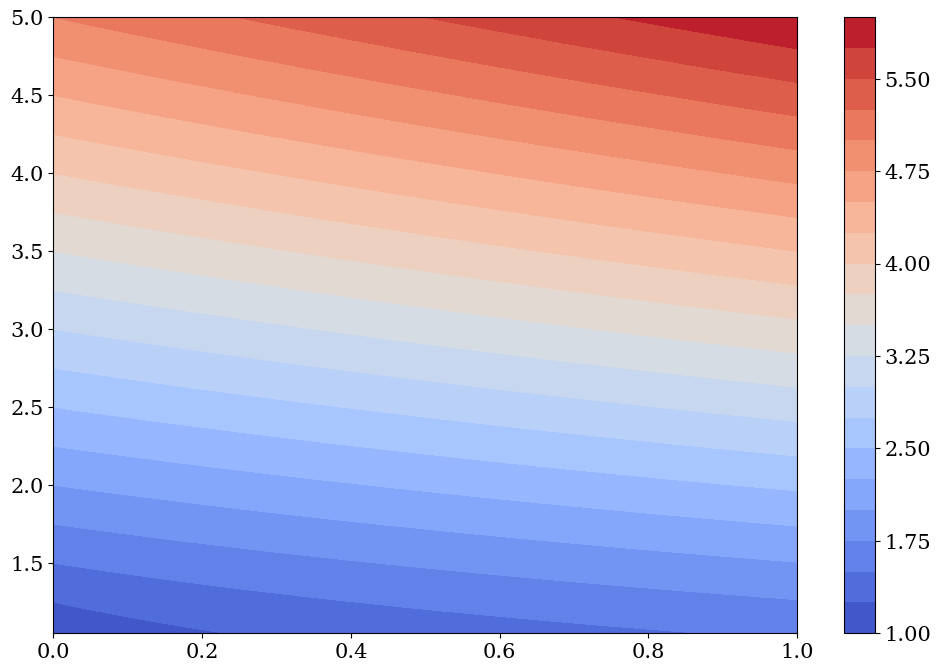

In [ ]:


# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = T_til_r0_E(Rv0 = R0_values, E  = E_values)

# Create a figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

'''
# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.plot_surface( E_values , R0_values, T_tilde_minus_values_, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel('E')
ax.set_ylabel('R')
ax.set_zlabel('T')
ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


# Show the plot
plt.show()

'''
plt.contourf(E_values , R0_values, T_tilde_minus_values_, 20, cmap=plt.cm.coolwarm);
plt.colorbar();

k =  4.5756e-08
a 20000000.0
g(E) 20000000.0
Rv0 = 5
T0 = 16129.032258064517
T menos = 2695.1301224123417
RvE v1 = 5.984509662052174
RvE v2 = 5.984509662052174


##### grad 3d w vs e vs r0

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
indices_=list(range(1,len(tIA)+1 , 50))

#ax.plot(tTime,tIA*i0,'b.-',tTime,tYA*y0,'r*-',linewidth=0.15, markersize=0.15) #tTime,tTA,'b.-',
ax.plot(tTime[indices_]/tscale, tTA[indices_]*T_0, ".-",color='g',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime[indices_]/tscale, tTA[indices_]*0 -1, ls = "solid",color='g' , label=r'Células Sanas $T(t)$')#ls='-.'

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'T_vs_t_tauleap_graf_c50_mod5ec.png')

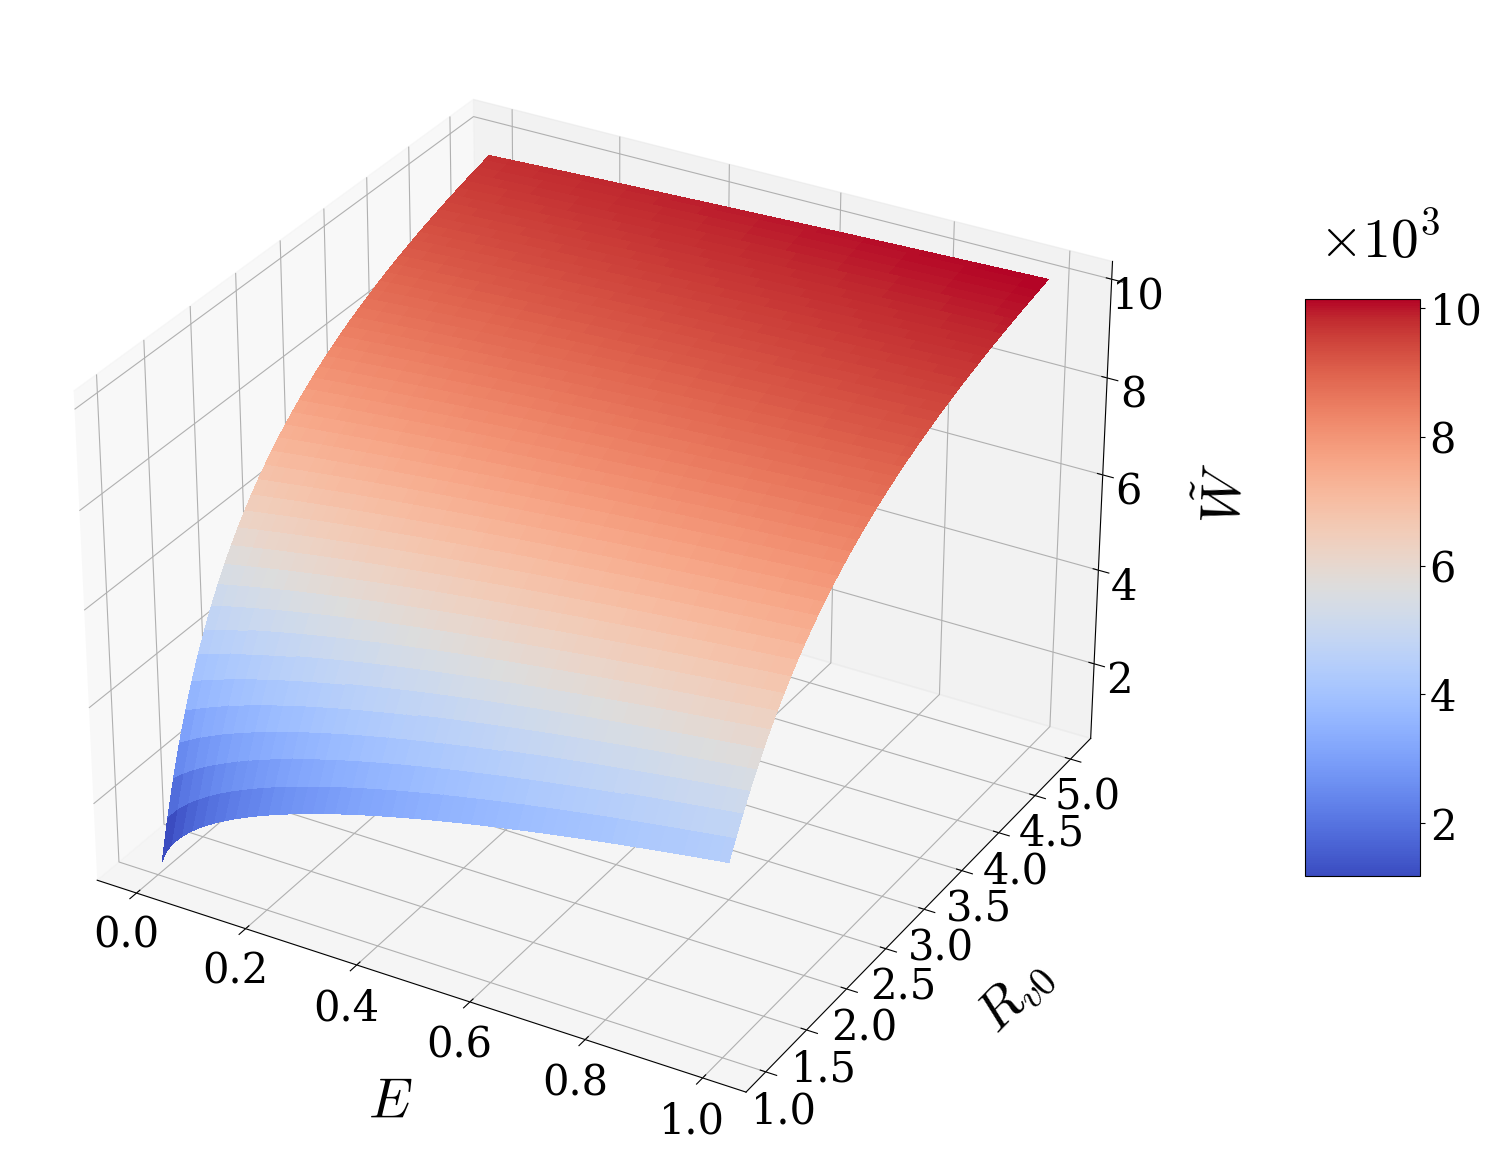

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

W_values_ = W_r0_E(Rv0 = R0_values, E  = E_values)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
#x.text(0.8, 1.53, r'$W \times 10^{3}9$' , fontsize=30)
# Plot the surface
#ax.plot_surface(E_values, R0_values, W_values_)
surf = ax.plot_surface( E_values , R0_values, W_values_/1000 , cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.00f}')

# Set labels and title
ax.set_xlabel("\n" + r'$E$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{W}$', fontsize=40,labelpad=20)
#ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)

#cbar.set_label(r'$W \times 10^{3}$', fontsize=40,loc="bottom")

#rotar
#ax.view_init(30, 0)

# Show the plot
#plt.show()
fig.savefig(r'fig_3d_W_vs_E_vs_R0.png')


In [ ]:
help(cbar.set_label)

Help on method set_label in module matplotlib.colorbar:

set_label(label, *, loc=None, **kwargs) method of matplotlib.colorbar.Colorbar instance
    Add a label to the long axis of the colorbar.
    
    Parameters
    ----------
    label : str
        The label text.
    loc : str, optional
        The location of the label.
    
        - For horizontal orientation one of {'left', 'center', 'right'}
        - For vertical orientation one of {'bottom', 'center', 'top'}
    
        Defaults to :rc:`xaxis.labellocation` or :rc:`yaxis.labellocation`
        depending on the orientation.
    **kwargs
        Keyword arguments are passed to `~.Axes.set_xlabel` /
        `~.Axes.set_ylabel`.
        Supported keywords are *labelpad* and `.Text` properties.



#### soluciones toxo

In [ ]:
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as spi
import matplotlib.pyplot as plt


def toxo_mod(t,x,N,theta,g,miu,d,l,lambda_may,k,m,r,c,p):
    I,E,T,W,V = x
    dxdt=[l*E*(N-I) - miu * I\
          ,theta * I * V * (1-E) - g*E\
          ,lambda_may-k*V*T-m*T\
          ,k*V*T-(m+d)*W\
          ,p*W+r*E-c*V]
    return dxdt



In [ ]:



# set the initial conditions
i_ini = 1e4
E_ini = 0.1
T_ini = 100000
W_ini = 0
V_ini = 0.1
x0=[i_ini,E_ini,T_ini,W_ini,V_ini]


tend=100
tstep = 0.0005
tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)

200000


In [ ]:
N=1e6
I=1e4
I/N

0.01

In [ ]:
miu = 0.1
l = 0.01
g = 0.05
theta = 2e-10
#theta = 2e-7
r=1e4
lambda_may = 5e3
m = 0.3
d = 0.1
k = 6e-7
p = 5.8e3
c = 1e2
N=1e6


### Función del modelo sencillo 5 euaciones sin raíz

In [ ]:
theta

2e-10

In [ ]:
### FUNCIONA SIN RAIZ
solve_ipv=spi.solve_ivp(toxo_mod,[0,tend],x0, args=(N,theta,g,miu,d,l,lambda_may,k,m,r,c,p), max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3

solution_ipv = solve_ipv.sol(timePoints)


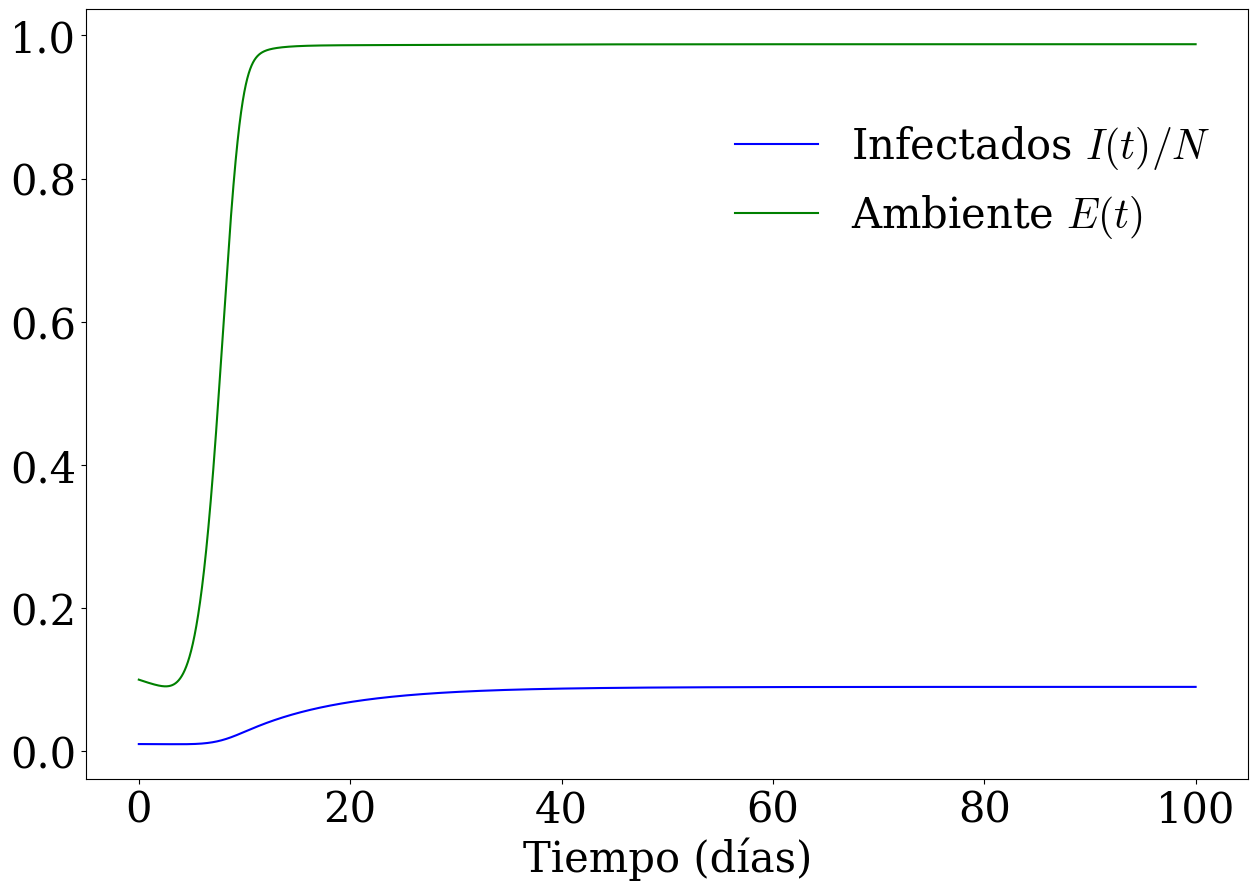

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(timePoints, solution_ipv[0 , :]/N, color='b', label=r'Infectados $I(t)/N$')
ax.plot(timePoints, solution_ipv[1 , :], color='g', label=r'Ambiente $E(t)$')

ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9),prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Proporción de infectados', fontsize=30)

fig.savefig(r'I_E_vs_t_Modtox.png')

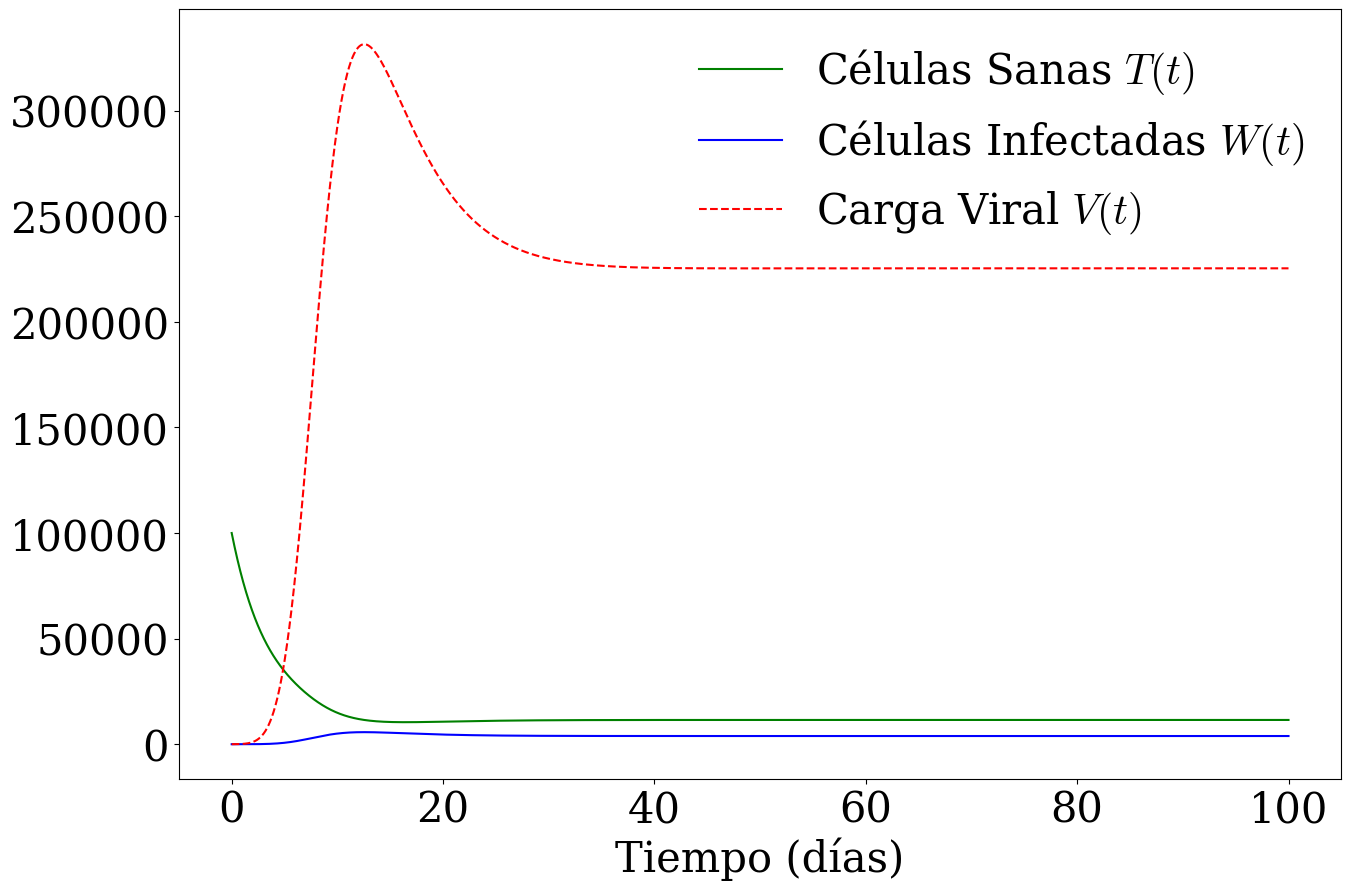

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

#fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

#ax.set_yscale("log")
#x = np.linspace(1., 8., 30)
#timePoints/tscale
ax.plot(timePoints, solution_ipv[2 , :], color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.plot(timePoints, solution_ipv[3 , :], color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints, solution_ipv[4 , :], color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)
#ax.set_ylabel('Células', fontsize=20)

fig.savefig(r'TWV_modtoxo.png')